# Welcome to this kernel

I started this kernel just for fun. I wanted to take the 50 Plot Challenge using mainly Matplotlib, but somehow it has grown into much more.

Here you can find a basic tutorial of Matplotlib.

More than 80 plots (because for some plots we use different libraries or do some interesting changes, so they add up).

A wrap up section with the most interesting things and the most used techniques.

A simple guide with 10 rules for better plotting.

A bonus section with some tricks.

Choropleths and TimeSliderChoropleths maps using Folium.

Plots like Sankeys and Chord diagams (Bokeh), graphs and some basic animation with Matplotlib.

If you miss something and think it might be interesting to add to the kernel, please leave a comment.

Disclaimer: the solutions provided in this kernel to every kind of plot, have been done by me. They don't necessary represent the best way/most efficient way of doing them. I was only trying to show how to achieve every plots using the axes instead of plt.

# <span style="color:green">Don't forget to upvote if you like it! It's free! :)</span>
# Thanks and be safe!

<a id = "table_of_contents"></a>
# Table of contents

[Importing libraries and setting some helper functions](#Imports)

[Plot to get motivated: Sine and Cosine Plot](#PlotMotivation)

[Understanding the basics of matplotlib](#Basics)

# [The 50 Plot challenge](#50PlotChallenge)

## <span style="color:black">Correlation plots: 1 - 9</span>

[Plot 1: Scatter plot](#Plot1)

[Plot 2: Bubble plot with encircling](#Plot2)

[Plot 3: Scatter plot with linear regression line of best fit](#Plot3)

[Plot 4: Jittering with stripplot](#Plot4)

[Plot 5: Counts Plot](#Plot5)

[Plot 6: Marginal Histogram](#Plot6)

[Plot 7: Marginal Boxplot](#Plot7)

[Plot 8: Correllogram (correlation plot)](#Plot8)

[Plot 9: Pairplot](#Plot9)

## <span style="color:black">Deviation plots: 10 - 14</span>

[Plot 10: Diverging bars](#Plot10)

[Plot 11: Diverging lines with text](#Plot11)

[Plot 12: Diverging dot plot](#Plot12)

[Plot 13: Diverging Lollipop Chart with Markers](#Plot13)

[Plot 14: Area chart](#Plot14)

## <span style="color:black">Ranking plots: 15 - 19</span>

[Plot 15: Ordered Bar Chart](#Plot15)

[Plot 16: Lollipop Chart](#Plot16)

[Plot 17: Dot plot](#Plot17)

[Plot 18: Slope chart](#Plot18)

[Plot 19: Dumbbell plot](#Plot19)

## <span style="color:black">Distribution plots: 20 - 30</span>

[Plot 20: Histogram for continuous variable](#Plot20)

[Plot 21: Histogram for categorical variable](#Plot21)

[Plot 22: Density plot](#Plot22)

[Plot 23: Density curves with histograms](#Plot23)

[Plot 24: Joyplot](#Plot24)

[Plot 25: Distributed dot plot](#Plot25)

[Plot 26: Box plot](#Plot26)

[Plot 27: Dot + box plot](#Plot27)

[Plot 28: Violin plot](#Plot28)

[Plot 29: Population pyramid](#Plot29)

[Plot 30: Categorical plot](#Plot30)

## <span style="color:black">Composition/group plots: 31 - 34</span>

[Plot 31: Waffle chart](#Plot31)

[Plot 32: Pie chart](#Plot32)

[Plot 33: Tree map](#Plot33)

[Plot 34: Bar chart](#Plot34)

## <span style="color:black">Variation/change plots: 35 - 46</span>

[Plot 35: Timeseries](#Plot35)

[Plot 36: Timeseries with peaks and troughs annotated](#Plot36)

[Plot 37: Autocorrelation (ACF) and partial autocorrelation (PACF) plot](#Plot37)

[Plot 38: Cross correlation plot](#Plot38)

[Plot 39: Timeseries decomposition plot](#Plot39)

[Plot 40: Multiple timeseries](#Plot40)

[Plot 41: Plotting with different scales using secondary Y axi](#Plot41)

[Plot 42: Timeseries with bands](#Plot42)

[Plot 43: Stacked area chart](#Plot43)

[Plot 44: Area chart Unstacked](#Plot44)

[Plot 45: Calendar heat map](#Plot45)

[Plot 46: Seasonal plot](#Plot46)

## <span style="color:black">Cluster plots: 47 - 50</span>

[Plot 47: Dendogram](#Plot47)

[Plot 48: Cluster plot](#Plot48)

[Plot 49: Andrews curves](#Plot49)

[Plot 50: Parallel Coordinates](#Plot50)


## <span style="color:black">Wrap up section</span>

[Wrap up section](#Wrap_up)

## <span style="color:black">Bonus section</span>

[Bonus1: how to make simple lines to connect points in matplotlib](#Bonus1)

[Bonus2: how to make create hyperlinks inside a document and change the color of a text](#Bonus2)

[Bonus3: Choropleth maps in Python](#Bonus3)

[Bonus4: TimeSliderChoropleth maps in Python](#Bonus4)

[Bonus5: 10 simple rules for better plotting](#Bonus5)

[Bonus6: Chord diagram in Python](#Bonus6)

[Bonus7: Sankey plot in Python](#Bonus7)

## <span style="color:black">Reference</span>

[Reference](#Reference_link)

<a id = "Imports"></a>
# Importing libraries and setting some helper functions
[Go back to the Table of Contents](#table_of_contents)

In [1]:
!pip install joypy
import joypy

In [2]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 525 kB 2.8 MB/s 


In [3]:
!pip install calmap
import calmap

In [4]:
import os
import numpy as np

import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns

#matplotlib and related imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches

from scipy.spatial import ConvexHull
from scipy.signal import find_peaks
from scipy.stats import sem
import scipy.cluster.hierarchy as shc

import squarify

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as stattools
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

from IPython.display import Image

import geopandas
import folium
from folium.plugins import TimeSliderChoropleth
from branca.element import Template, MacroElement

def print_files():
    for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
            print(os.path.join(dirname, filename))

<a id = "PlotMotivation"></a>
# Plot to get motivated: Sine and Cosine Plot
[Go back to the Table of Contents](#table_of_contents)

# <span style="color:green">This plot is an example of the power of matplotlib. By the end of this kernel you will learn to do this and more advanced plots.</span>

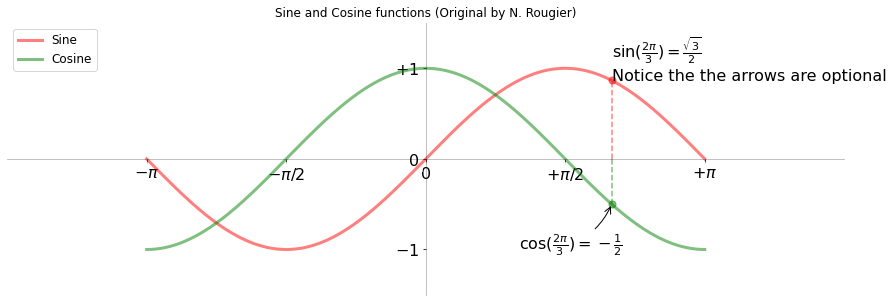

In [5]:
# ----------------------------------------------------------------------------------------------------
# get the data
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.plot(X,S, color = "red", alpha = 0.5, lw = 3, label = "Sine")
ax.plot(X,C, color = "green", alpha = 0.5, lw = 3, label = "Cosine")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the x and y limit
plt.xlim(X.min()*1.5, X.max()*1.5)
plt.ylim(C.min()*1.5, C.max()*1.5)

# change the ticks
# ticks are just a way to 'change the values' represented on the x and y axis
plt.xticks(
    [-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
    [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'] # r before each string means raw string
)

plt.yticks(
    [-1, 0, +1],
    [r'$-1$', r'$0$', r'$+1$']
)

# removes the right and top spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# changes the position of the other spines
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['bottom'].set_color('black') # this helps change the color
ax.spines['bottom'].set_alpha(.3) # and adds some transparency to the spines

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.spines['left'].set_color('black')
ax.spines['left'].set_alpha(.3)

# annotate different values
t = 2*np.pi/3
# plot a straight line to connect different points
plt.plot([t, t], [0, np.sin(t)], color ='red', linewidth = 1.5, linestyle = "--", alpha = 0.5)
plt.scatter(t, np.sin(t), 50, color ='red', alpha = 0.5)
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$' + "\nNotice the the arrows are optional",
             xy = (t, np.sin(t)), 
             xycoords = 'data',
             fontsize = 16)

# do the same for cosine
plt.plot([t, t], [0, np.cos(t)], color = 'green', linewidth = 1.5, linestyle = "--", alpha = 0.5)
plt.scatter(t, np.cos(t), 50, color = 'green', alpha = 0.5)
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy = (t, np.cos(t)), 
             xycoords = 'data',
             xytext = (t/2, -1), 
             fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"))

# adjust the x and y ticks
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor = 'white', edgecolor = 'None', alpha = 0.65 ))
    
# add the title adn a legend
plt.title("Sine and Cosine functions (Original by N. Rougier)")
plt.legend(loc = "upper left", fontsize = 12);

<a id = "Basics"></a>
# Understanding the basics of matplotlib
[Go back to the Table of Contents](#table_of_contents)

## Understanding the figure, subplots and axes in matplotlib.

Matplotlib can be very confusing for newcomers. There are a lot of ways to do things and a lot of terminology.

Let's understand the basic things, ***figure, subplots and axes***.

If you look closer to the next figure, you will see that a figure is basically the canvas or a box where we can store all our plots/charts. It's the highest hierarchy.

The next in the row is Axes. Axes basically means the composition where our plot will live (a box (axes) with a chart inside other box (figure)).

## <span style="color:green">In matplotlib a basic plot starts with a figure and an axes.</span>

A side note: axes is not the same as axis. Actually every axes contains x axis and y axis. And the plural side of axes doesn't mean that much.

In [6]:
PATH = "/kaggle/input/figureaxesmpl/FigureAxesMPL.png"
Image(PATH)

FileNotFoundError: No such file or directory: '/kaggle/input/figureaxesmpl/FigureAxesMPL.png'

FileNotFoundError: No such file or directory: '/kaggle/input/figureaxesmpl/FigureAxesMPL.png'

<IPython.core.display.Image object>

In matplotlib you can do different plots with different methodology. Doing the same exact plot can be achieved in multiple ways.

I strongly recommed to pick one and stick with it. Basically it will avoid the have a complete mess in the future.

I have taken a lot of tutorials and use matplotlib almost on a daily basis but I still struggle from time to time.

This tutorial has served me to finally choose one way of plotting that gives the best control over plots and also is very explicit in the code, thus is much more readable and understandable.

I recommed using the ***OOP aproach of plotting in matplotlib*** and I will be covering this way of doing things in the tutorial.

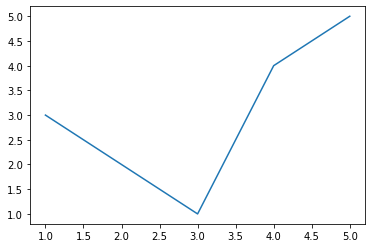

In [7]:
# create the figure
fig = plt.figure()

# add a subplot to the figure (the explicit way)
# Passing the numbers is optional and you can pass 111 but I will stick with this way. 
# That's why I call it explicit way.
# 1, 1, 1 means: 1 axes in a 1 row 1 column grid. More on this later.
ax1 = fig.add_subplot(1, 1, 1)

# some data
x = [1, 2, 3, 4, 5]
y = [3, 2, 1, 4, 5]

# plot basic things
ax1.plot(x, y);

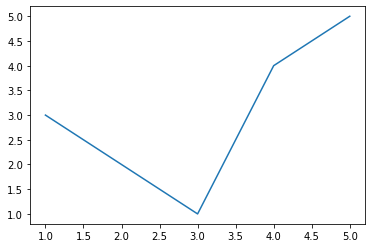

In [8]:
# the same plot can be achieved doing this way
fig = plt.figure()
ax1 = fig.subplots()
ax1.plot(x, y);

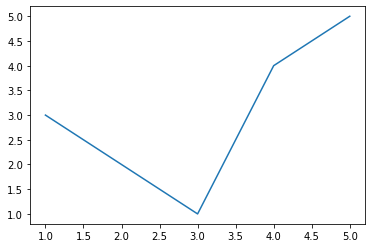

In [9]:
# you can even simplify it more by just doing this
plt.plot(x, y);

### <span style="color:red">It might see like a waste of time writing 3 lines instead of 1 to achieve the same result.</span>
### <span style="color:red">Most of the time, you can go away with just plt.plot(x, y) when doing simple plots.</span>
### <span style="color:red">However, I really suggest to use the explicit one. It will help you reuse code more frequently and also gives more control over the plots.</span>

We actually didn't explore all the posibilities. Here are some more examples of doing the same plot.

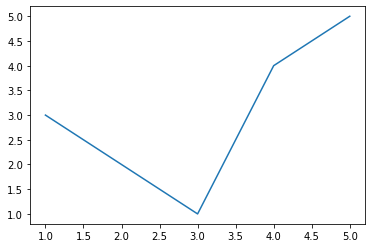

In [10]:
# we can also achieve the same using plt.axes
ax1 = plt.axes()
ax1.plot(x, y);

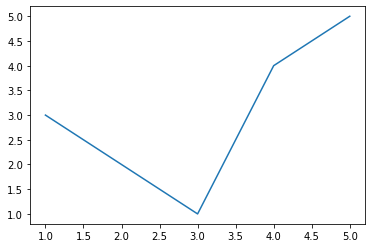

In [11]:
# and also using plt.subplot
ax1 = plt.subplot()
ax1.plot(x, y);

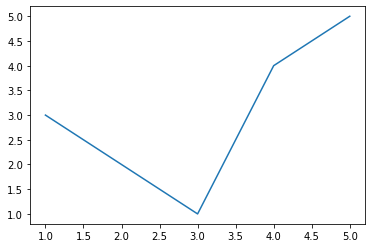

In [12]:
# now let's to the same but using add_axes()

# create the figure
fig = plt.figure()
# add axes
fig.add_axes()
# gca is get current axes, since matplotlib always plots on the current axes.
ax1 = plt.gca()
# plot
ax1.plot(x, y);

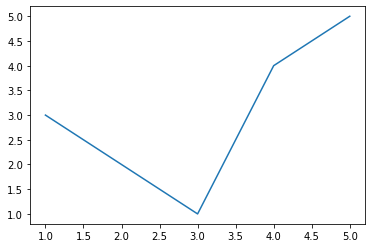

In [13]:
# or doing the same just using axes
ax1 = plt.axes()
ax1.plot(x, y);

### ***If you are wondering why are there so many ways of doing things. The answer is in the matplotlib architecture.***

### ***Let's overview it really quickly.***

In [14]:
PATH = "/kaggle/input/mplarchitecture/MPLArchitecture.png"
Image(PATH)

FileNotFoundError: No such file or directory: '/kaggle/input/mplarchitecture/MPLArchitecture.png'

FileNotFoundError: No such file or directory: '/kaggle/input/mplarchitecture/MPLArchitecture.png'

<IPython.core.display.Image object>

As you can see, there are 3 layers.

1. The most low level: the back end layer. For example, when you write youre %matplotlib inline, it tells the backend to render everything without the need to call plt.show(). You can also use this layer to choose different engines to plot. For example: hvplot, jshtml and other to do dynamic plotting. ***But it's very likely it's the only case you will ever interact with this layer***

2. Layer number two is the Artist Layer. This layer gives you the posibility to change the spines, axis, colors and much more. We acess this layer when we call ax1.plot() for example ***When doing plots using this methodology, your are using OOP aproach. I will stick with this one for the rest of the kernel***

3. The last layer is very handy for fast plots. You use it when you do: plt.plot() for example. It's still powerful but not as powerful as the 2 layer.

So, in order to clarify the concepts and hopefully understand everything, I have prepared this small table:

|Scripting Layer|Under the hood|Artist Layer|Details|
|---|---|---|---|---|
|plt.subplot()|You are actually calling ->|fig = plt.figure()<br>fig.add_subplot()|subplot automatically calls figure and adds 1 subplot|
|plt.subplots()|You are actually calling ->|fig = plt.figure()<br>fig.subplots()|using subplots retruns a tuple so you must unpack it like: <br>fig, ax1 = plt.subplots()|
|plt.axes()|You are actually calling ->|fig = plt.figure()<br>fig.add_axes()|plt.axes() returns one axes using fig.add_subplot(1, 1, 1). <br>The figure as in plt.subplot() is created automatically.|

As you can see, depending on the style you use, you are using one layer or another and this impacts the way of doing things.

### <span style="color:green">All these methods can be used and will produce the same result when you want to do a single plot. </span>

But, if you wan multiple plots, that's where the things atart to differ.

For example, if you want 4 plots in 2 x 2 format, you can do it like this.

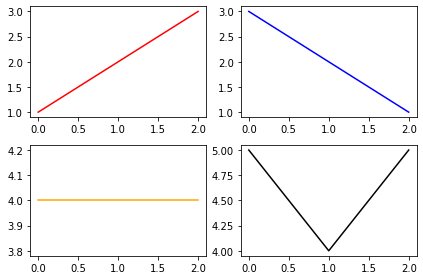

In [15]:
fig = plt.figure()
# create a 4 plots and use tuple unpacking to name everyplot
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
ax1.plot([1,2,3], color = "red")
ax2.plot([3,2,1], color = "blue")
ax3.plot([4,4,4], color = "orange")
ax4.plot([5,4,5], color = "black")
plt.tight_layout()

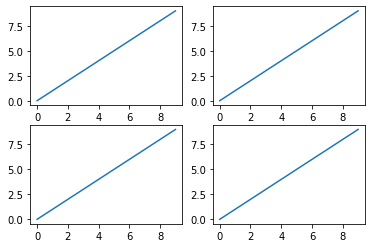

In [16]:
# you can do the same using a for loop
nrows = 2
ncolumns = 2
fig, axes = plt.subplots(nrows, ncolumns)

# axes is just a tuple as we saw before
# since se specified 
for row in range(nrows):
    for column in range(ncolumns):
        ax = axes[row, column]
        ax.plot(np.arange(10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


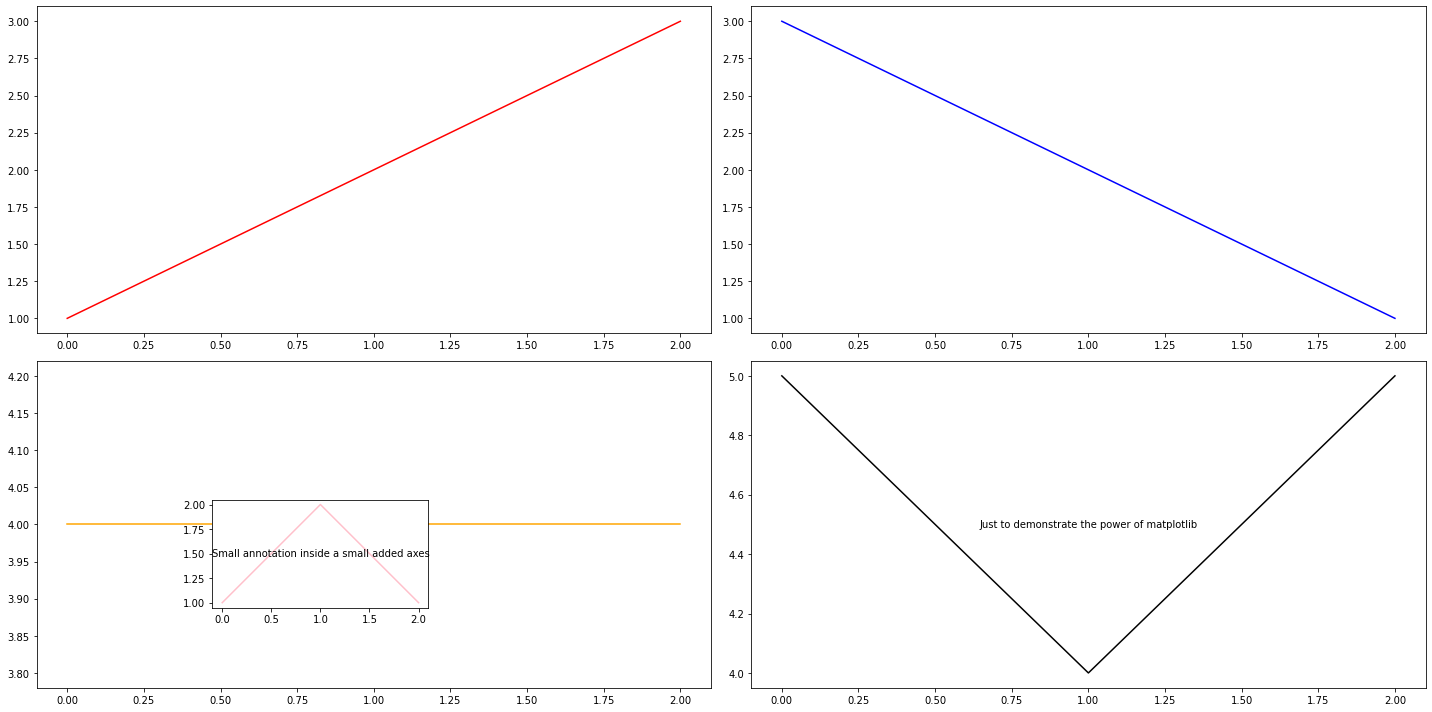

In [17]:
# Look at all the crazy stuff matplotlib allows you to do.

fig = plt.figure(figsize = (20, 10))
# create a 4 plots and use tuple unpacking to name everyplot
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
ax1.plot([1,2,3], color = "red")

ax2.plot([3,2,1], color = "blue")

ax3.plot([4,4,4], color = "orange")
ax3_bis = fig.add_axes([0.15, 0.15, 0.15, 0.15])
ax3_bis.plot([1,2,1], color = "pink") # you add it to the figure!
ax3_bis.annotate("Small annotation inside a small added axes",
                xy = (0.5, 0.5),
                xycoords = "axes fraction",
                va = "center",
                ha = "center")

ax4.plot([5,4,5], color = "black")
ax4.annotate("Just to demonstrate the power of matplotlib", 
             xy = (0.5, 0.5), # fraction of the ax4. In the center.
             xycoords = "axes fraction", # you can also specify data and pass the values of the x and y axis.
             va = "center",
             ha = "center")

plt.tight_layout()

There is one more way to create this types of plots and it is using the gridspec.

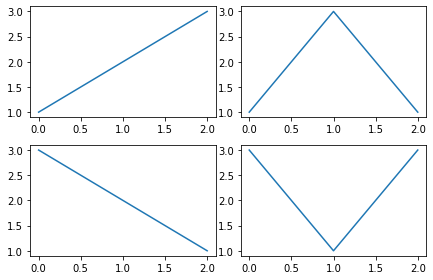

In [18]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0,0])
ax1.plot([1,2,3,])
ax2 = fig.add_subplot(gs[0,1])
ax2.plot([1,3,1,])
ax3 = fig.add_subplot(gs[1,0])
ax3.plot([3,2,1,])
ax4 = fig.add_subplot(gs[1,1])
ax4.plot([3,1,3,])
plt.tight_layout()

But if you want to make not a regular n x n column but something more sophisticated, you can only do it using grid.

I will use a very similar example that you will find the the official documentation.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()


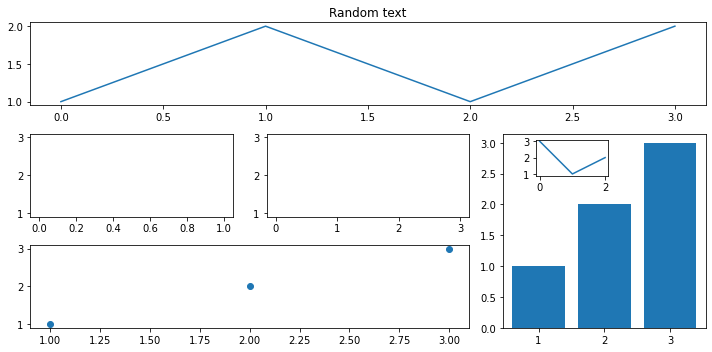

In [19]:
fig = plt.figure(figsize = (10, 5))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot([1,2,1,2])
ax1.set_title("Random text")
ax2 = fig.add_subplot(gs[1,0])
ax2.plot(1,3,1)
ax3 = fig.add_subplot(gs[1,1])
ax3.plot(3,1,3)
ax4 = fig.add_subplot(gs[2,:-1])
ax4.scatter([1,2,3], [1,2,3])
ax5 = fig.add_subplot(gs[1:, -1])
ax5.bar([1,2,3], [1,2,3])
ax5_bis = fig.add_axes([0.75, 0.5, 0.1, 0.1])
ax5_bis.plot([3,1,2])
plt.tight_layout()

### <span style="color:green">When you create a gridspec, like 3 x 3, to post a plot into this grid you must use index slicing.</span>
### <span style="color:green">Hopefully, if you know numpy this is very familiar.</span>
Here is a quick cheatsheet.

In [20]:
PATH = "/kaggle/input/numpyslice/NumpySlice.png"
Image(PATH)

FileNotFoundError: No such file or directory: '/kaggle/input/numpyslice/NumpySlice.png'

FileNotFoundError: No such file or directory: '/kaggle/input/numpyslice/NumpySlice.png'

<IPython.core.display.Image object>

I hope that know you understand the main difference between the different commands and in what scenario to call them.

***Remmember, most of the time, you can go wit plt.plot() but as you will get more experienced and want more control you will eventually move into the OOP plotting aproach.***

I will from now one use this method:

fig = plt.figure()
ax1 = fig.add_subplot()
or
gs = fig.add_gridspec(2, 2).

Gridspec is much more powerful but is not common to see.

<a id = "50PlotChallenge"></a>
# The 50 Plot challenge
[Go back to the Table of Contents](#table_of_contents)

This is a very nice challenge I decided to take.

I have found this 50 amazingly beautiful plots:

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

I have decided to reacreate them using mainly matplotlib.

## <span style="color:green">Go ahead and try to replicate them aswel. I assure you will learn a lot.</span>

<a id = "Plot1"></a>
# Plot 1: Scatter plot
[Go back to the Table of Contents](#table_of_contents)

In [21]:
# Remmember, use this function to see all the data available for this challenge.
print_files()

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/the-50-plot-challenge/email_campaign_funnel.csv
/kaggle/input/the-50-plot-challenge/USArrests.csv
/kaggle/input/the-50-plot-challenge/health.csv
/kaggle/input/the-50-plot-challenge/mortality.csv
/kaggle/input/the-50-plot-challenge/mtcars.csv
/kaggle/input/the-50-plot-challenge/diamonds_filter.csv
/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv
/kaggle/input/the-50-plot-challenge/yahoo.csv
/kaggle/input/the-50-plot-challenge/nightvisitors.csv
/kaggle/input/the-50-plot-challenge/orders_45d.csv
/kaggle/input/the-50-plot-challenge/economics.csv
/kaggle/input/the-50-plot-challenge/AirPassengers.csv
/kaggle/input/the-50-plot-challenge/midwest_filter.csv
/kaggle/input/the-50-plot-challenge/gdppercap.csv
/kaggle/input/the-50-plot-challenge/user_orders_hourofday.csv
/kaggle/input/spain-geojson/shapefiles_ccaa_espana.geojson
/kaggle/input/competitive-data-science-predict-f

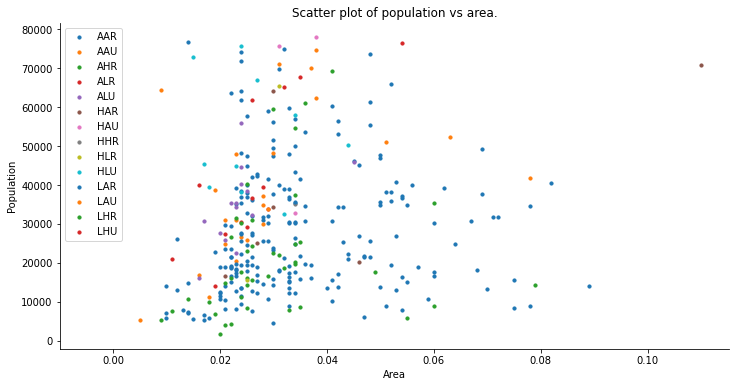

In [22]:
# Useful for:
# Visualize the relationship between data.

# More info: 
# https://en.wikipedia.org/wiki/Scatter_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/midwest_filter.csv' 
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

# ----------------------------------------------------------------------------------------------------
# iterate over each category and plot the data. This way, every group has it's own color. Otherwise everything would be blue
for cat in sorted(list(df["category"].unique())):
    # filter x and the y for each category
    ar = df[df["category"] == cat]["area"]
    pop = df[df["category"] == cat]["poptotal"]
    
    # plot the data
    ax.scatter(ar, pop, label = cat, s = 10)
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# eliminate 2/4 spines (lines that make the box/axes) to make it more pleasant
ax.spines["top"].set_color("None") 
ax.spines["right"].set_color("None")

# set a specific label for each axis
ax.set_xlabel("Area") 
ax.set_ylabel("Population")

# change the lower limit of the plot, this will allow us to see the legend on the left
ax.set_xlim(-0.01) 
ax.set_title("Scatter plot of population vs area.")
ax.legend(loc = "upper left", fontsize = 10);

<a id = "Plot2"></a>
# Plot 2: Bubble plot with encircling
[Go back to the Table of Contents](#table_of_contents)

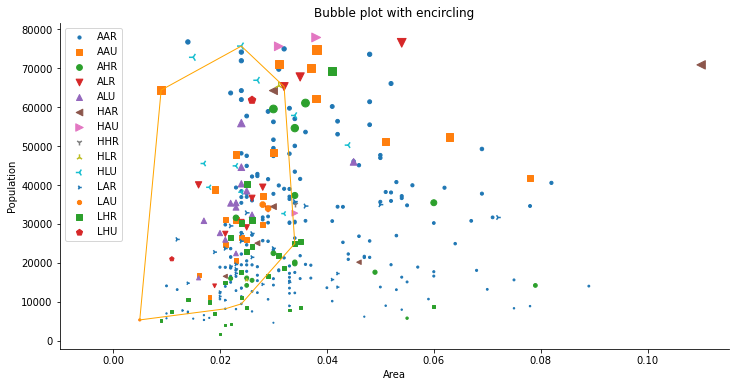

In [23]:
# Useful for:
# Visualize the relationship between data but also helps us encircle a specific group we might want to draw the attention to.

# More info: 
# https://en.wikipedia.org/wiki/Scatter_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/midwest_filter.csv' 
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
size_total = df["poptotal"].sum()
# we want every group to have a different marker
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"] 

# ----------------------------------------------------------------------------------------------------
# iterate over each category and plot the data. This way, every group has it's own color and marker.
for cat, marker in zip(sorted(list(df["category"].unique())), markers):
    # filter x and the y for each category
    ar = df[df["category"] == cat]["area"]
    pop = df[df["category"] == cat]["poptotal"]
    
    # this will allow us to set a specific size for each group.
    size = pop/size_total
    
    # plot the data
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)

# ----------------------------------------------------------------------------------------------------
# create an encircle
# based on this solution
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot

# steps to take:

# filter a specific group
encircle_data = df[df["state"] == "IN"]

# separete x and y
encircle_x = encircle_data["area"]
encircle_y = encircle_data["poptotal"]

# np.c_ concatenates over the second axis
p = np.c_[encircle_x,encircle_y]

# uing ConvexHull (we imported it before) to calculate the limits of the polygon
hull = ConvexHull(p)

# create the polygon with a specific color based on the vertices of our data/hull
poly = plt.Polygon(p[hull.vertices,:], ec = "orange", fc = "none")

# add the patch to the axes/plot)
ax.add_patch(poly)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# eliminate 2/4 spines (lines that make the box/axes) to make it more pleasant
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

# set a specific label for each axis
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# change the lower limit of the plot, this will allow us to see the legend on the left
ax.set_xlim(-0.01) 
ax.set_title("Bubble plot with encircling")
ax.legend(loc = "upper left", fontsize = 10);

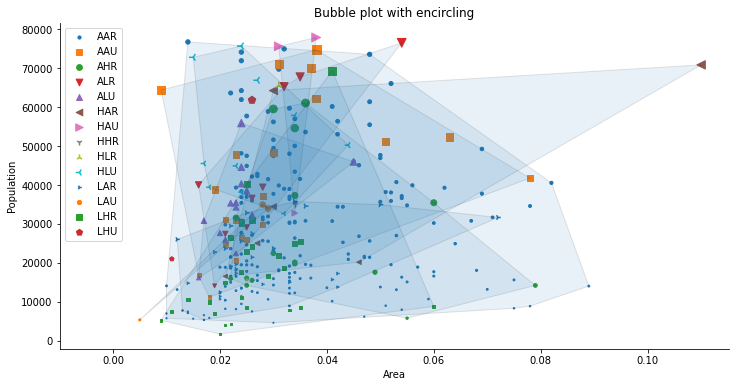

In [24]:
# Useful for:
# Visualize the relationship between data but also helps us encircle a specific group we might want to draw the attention to.

# More info: 
# https://en.wikipedia.org/wiki/Scatter_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/midwest_filter.csv' 
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
size_total = df["poptotal"].sum()
# we want every group to have a different marker
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d"] 

# ----------------------------------------------------------------------------------------------------
# create an encircle
# based on this solution
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax = None, **kw):
    '''
    Takes an axes and the x and y and draws a polygon on the axes.
    This code separates the differents clusters
    '''
    # get the axis if not passed
    if not ax: ax=plt.gca()
    
    # concatenate the x and y arrays
    p = np.c_[x,y]
    
    # to calculate the limits of the polygon
    hull = ConvexHull(p)
    
    # create a polygon from the hull vertices
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    
    # add the patch to the axes
    ax.add_patch(poly)

# ----------------------------------------------------------------------------------------------------
# iterate over each category and plot the data. This way, every group has it's own color and marker.
# on the iteration we will calculate our hull/polygon for each group and connect specific groups
for cat, marker in zip(sorted(list(df["category"].unique())), markers):
    # filter x and the y for each category
    ar = df[df["category"] == cat]["area"]
    pop = df[df["category"] == cat]["poptotal"]
    
    # this will allow us to set a specific size for each group.
    size = pop/size_total
    
    # plot the data
    ax.scatter(ar, pop, label = cat, s = size*10000, marker = marker)
    
    try:
        # try to add a patch
        encircle(ar, pop, ec = "k", alpha=0.1)
    except:
        # if we don't have enough poins to encircle just pass
        pass

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# eliminate 2/4 spines (lines that make the box/axes) to make it more pleasant
ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

# set a specific label for each axis
ax.set_xlabel("Area")
ax.set_ylabel("Population")

# change the lower limit of the plot, this will allow us to see the legend on the left
ax.set_xlim(-0.01) 
ax.set_title("Bubble plot with encircling")
ax.legend(loc = "upper left", fontsize = 10);

<a id = "Plot3"></a>
# Plot 3: Scatter plot with linear regression line of best fit
[Go back to the Table of Contents](#table_of_contents)

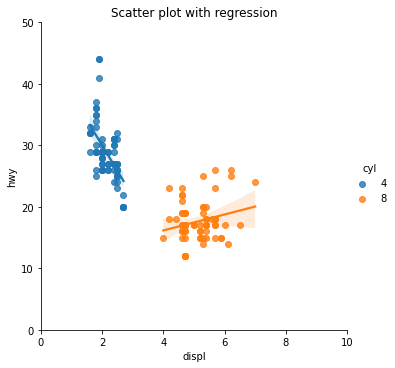

In [25]:
# Useful for:
# This is a normal scatter plot but we also plot a simple regression line to see the correlation between the x and the y variables.

# More info: 
# https://visual.ly/m/scatter-plots-regression-lines/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# filter only 2 clases to separate it more easily on the plot
df = df[df["cyl"].isin([4,8])]

# ----------------------------------------------------------------------------------------------------
# plot the data using seaborn
sns.lmplot("displ", "hwy", df, hue = "cyl")

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# since we are using seaborn and this library uses matplotlib behind the scenes
# you can call plt.gca (get current axes) and use all the familiar matplotlib commands
ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)

# set title
ax.set_title("Scatter plot with regression");

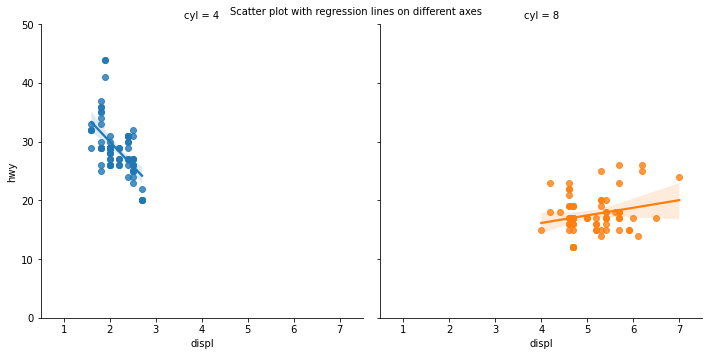

In [26]:
# Useful for:
# This is a normal scatter plot but we also plot a simple regression line to see the correlation between the x and the y variables.
# This plot is similar to the previous one but plots each data on separate axes

# More info: 
# https://visual.ly/m/scatter-plots-regression-lines/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# filter only 2 clases to separate it more easily on the plot
df = df[df["cyl"].isin([4,8])]


# ----------------------------------------------------------------------------------------------------
# plot the data using seaborn
axes = sns.lmplot("displ", 
                  "hwy", 
                  df, 
                  hue = "cyl", 
                  col = "cyl" # by specifying the col, seaborn creates several axes for each group
                 )

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the upper limit of the plot to make it more pleasant
axes.set( xlim = (0.5, 7.5), ylim = (0, 50))

# set title for all axes using plt
plt.suptitle("Scatter plot with regression lines on different axes", fontsize = 10);

<a id = "Plot4"></a>
# Plot 4: Jittering with stripplot
[Go back to the Table of Contents](#table_of_contents)

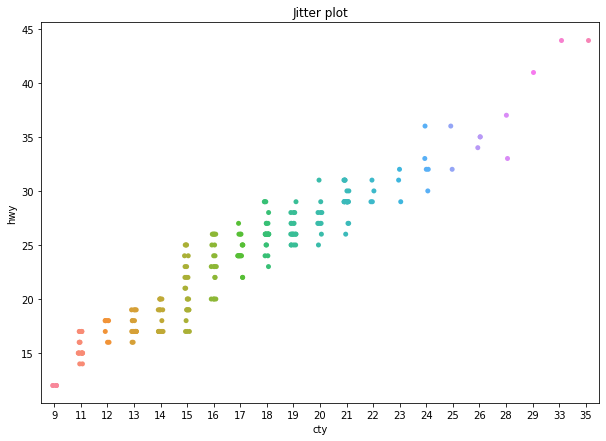

In [27]:
# Useful for:
# Draw a scatterplot where one variable is categorical. 
# This is useful to see the distribution of the points of each category.

# More info: 
# https://seaborn.pydata.org/generated/seaborn.stripplot.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# separate x and y variables
x = df["cty"]
y = df["hwy"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 7))

# ----------------------------------------------------------------------------------------------------
# plot the data using seaborn
ax = sns.stripplot(x, y)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set title
ax.set_title("Jitter plot");

<a id = "Plot5"></a>
# Plot 5: Counts Plot
[Go back to the Table of Contents](#table_of_contents)

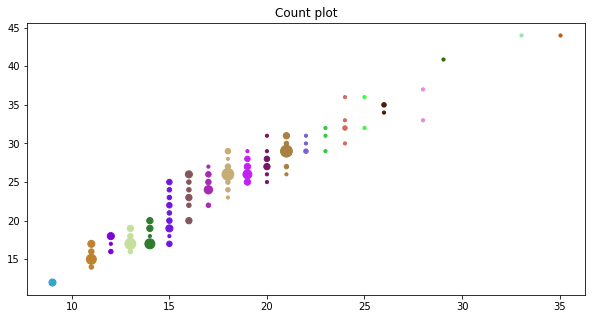

In [28]:
# Useful for:
# Draw a scatterplot where one variable is categorical. 
# In this plot we calculate the size of overlapping points in each category and for each y.
# This way, the bigger the bubble the more concentration we have in that region.

# More info: 
# https://seaborn.pydata.org/generated/seaborn.stripplot.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# we need to make a groupby by variables of interest
gb_df = df.groupby(["cty", "hwy"]).size().reset_index(name = "counts")

# sort the values
gb_df.sort_values(["cty", "hwy", "counts"], ascending = True, inplace = True)

# create a color for each group. 
# there are several way os doing, you can also use this line: 
# colors = [plt.cm.gist_earth(i/float(len(gb_df["cty"].unique()))) for i in range(len(gb_df["cty"].unique()))]
colors = {i:np.random.random(3,) for i in sorted(list(gb_df["cty"].unique()))}

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# iterate over each category and plot the data. This way, every group has it's own color and sizwe.
for x in sorted(list(gb_df["cty"].unique())):
    
    # get x and y values for each group
    x_values = gb_df[gb_df["cty"] == x]["cty"]
    y_values = gb_df[gb_df["cty"] == x]["hwy"]
    
    # extract the size of each group to plot
    size = gb_df[gb_df["cty"] == x]["counts"]
    
    # extract the color for each group and covert it from rgb to hex
    color = matplotlib.colors.rgb2hex(colors[x])
    
    # plot the data
    ax.scatter(x_values, y_values, s = size*10, c = color)
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set title
ax.set_title("Count plot");

<a id = "Plot6"></a>
# Plot 6: Marginal Histogram
[Go back to the Table of Contents](#table_of_contents)

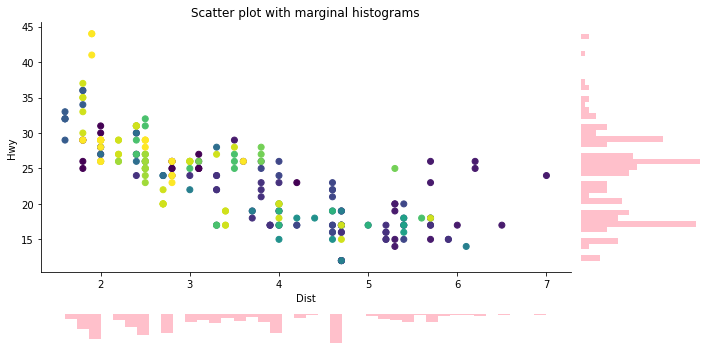

In [29]:
# Useful for:
# This plot is a combination of 2 plots.
# On one side we have a normal scatter plot that is helpful to see the relationship between data (x and y axis)
# But we also add a histogram that is useful to see the concentration/bins and the distribution of a series.

# More info: 
# https://en.wikipedia.org/wiki/Histogram

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# separate x and y
x = df["displ"]
y = df["hwy"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
# in this case we use gridspec.
# check the basics section of this kernel if you need help.
gs = fig.add_gridspec(5, 5)
ax1 = fig.add_subplot(gs[:4, :-1])

# ----------------------------------------------------------------------------------------------------
# plot the data

# main axis: scatter plot
# this line is very nice c = df.manufacturer.astype('category').cat.codes
# since it basically generate a color for each category
ax1.scatter(x, y, c = df.manufacturer.astype('category').cat.codes) 

# set the labels for x and y
ax1.set_xlabel("Dist")
ax1.set_ylabel("Hwy")

# set the title for the main plot
ax1.set_title("Scatter plot with marginal histograms")

# prettify the plot
# get rid of some of the spines to make the plot nicer
ax1.spines["right"].set_color("None")
ax1.spines["top"].set_color("None")

# using familiar slicing, get the bottom axes and plot
ax2 = fig.add_subplot(gs[4:, :-1])
ax2.hist(x, 40, orientation = 'vertical', color = "pink")

# invert the axis (it looks up side down)
ax2.invert_yaxis()

# prettify the plot
# set the ticks to null
ax2.set_xticks([])
ax2.set_yticks([])
# no axis to make plot nicer
ax2.axison = False

# using familiar slicing, get the left axes and plot
ax3 = fig.add_subplot(gs[:4, -1])
ax3.hist(y, 40, orientation = "horizontal", color = "pink")

# prettify the plot
# set the ticks to null
ax3.set_xticks([])
ax3.set_yticks([])
# no axis to make plot nicer
ax3.axison = False

# make all the figures look nicier
fig.tight_layout()

<a id = "Plot7"></a>
# Plot 7: Marginal Boxplot
[Go back to the Table of Contents](#table_of_contents)

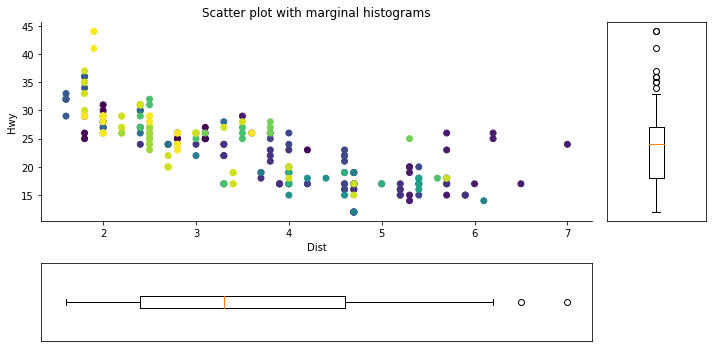

In [30]:
# Useful for:
# A box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles.
# It helps to see the dispersion of a series, thanks to the whiskers

# More info: 
# https://en.wikipedia.org/wiki/Box_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv'
df = pd.read_csv(PATH)


# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
x = df["displ"]
y = df["hwy"]

# in this plot we create the colors separatly
colors = df["manufacturer"].astype("category").cat.codes

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
# in this case we use gridspec.
# check the basics section of this kernel if you need help.
gs = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(gs[:4, :-1])

# ----------------------------------------------------------------------------------------------------
# plot the data

# main axis: scatter plot
# this line is very nice c = df.manufacturer.astype('category').cat.codes
# since it basically generate a color for each category
ax1.scatter(x, y, c = df.manufacturer.astype('category').cat.codes) 

# set the labels for x and y
ax1.set_xlabel("Dist")
ax1.set_ylabel("Hwy")

# set the title for the main plot
ax1.set_title("Scatter plot with marginal histograms")

# prettify the plot
# get rid of some of the spines to make the plot nicer
ax1.spines["right"].set_color("None")
ax1.spines["top"].set_color("None")

# using familiar slicing, get the left axes and plot
ax2 = fig.add_subplot(gs[4:, :-1])
ax2.boxplot(x, 
            vert = False,  
            whis = 0.75 # make the boxplot lines shorter
           )
# prettify the plot
# set the ticks to null
ax2.set_xticks([])
ax2.set_yticks([])

# left plot
ax3 = fig.add_subplot(gs[:4, -1])
ax3.boxplot(y,  
            whis = 0.75 # make the boxplot lines shorter
           )
# prettify the plot
# set the ticks to null
ax3.set_xticks([])
ax3.set_yticks([])

# make all the figures look nicier
fig.tight_layout()

<a id = "Plot8"></a>
# Plot 8: Correllogram (correlation plot)
[Go back to the Table of Contents](#table_of_contents)

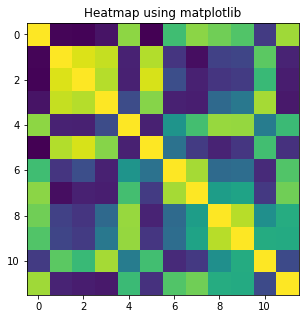

In [31]:
# Useful for:
# The correlation plot helps us to comparte how correlated are 2 variables between them

# More info: 
# https://en.wikipedia.org/wiki/Covariance_matrix#Correlation_matrix

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mtcars.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# plot using matplotlib
ax.imshow(df.corr(), cmap = 'viridis', interpolation = 'nearest')
# set the title for the figure
ax.set_title("Heatmap using matplotlib");

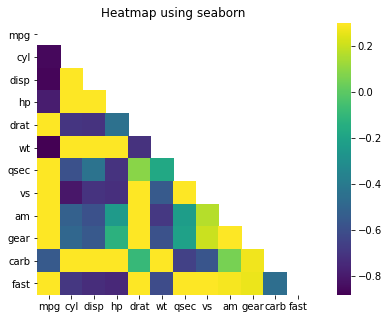

In [32]:
# Useful for:
# The correlation plot helps us to comparte how correlated are 2 variables between them

# More info: 
# https://en.wikipedia.org/wiki/Covariance_matrix#Correlation_matrix

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/mtcars.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# calculate the correlation between all variables
corr = df.corr()
# create a mask to pass it to seaborn and only show half of the cells 
# because corr between x and y is the same as the y and x
# it's only for estetic reasons
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))

# plot the data using seaborn
ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "viridis")
# set the title for the figure
ax.set_title("Heatmap using seaborn");

<a id = "Plot9"></a>
# Plot 9: Pairplot
[Go back to the Table of Contents](#table_of_contents)

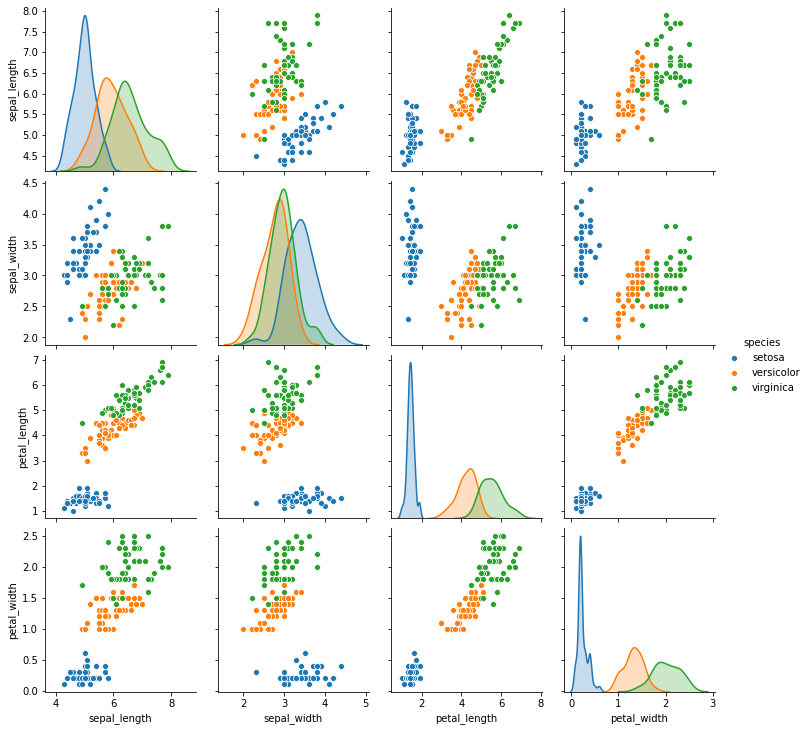

In [33]:
# Useful for:
# Plot pairwise relationships in a dataset. 
# Helps you to see in a glance of an eye all distribution and correlation of variables.

# More info: 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# ----------------------------------------------------------------------------------------------------
# get the data
df = sns.load_dataset('iris')

# plot the data using seaborn
sns.pairplot(df, 
             hue = "species" # helps to separate the values by specios
            );

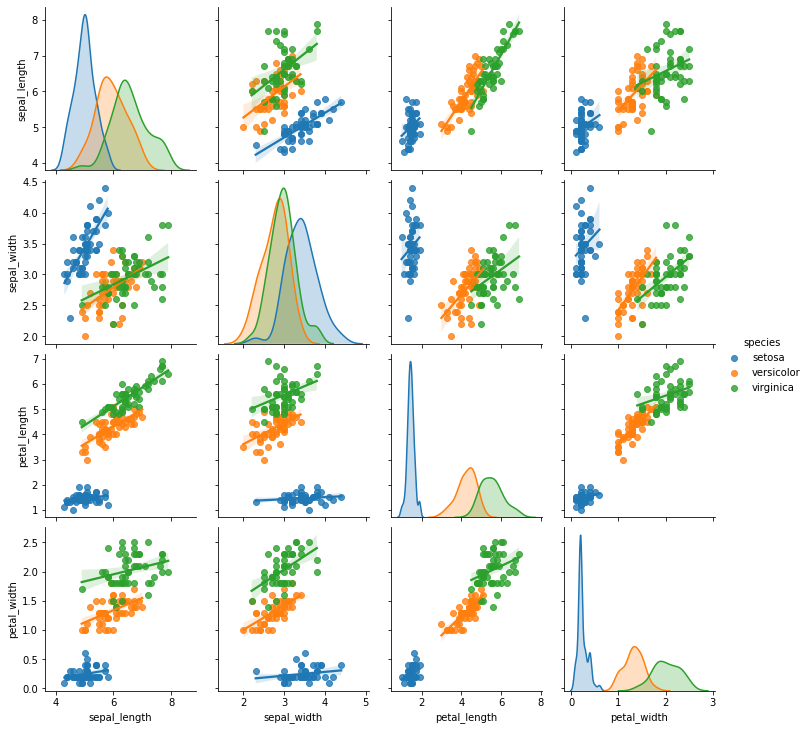

In [34]:
# Useful for:
# Plot pairwise relationships in a dataset. 
# Helps you to see in a glance of an eye all distribution and correlation of variables.
# This plot also plots a regression line to fit each of the data

# More info: 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# ----------------------------------------------------------------------------------------------------
# get the data
df = sns.load_dataset('iris')

# plot the data using seaborn
sns.pairplot(df, 
             kind = "reg", # make a regression line for eac hue and each variables
             hue = "species"
            );

<a id = "Plot10"></a>
# Plot 10: Diverging bars
[Go back to the Table of Contents](#table_of_contents)

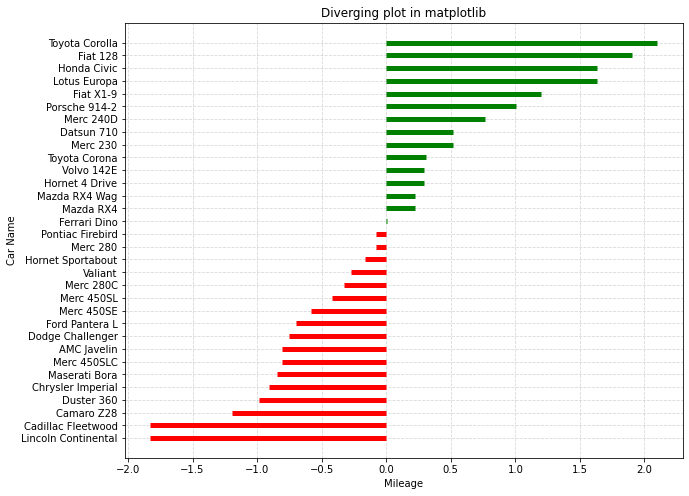

In [35]:
# Useful for:
# Based on a metric to compare, this plot helps you to see the divergence of the a value 
# to that metric (it could be mean, median or others).

# More info: 
# https://blog.datawrapper.de/divergingbars/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
df["x_plot"] = (df["mpg"] - df["mpg"].mean())/df["mpg"].std()

# sort value and reset the index
df.sort_values("x_plot", inplace = True)
df.reset_index(inplace = True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ["red" if x < 0 else "green" for x in df["x_plot"]]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
# plot using horizontal lines and make it look like a column by changing the linewidth
ax.hlines(y = df.index, xmin = 0 , xmax = df["x_plot"],  color = colors, linewidth = 5)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set x and y axis
ax.set_xlabel("Mileage")
ax.set_ylabel("Car Name")

# set a title
ax.set_title("Diverging plot in matplotlib")

# make a grid to help separate the lines
ax.grid(linestyle='--', alpha=0.5)

# change the y ticks
# first you set the yticks
ax.set_yticks(df.index)

# then you change them using the car names
# same can be achived using plt.yticks(df.index, df.cars)
ax.set_yticklabels(df.cars);

<a id = "Plot11"></a>
# Plot 11: Diverging lines with text
[Go back to the Table of Contents](#table_of_contents)

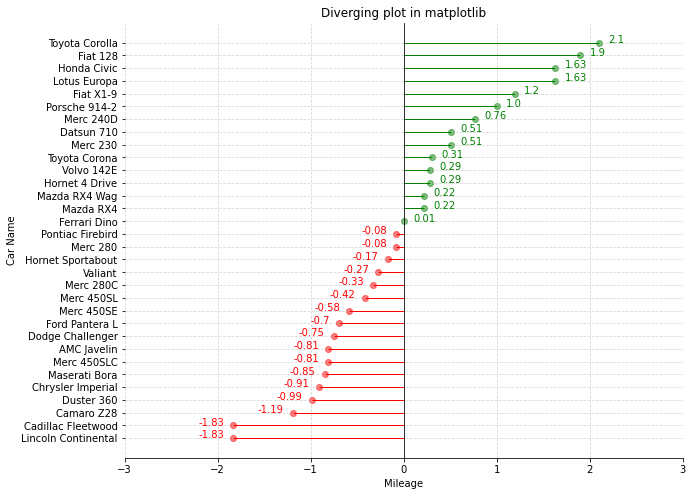

In [36]:
# Useful for:
# This plot is really useful to show the different performance of deviation of data.
# We use text to annotate the value and make more easy the comparison.

# More info: 
# https://blog.datawrapper.de/divergingbars/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
df["x_plot"] = (df["mpg"] - df["mpg"].mean())/df["mpg"].std()

# sort value and reset the index
df.sort_values("x_plot", inplace = True)
df.reset_index(inplace=True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ["red" if x < 0 else "green" for x in df["x_plot"]]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# plot horizontal lines that go from zero to the value
# here we make the linewidht very thin.
ax.hlines(y = df.index, xmin = 0 , color = colors,  xmax = df["x_plot"], linewidth = 1)

# ----------------------------------------------------------------------------------------------------
# plot the data
# iterate over x and y and annotate text and plot the data
for x, y in zip(df["x_plot"], df.index):
    # annotate text
    ax.text(x - 0.1 if x < 0 else x + 0.1, 
             y, 
             round(x, 2), 
             color = "red" if x < 0 else "green",  
             horizontalalignment='right' if x < 0 else 'left', 
             size = 10)
    # plot the points
    ax.scatter(x, 
                y, 
                color = "red" if x < 0 else "green", 
                alpha = 0.5)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set title
ax.set_title("Diverging plot in matplotlib")
# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel("Mileage")
ax.set_ylabel("Car Name")

# make a grid
ax.grid(linestyle='--', alpha=0.5)

# instead of y = 1, 2, 3...
# put the car makers on the y axis
ax.set_yticks(df.index)
ax.set_yticklabels(df.cars)

# change the spines to make it nicer
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")

# with this line, we change the right spine to be in the middle
# as a vertical line from the origin
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('black')

<a id = "Plot12"></a>
# Plot 12: Diverging dot plot
[Go back to the Table of Contents](#table_of_contents)

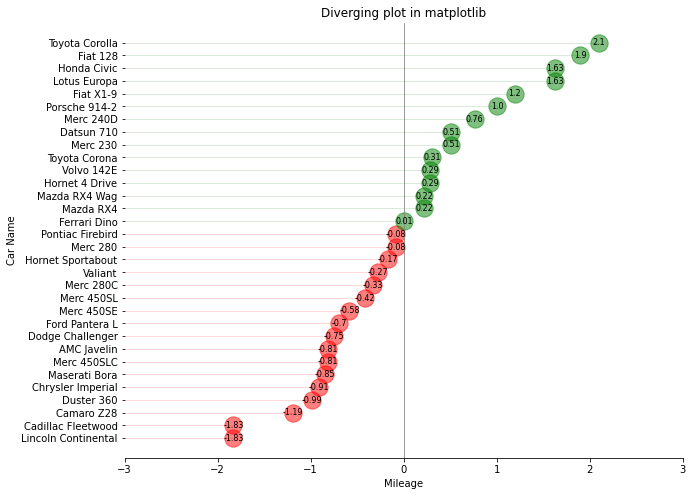

In [37]:
# Useful for:
# This plot is really useful to show the different performance of deviation of data.
# We use text to annotate the value and make more easy the comparison.
# This plot is very similar to the previous 2
# But here we don't draw any lines and just play with the size of each point and make it a little bigger

# More info: 
# https://blog.datawrapper.de/divergingbars/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
df["x_plot"] = (df["mpg"] - df["mpg"].mean())/df["mpg"].std()

# sort value and reset the index
df.sort_values("x_plot", inplace = True)
df.reset_index(inplace=True)

# create a color list, where if value is above > 0 it's green otherwise red
colors = ["red" if x < 0 else "green" for x in df["x_plot"]]


# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
# iterate over x and y and annotate text and plot the data
for x, y in zip(df["x_plot"], df.index):
    
    # make a horizontal line from the y till the x value
    # this doesn't appear in the original 50 plot challenge
    ax.hlines(y = y, 
               xmin = -3,  
               xmax = x, 
               linewidth = 0.5,
               alpha = 0.3,
               color = "red" if x < 0 else "green")
    
    # annotate text
    ax.text(x, 
             y, 
             round(x, 2), 
             color = "black",
             horizontalalignment='center', 
             verticalalignment='center',
             size = 8)
    
    # plot the points
    ax.scatter(x, 
                y, 
                color = "red" if x < 0 else "green", 
                s = 300,
                alpha = 0.5)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set title
ax.set_title("Diverging plot in matplotlib")

# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel("Mileage")
ax.set_ylabel("Car Name")

# instead of y = 1, 2, 3...
# put the car makers on the y axis
ax.set_yticks(df.index)
ax.set_yticklabels(df.cars)

# change the spines to make it nicer
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")

# with this line, we change the right spine to be in the middle
# as a vertical line from the origin
ax.spines['right'].set_position(('data',0))
ax.spines['right'].set_color('grey')

<a id = "Plot13"></a>
# Plot 13: Diverging Lollipop Chart with Markers
[Go back to the Table of Contents](#table_of_contents)

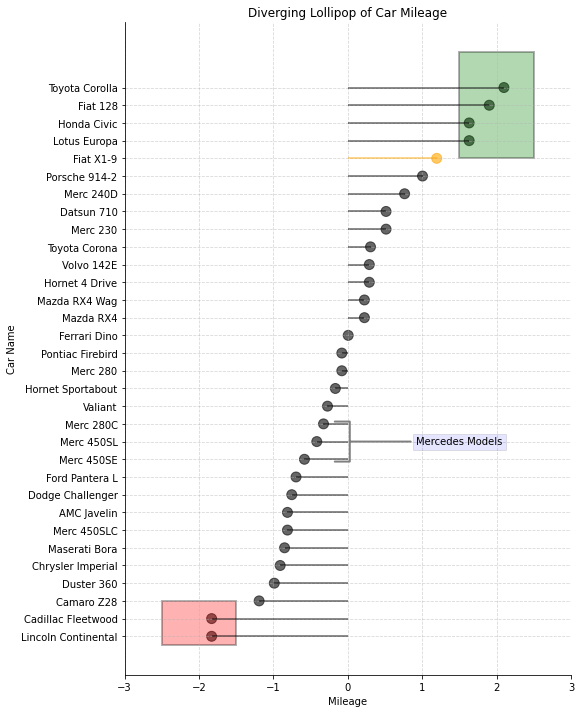

In [38]:
# Useful for:
# This plot is really useful to show the different performance of deviation of data.
# In this plot we use rectagles and matplotlib patches to draw the attention to specific points

# More info: 
# https://blog.datawrapper.de/divergingbars/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
df["x_plot"] = (df["mpg"] - df["mpg"].mean())/df["mpg"].std()

# sort value and reset the index
df.sort_values("x_plot", inplace = True)
df.reset_index(inplace = True)

# we plot everything with a black color except a specific Fiat model
# this way we visually communicate something to the user
df["color"] = df["cars"].apply(lambda car_name: "orange" if car_name == "Fiat X1-9" else "black")


# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
# plot horizontal lines from the origin to each data point
ax.hlines(y = df.index, 
          xmin = 0,
          xmax = df["x_plot"],
          color = df["color"],
          alpha = 0.6)

# plot the dots
ax.scatter(x = df["x_plot"],
          y = df.index,
          s = 100,
          color = df["color"],
          alpha = 0.6)

# add patches
# with this piece of code, we can draw pretty much any patch or shape
# since we are interested in a rectangle, we must submit a list with the 
# coordinates
def add_patch(verts, ax, color):
    '''
    Takes the vertices and the axes as argument and adds the patch to our plot.
    '''
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY,
    ]

    path = Path(verts, codes)
    pathpatch = PathPatch(path, facecolor = color, lw = 2, alpha = 0.3)
    ax.add_patch(pathpatch)

# coordinates for the bottom shape
verts_bottom = [
   (-2.5, -0.5),  # left, bottom
   (-2.5, 2),  # left, top
   (-1.5, 2),  # right, top
   (-1.5, -0.5),  # right, bottom
   (0., 0.),  # ignored
]

# coordinates for the upper shape
verts_upper = [
   (1.5, 27),  # left, bottom
   (1.5, 33),  # left, top
   (2.5, 33),  # right, top
   (2.5, 27),  # right, bottom
   (0., 0.),  # ignored
]

# use the function to add them to the existing plot
add_patch(verts_bottom, ax, color = "red")
add_patch(verts_upper, ax, color = "green")

# annotate text
ax.annotate('Mercedes Models', 
            xy = (0.0, 11.0), 
            xytext = (1.5, 11), 
            xycoords = 'data', 
            fontsize = 10, 
            ha = 'center', 
            va = 'center',
            bbox = dict(boxstyle = 'square', fc = 'blue', alpha = 0.1),
            arrowprops = dict(arrowstyle = '-[, widthB=2.0, lengthB=1.5', lw = 2.0, color = 'grey'), color = 'black')

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set title
ax.set_title("Diverging Lollipop of Car Mileage")

# autoscale
ax.autoscale_view()

# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel("Mileage")
ax.set_ylabel("Car Name")

# instead of y = 1, 2, 3...
# put the car makers on the y axis
ax.set_yticks(df.index)
ax.set_yticklabels(df.cars)

# change the spines to make it nicer
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")

# add a grid
ax.grid(linestyle='--', alpha=0.5);

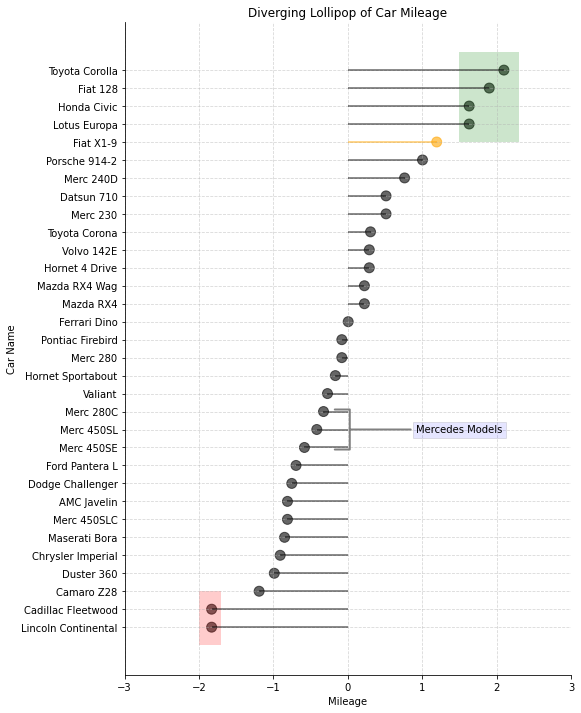

In [39]:
# Useful for:
# This plot is really useful to show the different performance of deviation of data.
# In this plot we use rectagles and matplotlib patches to draw the attention to specific points
# This example shows how to add patches more easily

# More info: 
# https://blog.datawrapper.de/divergingbars/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# here we standarize the data
# More info:
# https://statisticsbyjim.com/glossary/standardization/
df["x_plot"] = (df["mpg"] - df["mpg"].mean())/df["mpg"].std()

# sort value and reset the index
df.sort_values("x_plot", inplace = True)
df.reset_index(inplace = True)

# we plot everything with a black color except a specific Fiat model
# this way we visually communicate something to the user
df["color"] = df["cars"].apply(lambda car_name: "orange" if car_name == "Fiat X1-9" else "black")


# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
# plot horizontal lines from the origin to each data point
ax.hlines(y = df.index, 
          xmin = 0,
          xmax = df["x_plot"],
          color = df["color"],
          alpha = 0.6)

# plot the dots
ax.scatter(x = df["x_plot"],
          y = df.index,
          s = 100,
          color = df["color"],
          alpha = 0.6)

# add patches more easily
# It's easier to draw shapes like rectangles or squares, since this way
# we only must specify 2 points, and matplotlib does all the job
p1 = patches.Rectangle((-2.0, -1), width = .3, height = 3, alpha = .2, facecolor = 'red')
p2 = patches.Rectangle((1.5, 27), width = .8, height = 5, alpha = .2, facecolor = 'green')
ax.add_patch(p1)
ax.add_patch(p2)

# annotate text
ax.annotate('Mercedes Models', 
            xy = (0.0, 11.0), 
            xytext = (1.5, 11), 
            xycoords = 'data', 
            fontsize = 10, 
            ha = 'center', 
            va = 'center',
            bbox = dict(boxstyle = 'square', fc = 'blue', alpha = 0.1),
            arrowprops = dict(arrowstyle = '-[, widthB=2.0, lengthB=1.5', lw = 2.0, color = 'grey'), color = 'black')

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set title
ax.set_title("Diverging Lollipop of Car Mileage")

# autoscale
ax.autoscale_view()

# change x lim
ax.set_xlim(-3, 3)

# set labels
ax.set_xlabel("Mileage")
ax.set_ylabel("Car Name")

# instead of y = 1, 2, 3...
# put the car makers on the y axis
ax.set_yticks(df.index)
ax.set_yticklabels(df.cars)

# change the spines to make it nicer
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")

# add a grid
ax.grid(linestyle='--', alpha=0.5);

<a id = "Plot14"></a>
# Plot 14: Area chart
[Go back to the Table of Contents](#table_of_contents)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


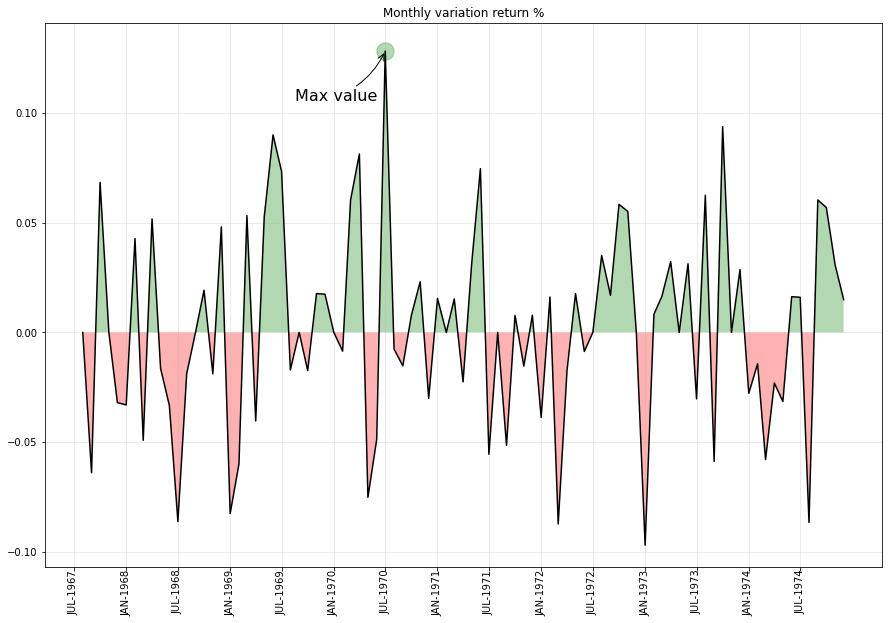

In [40]:
# Useful for:
# Area chart is really useful when you want to drawn the attention about when a series is below a certain point.
# The area between axis and line are commonly emphasized with colors, textures and hatchings. 
# Commonly one compares two or more quantities with an area chart.

# More info: 
# https://en.wikipedia.org/wiki/Area_chart

# ----------------------------------------------------------------------------------------------------
# get the data

PATH = "/kaggle/input/the-50-plot-challenge/economics.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# create the variation between 2 consecutive rows
df["pce_monthly_change"] = (df["psavert"] - df["psavert"].shift(1))/df["psavert"].shift(1)

# convert todatetime
df["date_converted"] = pd.to_datetime(df["date"])

# filter our df for a specific date
df = df[df["date_converted"] < np.datetime64("1975-01-01")]

# separate x and y 
x = df["date_converted"]
y = df["pce_monthly_change"]

# calculate the max values to annotate on the plot
y_max = y.max()

# find the index of the max value
x_ind = np.where(y == y_max)

# find the x based on the index of max
x_max = x.iloc[x_ind]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.plot(x, y, color = "black")
ax.scatter(x_max, y_max, s = 300, color = "green", alpha = 0.3)

# annotate the text of the Max value
ax.annotate(r'Max value',
             xy = (x_max, y_max), 
             xytext = (-90, -50), 
             textcoords = 'offset points', 
             fontsize = 16,
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2")
           )
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# fill the area with a specific color
ax.fill_between(x, 0, y, where = 0 > y, facecolor='red', interpolate = True, alpha = 0.3)
ax.fill_between(x, 0, y, where = 0 <= y, facecolor='green', interpolate = True, alpha = 0.3)

# change the ylim to make it more pleasant for the viewer
ax.set_ylim(y.min() * 1.1, y.max() * 1.1)

# change the values of the x axis
# extract the first 3 letters of the month
xtickvals = [str(m)[:3].upper() + "-" + str(y) for y,m in zip(df.date_converted.dt.year, df.date_converted.dt.month_name())]

# this way we can set the ticks to be every 6 months.
ax.set_xticks(x[::6])

# change the current ticks to be our string month value
# basically pass from this: 1967-07-01
# to this: JUL-1967
ax.set_xticklabels(xtickvals[::6], rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# add a grid
ax.grid(alpha = 0.3)

# set the title
ax.set_title("Monthly variation return %");

<a id = "Plot15"></a>
# Plot 15: Ordered Bar Chart
[Go back to the Table of Contents](#table_of_contents)

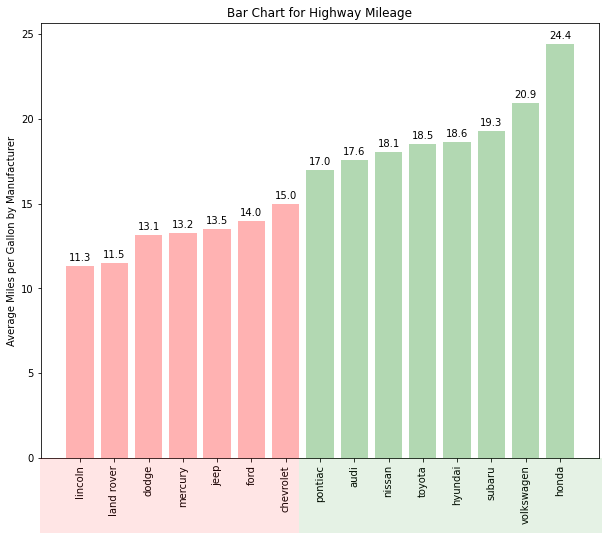

In [41]:
# Useful for:
# This is a normal bar chart but ordered in a specific way.
# From the lowest to the highest values
# It's useful to show comparisons among discrete categories.

# More info: 
# https://en.wikipedia.org/wiki/Bar_chart

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
    
     # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# Add a patch below the x axis line to enphasize that they are below the mean
# I had to copy and paste this code, since I didn't manage to figure it out.
# red one
p2 = patches.Rectangle((.124, -0.005), width = .360, height = .13, alpha = .1, facecolor = 'red', transform = fig.transFigure)
fig.add_artist(p2)

# green one
p1 = patches.Rectangle((.124 + .360, -0.005), width = .42, height = .13, alpha = .1, facecolor = 'green', transform = fig.transFigure)
fig.add_artist(p1)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation=90)

# add an y label
ax.set_ylabel("Average Miles per Gallon by Manufacturer")

# set a title
ax.set_title("Bar Chart for Highway Mileage");

<a id = "Plot16"></a>
# Plot 16: Lollipop Chart
[Go back to the Table of Contents](#table_of_contents)

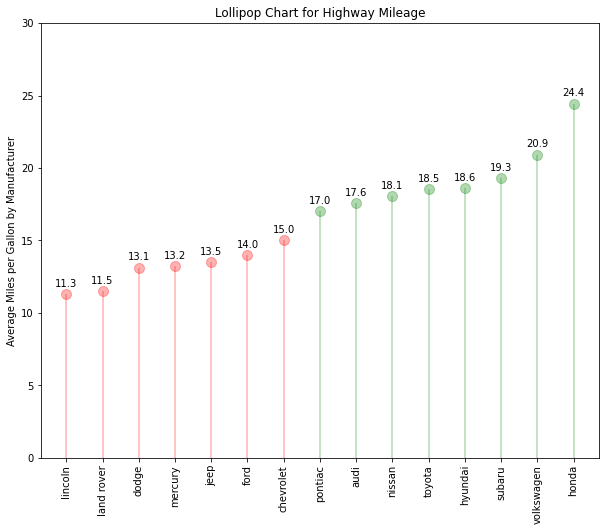

In [42]:
# Useful for:
# The purpose of this kind of chart is the same as a normal bar chart.
# The lollipop chart is often claimed to be useful compared to a normal bar chart, 
# if you are dealing with a large number of values and when the values are all high, such as in the 80-90% range (out of 100%). 
# Then a large set of tall columns can be visually aggressive.

# More info: 
# https://datavizproject.com/data-type/lollipop-chart/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    # make a scatter plot
    ax.scatter(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3, s = 100)
    
    # add vertical lines to connect them to the data point (head of the lollipop)
    ax.vlines(x_, ymin = 0, ymax = y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
    
    # add text with the data
    ax.text(x_, y_ + 0.5, round(y_, 1), horizontalalignment='center')
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the ylim
ax.set_ylim(0, 30)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation = 90)

# add an y label
ax.set_ylabel("Average Miles per Gallon by Manufacturer")

# set a title
ax.set_title("Lollipop Chart for Highway Mileage");

<a id = "Plot17"></a>
# Plot 17: Dot plot
[Go back to the Table of Contents](#table_of_contents)

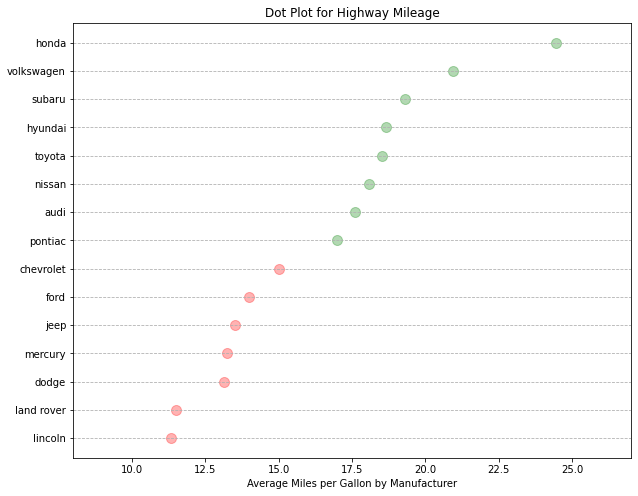

In [43]:
# Useful for:
# This plot is the same as the diverging dot plot but here we don't add the line.
# # This plot is really useful to show the different performance of deviation of data.

# More info: 
# https://www.mathsisfun.com/data/dot-plots.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for x_, y_ in zip(x, y):
    ax.scatter(y_, x_, color = "red" if y_ < y.mean() else "green", alpha = 0.3, s = 100)
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the xlim
ax.set_xlim(8, 27)

# add an y label
ax.set_xlabel("Average Miles per Gallon by Manufacturer")

# set the title
ax.set_title("Dot Plot for Highway Mileage")

# create the grid only for the y axis
ax.grid(which = 'major', axis = 'y', linestyle = '--');

<a id = "Plot18"></a>
# Plot 18: Slope chart
[Go back to the Table of Contents](#table_of_contents)

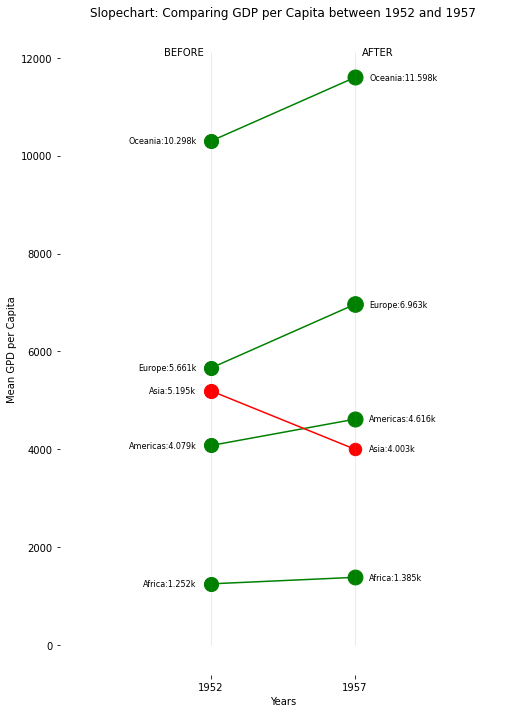

In [44]:
# Useful for:
# This chart is very useful to show the variation of some kind of data
# between two points in time (you can expand it for more points though).

# More info: 
# https://datavizproject.com/data-type/slope-chart/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH  = '/kaggle/input/the-50-plot-challenge/gdppercap.csv'
df = pd.read_csv(PATH)

# create a column with the colors, since we will be iterating and changing the value based on their performance
# if the value at the starting point is bigger than the ending, green color
# otherwise, red color
df["color"] = df.apply(lambda row: "green" if row["1957"] >= row["1952"] else "red", axis = 1)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 12))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for cont in df["continent"]:
    
    # prepare the data for plotting
    # extract each point and the color
    x_start = df.columns[1]
    x_finish = df.columns[2]
    y_start = df[df["continent"] == cont]["1952"]
    y_finish = df[df["continent"] == cont]["1957"]
    color = df[df["continent"] == cont]["color"]
    
    # plot eac point
    ax.scatter(x_start, y_start, color = color, s = 200)
    ax.scatter(x_finish, y_finish, color = color, s = 200*(y_finish/y_start))
    
    # connect the starting point and the ending point with a line
    # check the bouns section for more
    ax.plot([x_start, x_finish], [float(y_start), float(y_finish)], linestyle = "-", color = color.values[0])
    
    # annotate the value for each continent
    ax.text(ax.get_xlim()[0] - 0.05, y_start, r'{}:{}k'.format(cont, int(y_start)/1000), horizontalalignment = 'right', verticalalignment = 'center', fontdict = {'size':8})
    ax.text(ax.get_xlim()[1] + 0.05, y_finish, r'{}:{}k'.format(cont, int(y_finish)/1000), horizontalalignment = 'left', verticalalignment = 'center', fontdict = {'size':8})

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the x and y limits
x_lims = ax.get_xlim()
y_lims = ax.get_ylim()

# change the x and y limits programmaticaly
ax.set_xlim(x_lims[0] - 1, x_lims[1] + 1);

# add 2 vertical lines
ax.vlines(x_start, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)
ax.vlines(x_finish, 0, y_lims[1], color = "grey", alpha = 0.3, lw = 0.5)

# for each vertical line, add text: BEFORE and AFTER to help understand the plot
ax.text(x_lims[0], y_lims[1], "BEFORE", horizontalalignment = 'right', verticalalignment = 'center')
ax.text(x_lims[1], y_lims[1], "AFTER", horizontalalignment = 'left', verticalalignment = 'center')

# set and x and y label
ax.set_xlabel("Years")
ax.set_ylabel("Mean GPD per Capita")

# add a title
ax.set_title("Slopechart: Comparing GDP per Capita between 1952 and 1957")

# remove all the spines of the axes
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

<a id = "Plot19"></a>
# Plot 19: Dumbbell plot
[Go back to the Table of Contents](#table_of_contents)

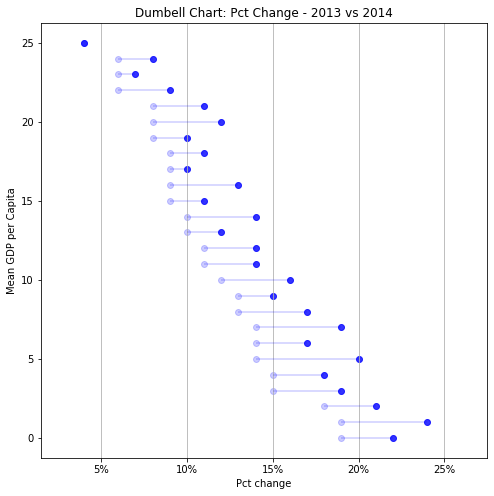

In [45]:
# Useful for:
# It's scope if very similar as a slope chart
# Dumbbell plot (also known as Dumbbell chart, Connected dot plot) is great for displaying changes between two points in time, two conditions or differences between two groups.

# More info: 
# https://www.amcharts.com/demos/dumbbell-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/health.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
for i, area in zip(df.index, df["Area"]):
    
    # extract the data for each area
    start_data = df[df["Area"] == area]["pct_2013"].values[0]
    finish_data = df[df["Area"] == area]["pct_2014"].values[0]
    
    # plot the starting and ending plots
    ax.scatter(start_data, i, c = "blue", alpha = .8)
    ax.scatter(finish_data, i, c = "blue", alpha = .2)
    
    # connect them with an horizontal line
    ax.hlines(i, start_data, finish_data, color = "blue", alpha = .2)
    
# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set x and y label
ax.set_xlabel("Pct change")
ax.set_ylabel("Mean GDP per Capita")

# set the title
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014")

# add grid lines for the x axis to better separate the data
ax.grid(axis = "x")

# change the x limit programatically
x_lim = ax.get_xlim()
ax.set_xlim(x_lim[0]*.5, x_lim[1]*1.1)

# change the x ticks to be rounded pct %
x_ticks = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(round(tick*100, 0)) for tick in x_ticks]);

<a id = "Plot20"></a>
# Plot 20: Histogram for continuous variable
[Go back to the Table of Contents](#table_of_contents)

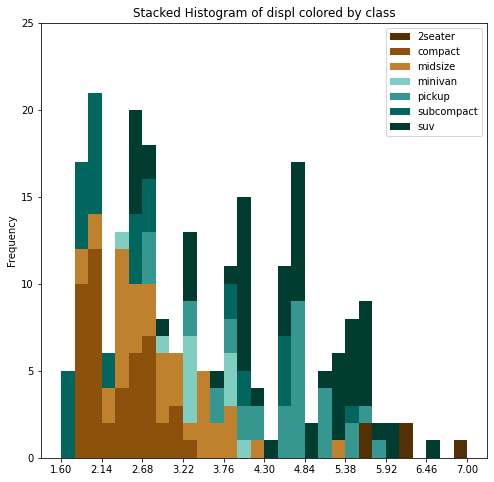

In [46]:
# Useful for:
# This is one of the most fundamental plots to master
# It's shows the approximate distributin of numerical or categorical data.

# More info: 
# https://en.wikipedia.org/wiki/Histogram

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
gb_df = df[["class", "displ"]].groupby("class")
lx = []
ln = []

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# iterate over very groupby group and 
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["displ"].values.tolist())
    ln.append(list(set(df_["class"].values.tolist()))[0])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 30, stacked = True, density = False, color = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change x lim
ax.set_ylim(0, 25)
# set the xticks to reflect every third value
ax.set_xticks(bins[::3])

# set a title
ax.set_title("Stacked Histogram of displ colored by class")

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# set the y label
ax.set_ylabel("Frequency");

<a id = "Plot21"></a>
# Plot 21: Histogram for categorical variable
[Go back to the Table of Contents](#table_of_contents)

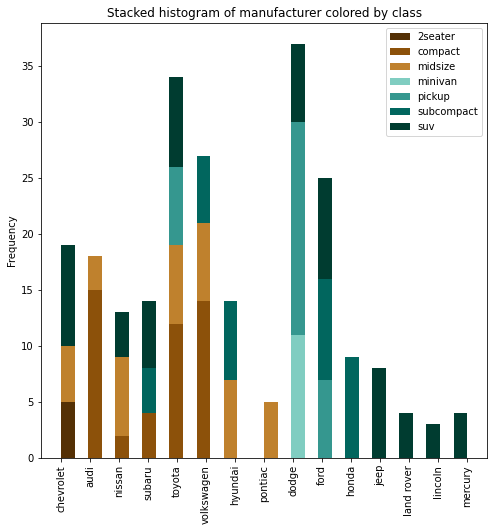

In [47]:
# Useful for:
# This is one of the most fundamental plots to master
# It's shows the approximate distributin of numerical or categorical data.

# More info: 
# https://en.wikipedia.org/wiki/Histogram

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
gb_df = df[["class", "manufacturer"]].groupby("class")
lx = []
ln = []

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# iterate over very groupby group and 
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["manufacturer"].values.tolist())
    ln.append(list(set(df_["class"].values.tolist()))[0])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 30, stacked = True, density = False, color = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# rotate the x axis label
ax.tick_params(axis = 'x', labelrotation = 90)

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# add a title
ax.set_title("Stacked histogram of manufacturer colored by class")

# set an y label
ax.set_ylabel("Frequency");

<a id = "Plot22"></a>
# Plot 22: Density plot
[Go back to the Table of Contents](#table_of_contents)

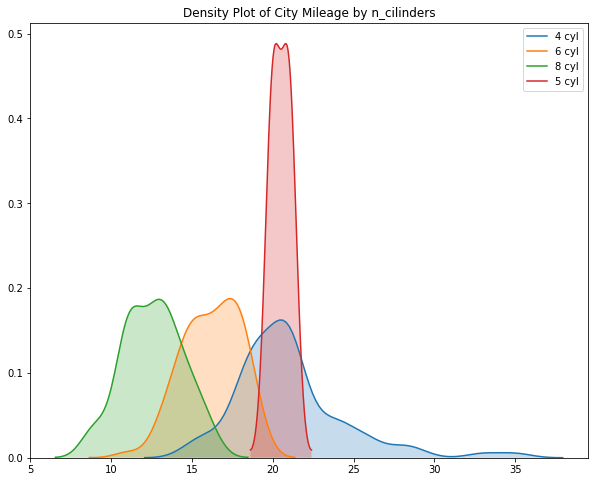

In [48]:
# Useful for:
# A density plot is a representation of the distribution of a numeric variable. 
# It uses a kernel density estimate to show the probability density function of the variable

# More info: 
# https://www.data-to-viz.com/graph/density.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
for cyl_ in df["cyl"].unique():
    # extract the data
    x = df[df["cyl"] == cyl_]["cty"]
    # plot the data using seaborn
    sns.kdeplot(x, shade=True, label = "{} cyl".format(cyl_))

# set the title of the plot
plt.title("Density Plot of City Mileage by n_cilinders");

<a id = "Plot23"></a>
# Plot 23: Density curves with histograms
[Go back to the Table of Contents](#table_of_contents)

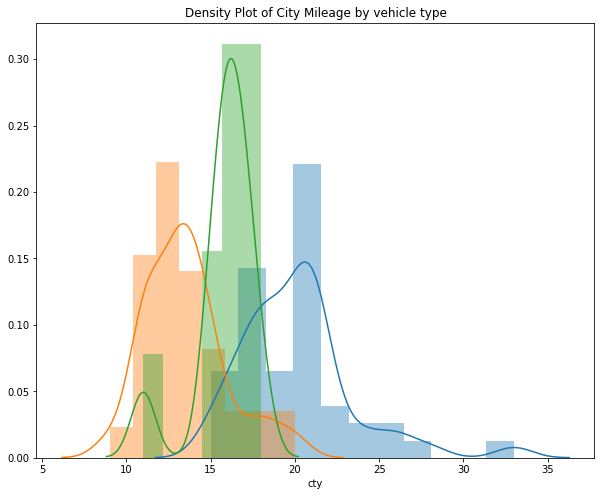

In [49]:
# Useful for:
# A density plot is a representation of the distribution of a numeric variable. 
# It uses a kernel density estimate to show the probability density function of the variable
# This variation plots the histogram aswel

# More info: 
# https://www.data-to-viz.com/graph/density.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 8))

# ----------------------------------------------------------------------------------------------------
# plot the data
# the idea is to iterate over each class
# extract their data ad plot a sepate density plot
# with their histogram
for class_ in ["compact", "suv", "minivan"]:
    # extract the data
    x = df[df["class"] == class_]["cty"]
    # plot the data using seaborn
    sns.distplot(x, kde = True, label = "{} class".format(class_))
    
# set the title of the plot
plt.title("Density Plot of City Mileage by vehicle type");

<a id = "Plot24"></a>
# Plot 24: Joyplot
[Go back to the Table of Contents](#table_of_contents)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

<Figure size 1280x800 with 0 Axes>

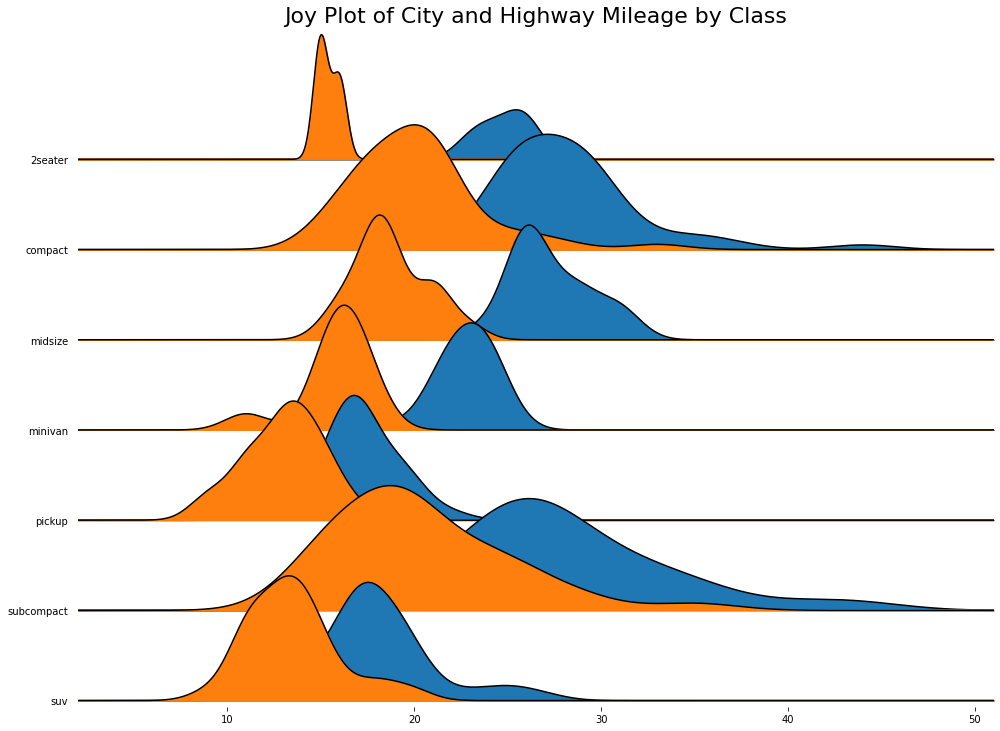

In [50]:
# Useful for:
# Joyplot are one of the favorites. 
# Joyplots are essentially just a number of stacked overlapping density plots, that look like a mountain ridge, if done right.

# More info: 
# https://sbebo.github.io/posts/2017/08/01/joypy/
# http://sigmaquality.pl/data-plots/perfect-plots-joyplot-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (16,10), dpi = 80)
# plot the data using joypy
fig, axes = joypy.joyplot(df, 
                          column = ['hwy', 'cty'], # colums to be plotted.
                          by = "class", # separate the data by this value. Creates a separate distribution for each one.
                          ylim = 'own', 
                          figsize = (14,10)
                         )

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add a title
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize = 22);

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

<Figure size 2280x1520 with 0 Axes>

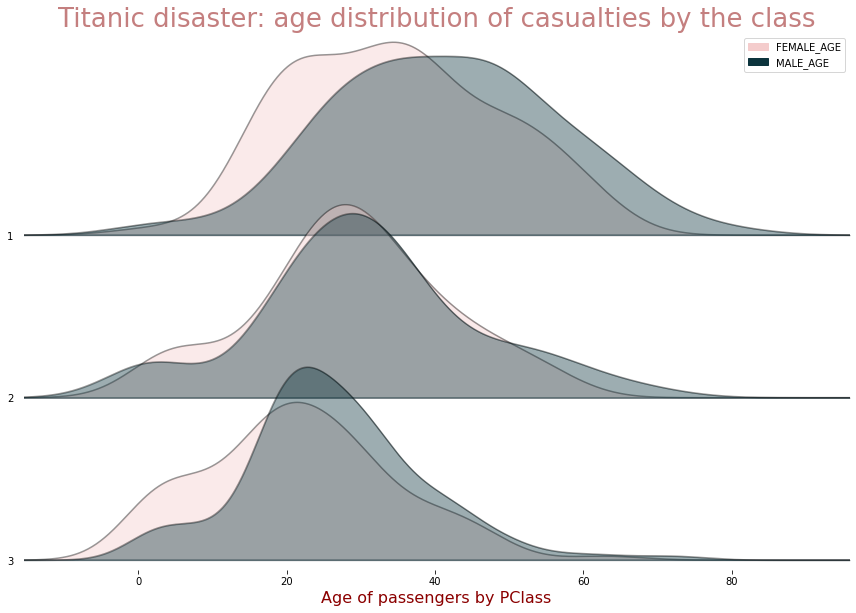

In [51]:
# Useful for:
# Joyplot are one of the favorites. 
# Joyplots are essentially just a number of stacked overlapping density plots, that look like a mountain ridge, if done right.
# This is another example for the Titanic dataset

# More info: 
# https://sbebo.github.io/posts/2017/08/01/joypy/
# http://sigmaquality.pl/data-plots/perfect-plots-joyplot-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/titanic/train.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# create 2 columns with the age of a person if their are male (MALE_AGE) or female (FEMALE_AGE)
df["MALE_AGE"] = df.apply(lambda row: row["Age"] if row["Sex"] == "male" else np.nan, axis = 1)
df["FEMALE_AGE"] = df.apply(lambda row: row["Age"] if row["Sex"] == "female" else np.nan, axis = 1)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(dpi = 380)
# plot the data using joypy
fig, axes = joypy.joyplot(df, 
                          column=['FEMALE_AGE', 'MALE_AGE'], # colums to be plotted.
                          by = "Pclass", # separate the data by this value. Creates a separate distribution for each one.
                          ylim = 'own', 
                          figsize = (12,8), 
                          legend = True, 
                          color = ['#f4cccc', '#0c343d'], 
                          alpha = 0.4
                         )

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add a title with a specific color and fontisze
plt.title('Titanic disaster: age distribution of casualties by the class', fontsize = 26, color = 'darkred', alpha = .5)

# change the font of the text on the plot
plt.rc("font", size = 20)

# set and x label with a specific color and size
plt.xlabel('Age of passengers by PClass',  fontsize = 16, color = 'darkred', alpha = 1);

<a id = "Plot25"></a>
# Plot 25: Distributed dot plot
[Go back to the Table of Contents](#table_of_contents)

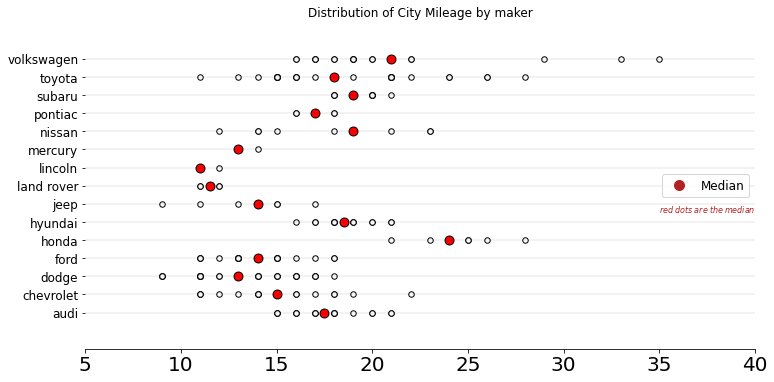

In [52]:
# Useful for:
# This plot is very cool if you want to show the distribution of some categorical values
# and mark some interesting value, like median, mean of max values with a specific color

# More info: 
# https://www.statisticshowto.com/what-is-a-dot-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)
# sort the values
df.sort_values(["manufacturer", "cty"], inplace = True)
lc = []

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

# iterate over each car manufacturer
for i, car in enumerate(df["manufacturer"].unique()):
    # prepare the data for plotting
    # get x and y
    x = df[df["manufacturer"] == car]["cty"]
    y = [car for i_ in range(len(x))]
    
    # calculate the median value
    x_median = np.median(x)
    
    # plot the data
    ax.scatter(x, y, c = "white", edgecolor = "black", s = 30)
    ax.scatter(x_median, i, c = "red",  edgecolor = "black", s = 80)
    
    # add some horizontal line so we can easily track each manufacturer with their distribution
    ax.hlines(i, 0, 40, linewidth = .1)
    
    # append the car name 
    # we need this to change the y labels
    lc.append(car)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change x and y label
ax.set_xlim(5, 40)
ax.set_ylim(-2, 16)

# change the ylabel fontsize
ax.tick_params(axis = "y", labelsize = 12)

# set a title
ax.set_title("Distribution of City Mileage by maker", fontsize = 12)

# annotate some text that will be placed below the legend
ax.text(35, 5.5, "$red \; dots \; are \; the \: median$", fontdict={'size':8}, color='firebrick')

# create a custom legend
# a red circe for the median
red_patch = plt.plot([],[], marker = "o", ms = 10, ls = "", mec = None, color = 'firebrick', label = "Median")

# add the patch and render the legend
plt.legend(handles = red_patch, loc = 7, fontsize = 12)

# remove 3 spines to make a prettier plot
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["top"].set_color("None");

<a id = "Plot26"></a>
# Plot 26: Box plot
[Go back to the Table of Contents](#table_of_contents)

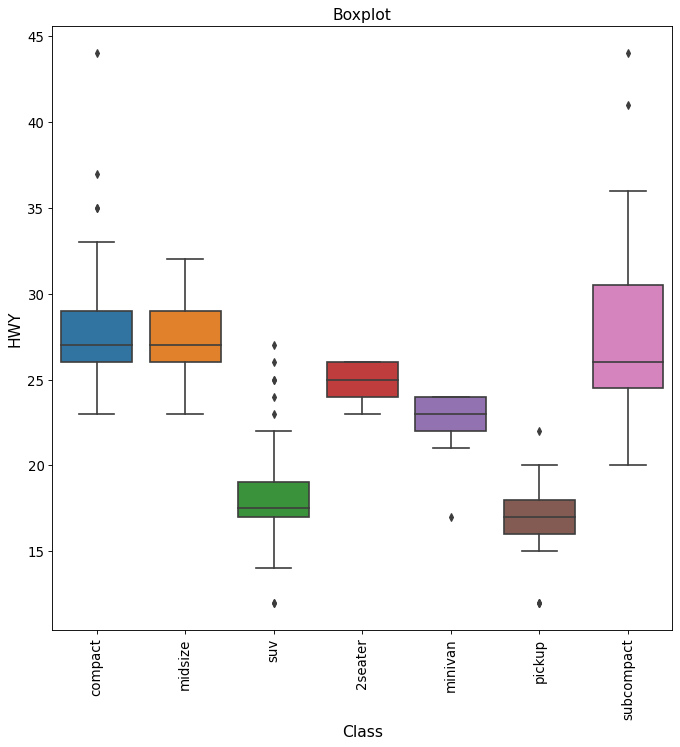

In [53]:
# Useful for:
# Boxplot is a fundamenta chart in statistics.
# It helps to show the distribution of categorical data through quartiles.
# It helps also to see the dispersion of a series, thanks to the whiskers

# More info: 
# https://en.wikipedia.org/wiki/Box_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 10), dpi = 80)
# plot the data using seaborn
ax = sns.boxplot(x = "class", y = "hwy", data = df)


# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the font of the x and y ticks (numbers on the axis)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set and x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# set a title
ax.set_title("Boxplot", fontsize = 14);

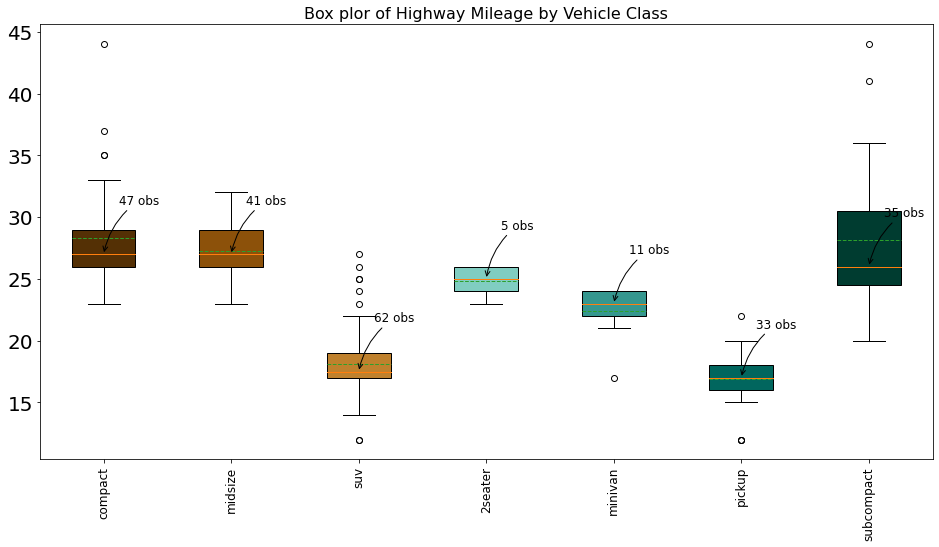

In [54]:
# Useful for:
# Boxplot is a fundamenta chart in statistics.
# It helps to show the distribution of categorical data through quartiles.
# It helps also to see the dispersion of a series, thanks to the whiskers.
# This plot adds annotation for each box to add additional information to the plot.

# More info: 
# https://en.wikipedia.org/wiki/Box_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# vectors to plot
vects = [df[df["class"] == car]["hwy"] for car in df["class"].unique()]

# labels for the x axis
labels = [class_ for class_ in df["class"].unique()]

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
plot1 = ax.boxplot(vects,
    notch = False, 
    vert = True,
    meanline = True,
    showmeans = True,
    patch_artist=True
)

# iterate over every box and add some annotations
for box, color, vect, label, tick in zip(plot1["boxes"], # using this line, you can iterate over every box
                                         colors, 
                                         vects, 
                                         labels, 
                                         ax.get_xticks()):
    # change the color of the box
    box.set(facecolor = color)
    # add text
    ax.annotate("{} obs".format(len(vect)), 
                xy = (tick, np.median(vect)),
               xytext = (15, 50),
               textcoords = "offset points",
               arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"),
               fontsize = 12)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the x labels
ax.set_xticklabels(labels = labels)

# change the rotation and the size of the x ticks (numbers of x axis)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)

# set the title for the plot
ax.set_title("Box plor of Highway Mileage by Vehicle Class", fontsize = 16);

<a id = "Plot27"></a>
# Plot 27: Dot + box plot
[Go back to the Table of Contents](#table_of_contents)

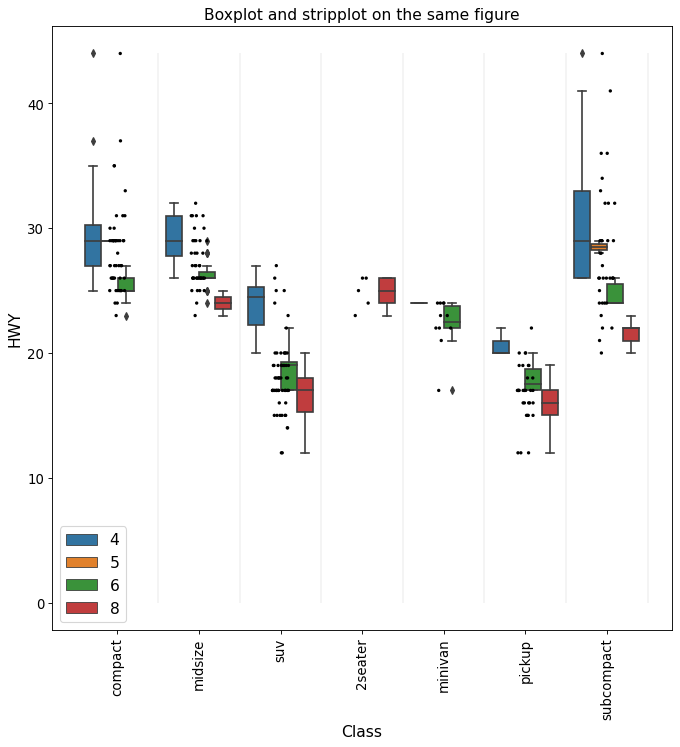

In [55]:
# Useful for:
# This plot is very cool, since it allows you to have on the same plot
# a box plot and a dot plot. 
# This way it allows you to have more information to analyze.
# Using seaborn we can also pass the hue to differentiate between classes.

# More info: 
# https://en.wikipedia.org/wiki/Box_plot
# https://en.wikipedia.org/wiki/Dot_plot_(statistics)

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 10), dpi= 80)
# plot the data using seaborn
# since we don't create a specific separete plot
# everything will be rendered on the same axes
sns.boxplot(x = "class", y = "hwy", data = df, hue = "cyl")
sns.stripplot(x = 'class', y = 'hwy', data = df, color = 'black', size = 3, jitter = 1)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the current figure
ax = plt.gca()
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df["hwy"]), color = "grey", alpha = .1)

# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# add a title and put the legend on a specific location
ax.set_title("Boxplot and stripplot on the same figure", fontsize = 14)
ax.legend(loc = "lower left", fontsize = 14);

<a id = "Plot28"></a>
# Plot 28: Violin plot
[Go back to the Table of Contents](#table_of_contents)

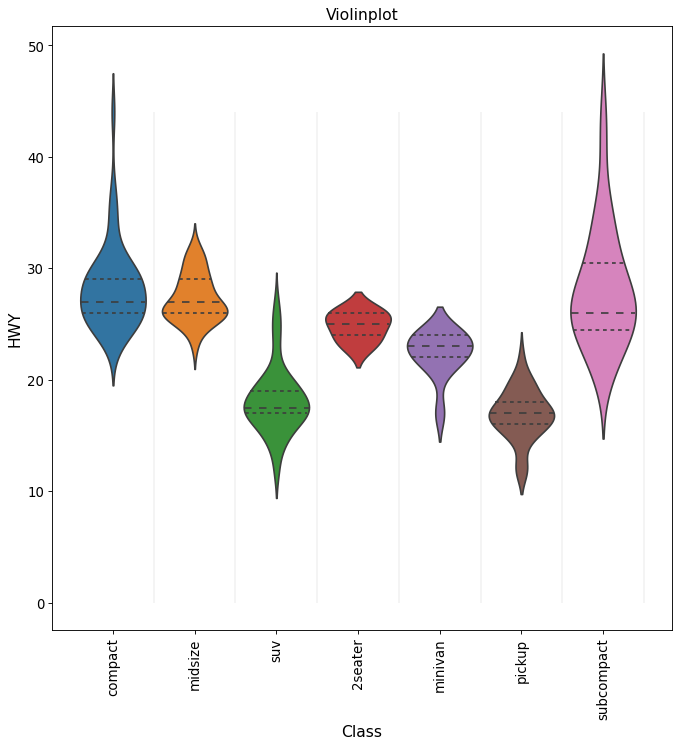

In [56]:
# Useful for:
# Violin plot is another fundamental plot in statistics
# It helps you see the probability density of the data at different values.

# More info: 
# https://en.wikipedia.org/wiki/Violin_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 10), dpi= 80)
sns.violinplot(x = "class", 
               y = "hwy", 
               data = df, 
               scale = 'width', 
               inner = 'quartile'
              )

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the current figure
ax = plt.gca()
# get the xticks to iterate over
xticks = ax.get_xticks()

# iterate over every xtick and add a vertical line
# to separate different classes
for tick in xticks:
    ax.vlines(tick + 0.5, 0, np.max(df["hwy"]), color = "grey", alpha = .1)
    
# rotate the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# set title
ax.set_title("Violinplot", fontsize = 14);

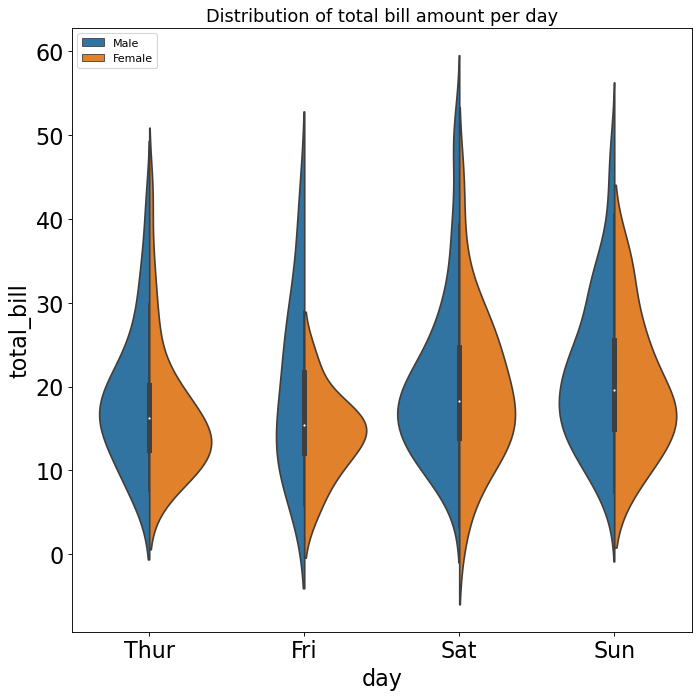

In [57]:
# Useful for:
# Violin plot is another fundamental plot in statistics
# It helps you see the probability density of the data at different values.

# More info: 
# https://en.wikipedia.org/wiki/Violin_plot

# ----------------------------------------------------------------------------------------------------
# get the data
tips = sns.load_dataset("tips")

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 10), dpi= 80)

# plot the data using seaborn
# the cool thing is that we put split = True and have 4 violin plots instead of 8
ax = sns.violinplot(x = "day", y = "total_bill", hue = "sex", split = True, data = tips)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set a title and change the legend location
ax.set_title('Distribution of total bill amount per day', fontsize = 16)
ax.legend(loc = "upper left", fontsize = 10);

<a id = "Plot29"></a>
# Plot 29: Population pyramid
[Go back to the Table of Contents](#table_of_contents)

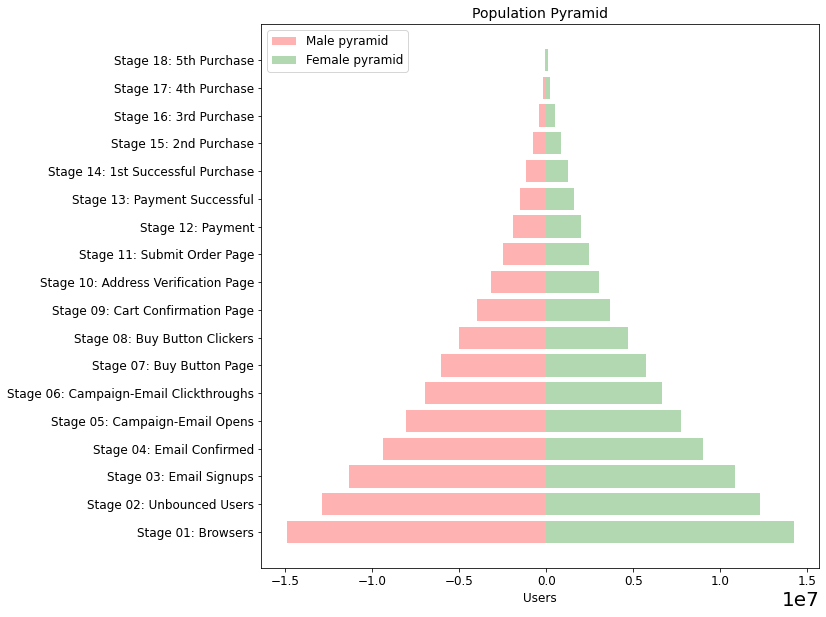

In [58]:
# Useful for:
# The population chart is a type of funnel chart.
# It really helps out to see the gain/loss of certain amount at every stage in a process.

# More info: 
# https://en.wikipedia.org/wiki/Population_pyramid

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/email_campaign_funnel.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
gb_df = df.groupby(["Stage", "Gender"])["Users"].sum().to_frame().reset_index()
gb_df.set_index("Stage", inplace = True)

# separate the different groups to be plotted
x_male = gb_df[gb_df["Gender"] == "Male"]["Users"]
x_female = gb_df[gb_df["Gender"] == "Female"]["Users"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_male.index, x_male, color = "red", alpha = 0.3, label = "Male pyramid")
ax.barh(x_female.index, x_female, color = "green", alpha = 0.3, label = "Female pyramid")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "upper left", fontsize = 12)
# set xlabel
ax.set_xlabel("Users", fontsize = 12)
# set the title for the plot
ax.set_title("Population Pyramid", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

<a id = "Plot30"></a>
# Plot 30: Categorical plot
[Go back to the Table of Contents](#table_of_contents)

<Figure size 864x432 with 0 Axes>

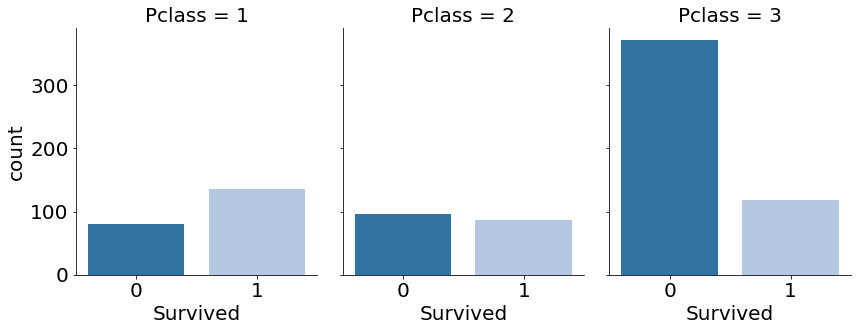

In [59]:
# Useful for:
# This is a normal barplot (we show count of each classes)
# But seabron makes it really easy to plot this effortlessly

# More info: 
# https://seaborn.pydata.org/tutorial/categorical.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/titanic/train.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
# plot the data using seaborn
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot("Survived", 
                 col = "Pclass", 
                 data = df, 
                 kind = "count",  
                 palette = 'tab20',  
                 aspect = .8
                );

<Figure size 864x432 with 0 Axes>

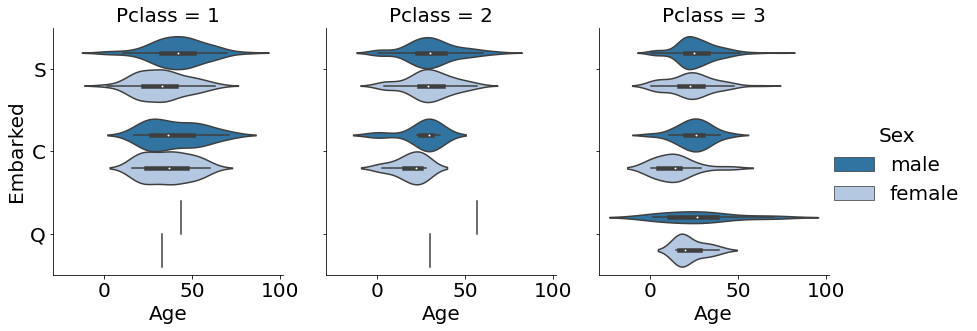

In [60]:
# Useful for:
# This is a normal barplot (we show count of each classes)
# But seabron makes it really easy to plot this effortlessly
# In this plot we add an additional filter to separate even more the data

# More info: 
# https://seaborn.pydata.org/tutorial/categorical.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/titanic/train.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
# plot the data using seaborn
fig = plt.figure(figsize = (12, 6))
ax = sns.catplot(x = "Age",
                 y = "Embarked",
                 col = "Pclass",
                 hue = "Sex",
                 data = df, 
                 kind = "violin",  
                 palette = 'tab20',  
                 aspect = .8
                );

<a id = "Plot31"></a>
# Plot 31: Waffle chart
[Go back to the Table of Contents](#table_of_contents)

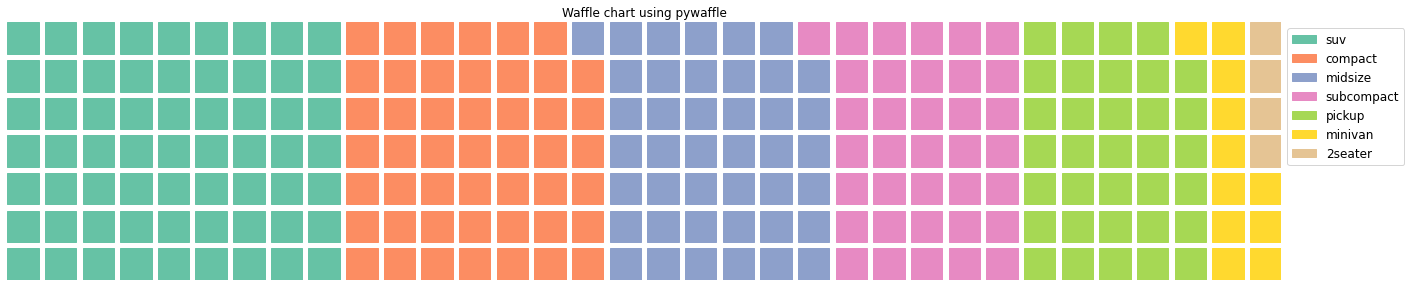

In [61]:
# Useful for:
# Waffle charts are very useful to show the composition of a certain column
# of different categories

# More info: 
# https://datavizproject.com/data-type/percentage-grid/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# create a dictionary of each class and their totals
values = {k:v for k,v in zip(df["class"].value_counts().index, df["class"].value_counts().values)}

# ----------------------------------------------------------------------------------------------------
# plot the data using pywaffle
plt.figure(
    FigureClass = Waffle,
    rows = 7,
    columns = 34,
    values = values,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1), "fontsize": "12"},
    figsize = (20, 7)
)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# set a title
plt.title("Waffle chart using pywaffle", fontsize = 12);

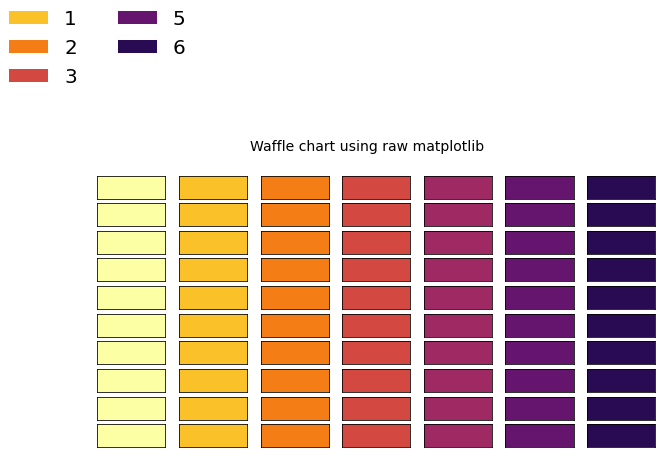

In [62]:
# Useful for:
# Waffle charts are very useful to show the composition of a certain column
# of different categories
# This plot tries to replicate a waffle chart using only matplotlib

# More info: 
# https://datavizproject.com/data-type/percentage-grid/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# we need this when we will create the axes
# and the colors for each column
rows = 10
columns = 7

ncats = len(df["class"].value_counts().index)
colors = [plt.cm.inferno_r(i/float(columns)) for i in range(columns)]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
# create 70 smaller axes to change their color in the next loop
axes = fig.subplots(nrows = rows,
                    ncols = columns)

# ----------------------------------------------------------------------------------------------------
# plot the data
# iterate over all rows and columns
# check the basic part of this kernel if you need help
for col in range(columns):
    for row in range(rows):
        # get every axes we created
        ax = axes[row, col]
        # get the corresponding color
        color = colors[col]
        # change the background color of each axes
        ax.set_facecolor(color)
        # get rid of the x and y ticks (no numbers on x and y axis)
        ax.set_xticks([])
        ax.set_yticks([])

# add a title to the FIGURE
# Note: that matplotlib always plots on the last axes
# if we do it by ax.set_title, we will add a title to the 70'th axes
# and we don't want that
fig.suptitle("Waffle chart using raw matplotlib", fontsize = 14)

# create a legend for each category
legend_elements = [Patch(facecolor = color, 
                         edgecolor = 'white', 
                         label = str(i)) for i, color in enumerate(colors)]

# add the lgend and the patch to the figure
fig.legend(handles = legend_elements, loc = 'lower left', bbox_to_anchor = (0.0, 1.01), ncol = 2, borderaxespad = 0, frameon = False);

<a id = "Plot32"></a>
# Plot 32: Pie chart
[Go back to the Table of Contents](#table_of_contents)

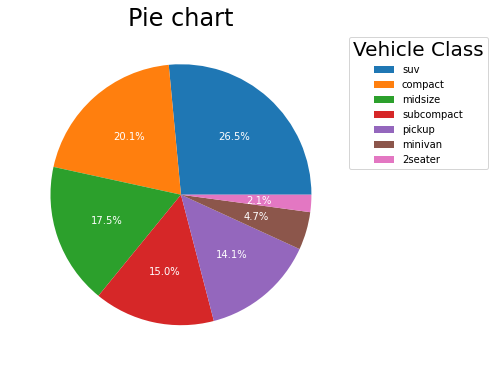

In [63]:
# Useful for:
# A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion

# More info: 
# https://en.wikipedia.org/wiki/Pie_chart

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# create a dictionary of classes and their totals
d = df["class"].value_counts().to_dict()

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (18, 6))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.pie(d.values(), # pass the values from our dictionary
       labels = d.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 10, 'color' : "white"} # change the font size and the color of the numbers inside the pie
      )

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the title
ax.set_title("Pie chart")

# set the legend and add a title to the legend
ax.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Vehicle Class");

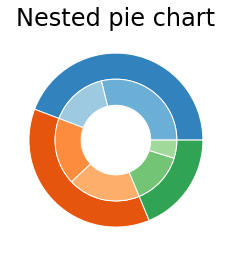

In [64]:
# Useful for:
# A pie chart (or a circle chart) is a circular statistical graphic, which is divided into slices to illustrate numerical proportion
# Nested pie chart goes one step further and separate every outer level of the pie chart
# with the composition on a lower level

# More info: 
# https://en.wikipedia.org/wiki/Pie_chart

# ----------------------------------------------------------------------------------------------------
# get the data
size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

# create the outer and inner colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig, ax = plt.subplots()

# ----------------------------------------------------------------------------------------------------
# plot the data
# outer level
ax.pie(vals.sum(axis = 1), # plot the total [60., 32.] = 92
       radius = 1, 
       colors = outer_colors,
       wedgeprops = dict(width = size, edgecolor = 'w'))

# inner level
ax.pie(vals.flatten(), # using flatten we plot 60, 32 separetly
       radius = 1 - size, 
       colors = inner_colors,
       wedgeprops = dict(width = size, edgecolor = 'w'))

# set the title for the plot
ax.set(aspect = "equal", title = 'Nested pie chart');

<a id = "Plot33"></a>
# Plot 33: Tree map
[Go back to the Table of Contents](#table_of_contents)

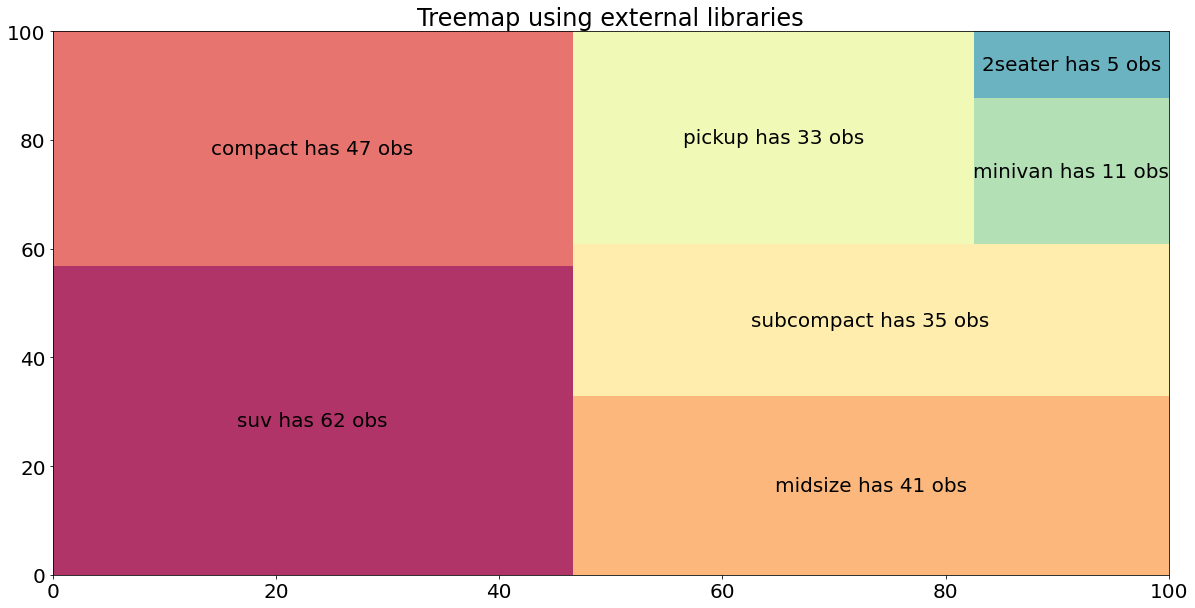

In [65]:
# Useful for:
# Treemap is very cool and can be used mane different contexts
# usually we want to show the composition of some totals by groups
# very often, smaller groups tend to be very small squares

# More info: 
# https://en.wikipedia.org/wiki/Treemapping

# ----------------------------------------------------------------------------------------------------
# get the data

PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# get the values
label_value = df["class"].value_counts().to_dict()

# create the labels using a list comprehesion
labels = ["{} has {} obs".format(class_, obs) for class_, obs in label_value.items()]

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (20, 10))

# ----------------------------------------------------------------------------------------------------
# plot the data using squarify
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add a title to the plot
plt.title("Treemap using external libraries");

<a id = "Plot34"></a>
# Plot 34: Bar chart
[Go back to the Table of Contents](#table_of_contents)

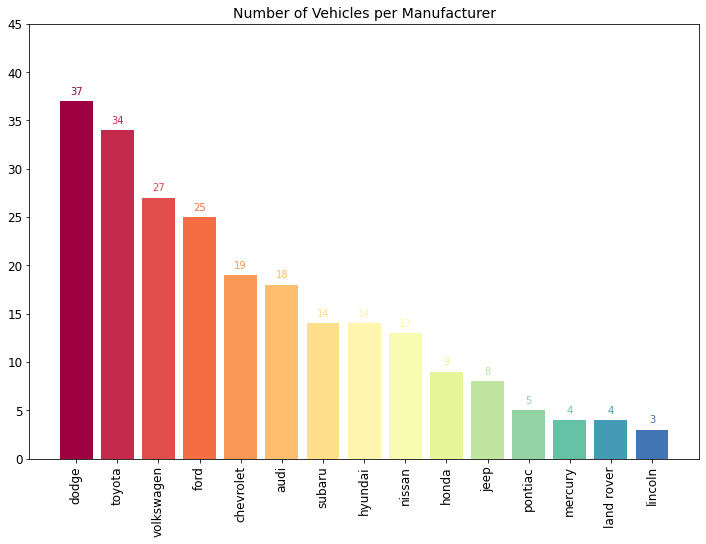

In [66]:
# Useful for:
# A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent

# More info: 
# https://en.wikipedia.org/wiki/Bar_chart

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mpg_ggplot2.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# get a dictionary with x and y from a dictionary
d = df["manufacturer"].value_counts().to_dict()

# create n colors based on the number of labels we have
colors = [plt.cm.Spectral(i/float(len(d.keys()))) for i in range(len(d.keys()))]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.bar(d.keys(), d.values(), color = colors)

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(d.items()):
    ax.text(k, # where to put the text on the x coordinates
            v + 1, # where to put the text on the y coordinates
            v, # value to text
            color = colors[i], # color corresponding to the bar
            fontsize = 10, # fontsize
            horizontalalignment = 'center', # center the text to be more pleasant
            verticalalignment = 'center'
           )

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the size of the x and y ticks
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# change the ylim
ax.set_ylim(0, 45)

# set a title for the plot
ax.set_title("Number of Vehicles per Manufacturer", fontsize = 14);

<a id = "Plot35"></a>
# Plot 35: Timeseries
[Go back to the Table of Contents](#table_of_contents)

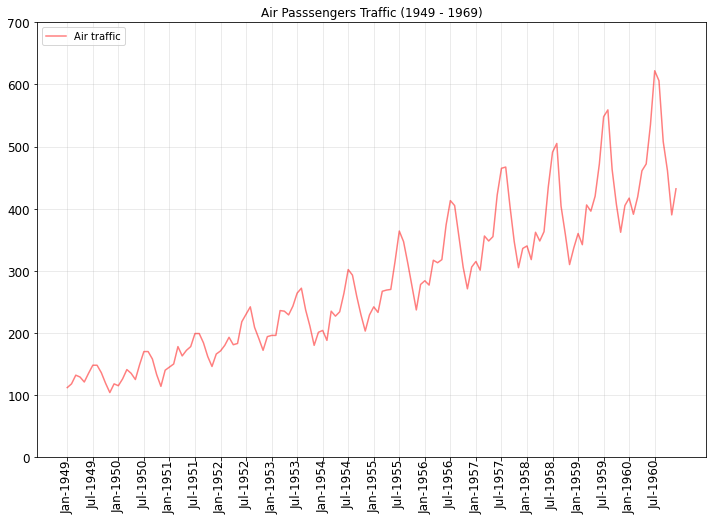

In [67]:
# Useful for:
# Timeseries is a special type of plots where the time component is present.

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/AirPassengers.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# helper function to transform and work with the time column
def create_date_tick(df):
    '''
    Converts dates from this format: Timestamp('1949-01-01 00:00:00')
    To this format: 'Jan-1949'
    '''
    df["date"] = pd.to_datetime(df["date"]) # convert to datetime
    df["month_name"] = df["date"].dt.month_name() # extracts month_name
    df["month_name"] = df["month_name"].apply(lambda x: x[:3]) # passes from January to Jan
    df["year"] = df["date"].dt.year # extracts year
    df["new_date"] = df["month_name"].astype(str) + "-" + df["year"].astype(str) # Concatenaes Jan and year --> Jan-1949

# create the time column and the xtickslabels column
create_date_tick(df)

# get the y values (the x is the index of the series)
y = df["value"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.plot(y, color = "red", alpha = .5, label = "Air traffic")

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the gridlines
ax.grid(alpha = .3)

# change the ylim
ax.set_ylim(0, 700)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["new_date"].tolist()[::6]

# set the xticks to be every 6'th entry
# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set the title and the legend of the plot
ax.set_title("Air Passsengers Traffic (1949 - 1969)", fontsize = 12)
ax.legend(loc = "upper left", fontsize = 10);

<a id = "Plot36"></a>
# Plot 36: Timeseries with peaks and troughs annotated
[Go back to the Table of Contents](#table_of_contents)

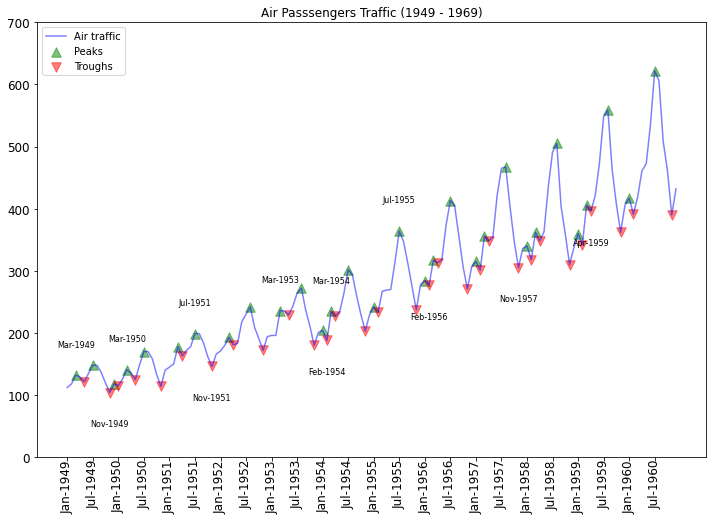

In [68]:
# Useful for:
# Timeseries is a special type of plots where the time component is present.
# This plot is a continuation of the previous one.
# Here we use scatter markers and text to annotate relevant events.
# In our case, the local maxima and minima

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/AirPassengers.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# helper function to transform and work with the time column
def create_date_tick(df):
    '''
    Converts dates from this format: Timestamp('1949-01-01 00:00:00')
    To this format: 'Jan-1949'
    '''
    df["date"] = pd.to_datetime(df["date"]) # convert to datetime
    df["month_name"] = df["date"].dt.month_name() # extracts month_name
    df["month_name"] = df["month_name"].apply(lambda x: x[:3]) # passes from January to Jan
    df["year"] = df["date"].dt.year # extracts year
    df["new_date"] = df["month_name"].astype(str) + "-" + df["year"].astype(str) # Concatenaes Jan and year --> Jan-1949

# create the time column and the xtickslabels column
create_date_tick(df)

# get the y values (the x is the index of the series)
y = df["value"]

# find local maximum INDEX using scipy library
max_peaks_index, _ = find_peaks(y, height=0) 

# find local minimum INDEX using numpy library
doublediff2 = np.diff(np.sign(np.diff(-1*y))) 
min_peaks_index = np.where(doublediff2 == -2)[0] + 1

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.plot(y, color = "blue", alpha = .5, label = "Air traffic")

# we have the index of max and min, so we must index the values in order to plot them
ax.scatter(x = y[max_peaks_index].index, y = y[max_peaks_index].values, marker = "^", s = 90, color = "green", alpha = .5, label = "Peaks")
ax.scatter(x = y[min_peaks_index].index, y = y[min_peaks_index].values, marker = "v", s = 90, color = "red", alpha = .5, label = "Troughs")

# iterate over some max and min in order to annotate the values
for max_annot, min_annot in zip(max_peaks_index[::3], min_peaks_index[1::5]):
    
    # extract the date to be plotted for max and min
    max_text = df.iloc[max_annot]["new_date"]
    min_text = df.iloc[min_annot]["new_date"]
    
    # add the text
    ax.text(df.index[max_annot], y[max_annot] + 50, s = max_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')
    ax.text(df.index[min_annot], y[min_annot] - 50, s = min_text, fontsize = 8, horizontalalignment = 'center', verticalalignment = 'center')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the ylim
ax.set_ylim(0, 700)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["new_date"].tolist()[::6]

# set the xticks to be every 6'th entry
# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the size of the font of the x and y axis
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set the title and the legend of the plot
ax.set_title("Air Passsengers Traffic (1949 - 1969)", fontsize = 12)
ax.legend(loc = "upper left", fontsize = 10);

<a id = "Plot37"></a>
# Plot 37: Autocorrelation (ACF) and partial autocorrelation (PACF) plot
[Go back to the Table of Contents](#table_of_contents)

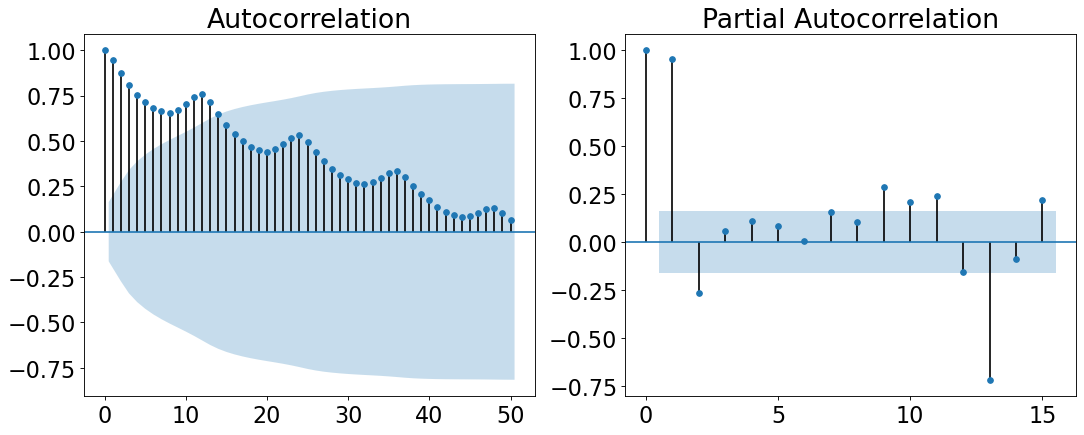

In [69]:
# Useful for:
# This plot are fundamental in timeseries analysis.
# Basically here we compare the a series again itself but with some lags.
# These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

# More info: 
# https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/AirPassengers.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (16,6), dpi = 80)

# ----------------------------------------------------------------------------------------------------
# plot the data using the built in plots from the stats module
plot_acf(df["value"], ax = ax1, lags = 50)
plot_pacf(df["value"], ax = ax2, lags = 15);

<a id = "Plot38"></a>
# Plot 38: Cross correlation plot
[Go back to the Table of Contents](#table_of_contents)

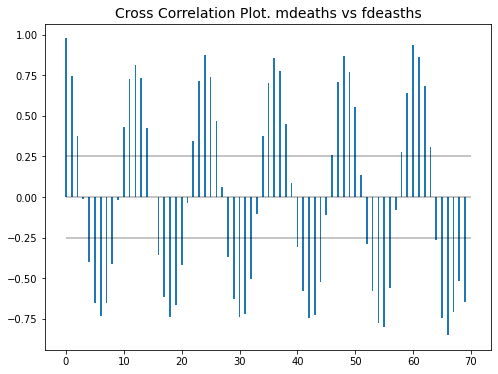

In [70]:
# Useful for:
# The cross correlation plot compares two series to see if there have a correlation.
# Remmember correlation not casuality

# More info: 
# https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9?gi=abf39ccba21b

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mortality.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# using this solution to calculate the cross correlation of 2 series
# https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas
def crosscorr(datax, datay, lag=0):
    """ 
    Lag-N cross correlation. 
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

# get the cross correlation
xcov_monthly = [crosscorr(df["mdeaths"], df["fdeaths"], lag = i) for i in range(70)]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
# notice that this is a regular barchart but the width is really small
ax.bar(x = np.arange(len(xcov_monthly)), height = xcov_monthly, width = .3)

# add some vertical lines that represent the significance level
# you have to calculate them apart
ax.hlines(0.25, 0, len(xcov_monthly), alpha = .3)
ax.hlines(0, 0, len(xcov_monthly), alpha = .3)
ax.hlines(-0.25, 0, len(xcov_monthly), alpha = .3)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the title
ax.set_title("Cross Correlation Plot. mdeaths vs fdeasths", fontsize = 14)

# change the x and y ticks size
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10);

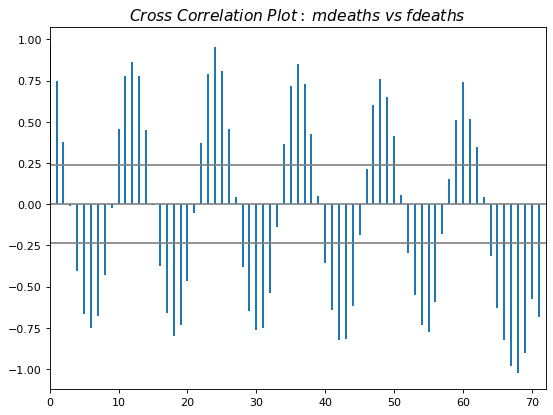

In [71]:
# Useful for:
# The cross correlation plot compares two series to see if there have a correlation.
# Remmember correlation not casuality.
# This solution shows how to calculate the significance level

# More info: 
# https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9?gi=abf39ccba21b

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mortality.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# separte x and y
x = df['mdeaths']
y = df['fdeaths']

# Compute Cross Correlations
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# Compute the Significance level
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (8,6), dpi = 80)
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
# notice that this is a regular barchart but the width is really small
ax.bar(x = np.arange(len(ccs)), height = ccs, width = .3)

# add some vertical lines that represent the significance level
# you have to calculate them apart
# we calculated it before
ax.hlines(0, xmin = 0, xmax = 100, color = 'gray')  # 0 axis
ax.hlines(conf_level, xmin = 0, xmax = 100, color='gray')
ax.hlines(-conf_level, xmin = 0, xmax = 100, color='gray')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the title
ax.set_title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize = 14)

# change the xlim of the plot
ax.set_xlim(0,len(ccs))

# change the x and y ticks size
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10);

<a id = "Plot39"></a>
# Plot 39: Timeseries decomposition plot
[Go back to the Table of Contents](#table_of_contents)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

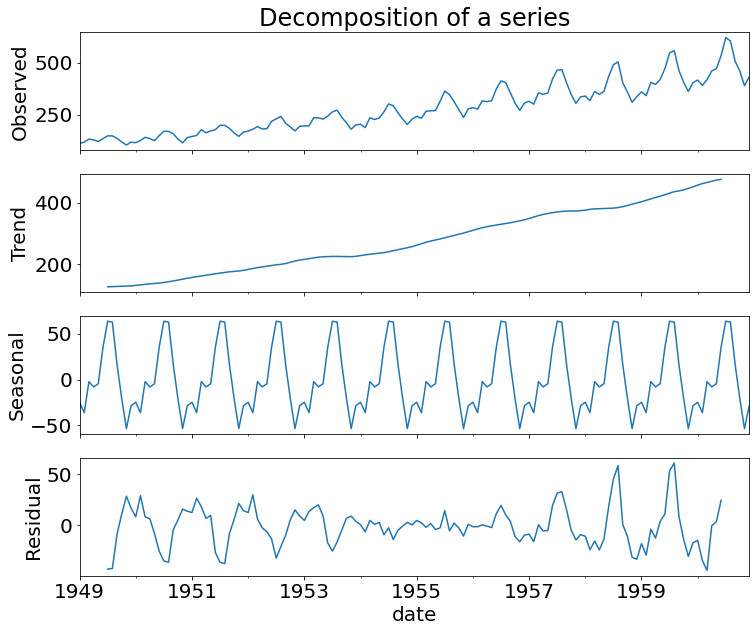

In [72]:
# Useful for:
# The theory behind timeseries, says that a series can be decomposed into 3 parts
# The trend
# The seasonal part
# And the residual
# This plots shows how to do this

# More info: 
# https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = '/kaggle/input/the-50-plot-challenge/AirPassengers.csv'
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# helper function to transform and work with the time column
def create_date_tick(df):
    '''
    Converts dates from this format: Timestamp('1949-01-01 00:00:00')
    To this format: 'Jan-1949'
    '''
    df["date"] = pd.to_datetime(df["date"]) # convert to datetime
    df.set_index("date", inplace = True)
    df["date"] = df.index
    df["month_name"] = df["date"].dt.month_name() # extracts month_name
    df["month_name"] = df["month_name"].apply(lambda x: x[:3]) # passes from January to Jan
    df["year"] = df["date"].dt.year # extracts year
    df["new_date"] = df["month_name"].astype(str) + "-" +df["year"].astype(str) # Concatenaes Jan and year --> Jan-1949

# create the time column and the xtickslabels column    
create_date_tick(df)

# decompose the series using stats module
# results in this case is a special class 
# whose attributes we can acess
result = seasonal_decompose(df["value"])

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
# make the subplots share teh x axis
fig, axes = plt.subplots(ncols = 1, nrows = 4, sharex = True, figsize = (12,10))

# ----------------------------------------------------------------------------------------------------
# plot the data
# using this cool thread:
# https://stackoverflow.com/questions/45184055/how-to-plot-multiple-seasonal-decompose-plots-in-one-figure
# This allows us to have more control over the plots

# plot the original data
result.observed.plot(ax = axes[0], legend = False)
axes[0].set_ylabel('Observed')
axes[0].set_title("Decomposition of a series")

# plot the trend
result.trend.plot(ax = axes[1], legend = False)
axes[1].set_ylabel('Trend')

# plot the seasonal part
result.seasonal.plot(ax = axes[2], legend = False)
axes[2].set_ylabel('Seasonal')

# plot the residual
result.resid.plot(ax = axes[3], legend = False)
axes[3].set_ylabel('Residual')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df["new_date"].tolist()[::6]

# set the xticks to be every 6'th entry
# every 6 months
ax.set_xticks(xtick_location)

# chage the label from '1949-01-01 00:00:00' to this 'Jan-1949'
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'});

<a id = "Plot40"></a>
# Plot 40: Multiple timeseries
[Go back to the Table of Contents](#table_of_contents)

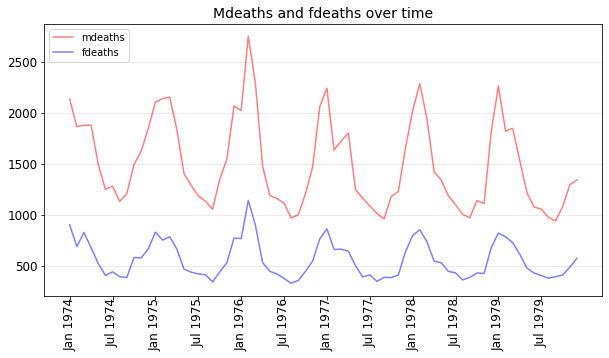

In [73]:
# Useful for:
# Multiple timeseries is a special case when we plot 2 series and see their performance over time

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mortality.csv"
df = pd.read_csv(PATH)

# set the date column to be the index
df.set_index("date", inplace = True)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.plot(df["mdeaths"], color = "red", alpha = .5, label = "mdeaths")
ax.plot(df["fdeaths"], color = "blue", alpha = .5, label = "fdeaths")

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::6]
xtick_labels = df.index.tolist()[::6]

# set the xticks to be every 6'th entry
# every 6 months
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation=90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'});

# change the x and y ticks to be smaller
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add legend, a title and grid to make it look nicer
ax.legend(loc = "upper left", fontsize = 10)
ax.set_title("Mdeaths and fdeaths over time", fontsize = 14)
ax.grid(axis = "y", alpha = .3)

<a id = "Plot41"></a>
# Plot 41: Plotting with different scales using secondary Y axis
[Go back to the Table of Contents](#table_of_contents)

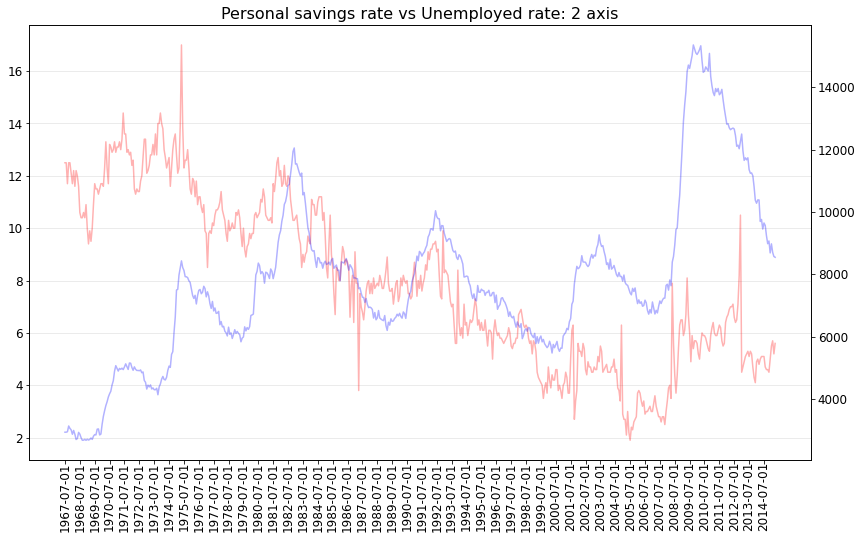

In [74]:
# Useful for:
# Multiple timeseries is a special case when we plot 2 series and see their performance over time
# However, here since the data is on a different scale, we will add a secondary y axis

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/economics.csv"
df = pd.read_csv(PATH)

# set the date column to be the index
df.set_index("date", inplace = True)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# get the x and y values
x_1 = df["psavert"]
x_2 = df["unemploy"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
# here is the main axis
ax.plot(x_1, color = "red", alpha = .3, label = "Personal savings rate")

# suing twinx we can create a secondary axis
ax2 = ax.twinx()
# plot the data on the secondary axis
ax2.plot(x_2, color = "blue", alpha = .3, label = "Unemployment rate")

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels (every 12 entry)
xtick_location = df.index.tolist()[::12]
xtick_labels = df.index.tolist()[::12]

# set the xticks to be every 12'th entry
# every 12 months
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation = 90, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'});

# change the x and y ticks to be smaller for the main axis and for the secondary axis
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax2.tick_params(axis = 'y', labelsize = 12)

# set a title and a grid
ax.set_title("Personal savings rate vs Unemployed rate: 2 axis", fontsize = 16)
ax.grid(axis = "y", alpha = .3)

<a id = "Plot42"></a>
# Plot 42: Timeseries with bands
[Go back to the Table of Contents](#table_of_contents)

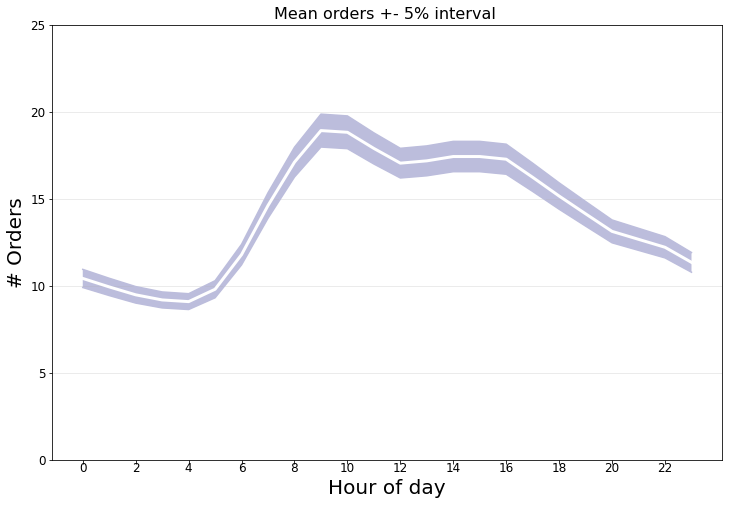

In [75]:
# Useful for:
# This is a regular timeseries plot, but we add some confidence level/bands to the main series
# We can add +- 5% values or we can compute the errors and add error bands

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/user_orders_hourofday.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# create a groupby df calculating the mean for each group
gb_df = df.groupby(["order_hour_of_day"])["quantity"].mean().to_frame()

# separete x and calculate the upper and lower bands
x = gb_df["quantity"]
x_lower = x*0.95
x_upper = x*1.05

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.plot(x, color = "white", lw = 3)
ax.plot(x_lower, color = "#bcbddc")
ax.plot(x_upper, color = "#bcbddc")

# fill the area between the 3 lines
ax.fill_between(x.index, x, x_lower, where = x > x_lower, facecolor='#bcbddc', interpolate = True)
ax.fill_between(x.index, x, x_upper, where = x_upper > x, facecolor='#bcbddc', interpolate = True)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the ylim
ax.set_ylim(0, 25)

# set the x and y labels
ax.set_xlabel("Hour of day")
ax.set_ylabel("# Orders")

# get the xticks and the xticks labels
xtick_location = gb_df.index.tolist()[::2]
xtick_labels = gb_df.index.tolist()[::2]

# set the xticks to be every 2'th entry
# every 2 months
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# change the x and y tick size
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# add a title and a gridline
ax.set_title("Mean orders +- 5% interval ", fontsize = 16)
ax.grid(axis = "y", alpha = .3)

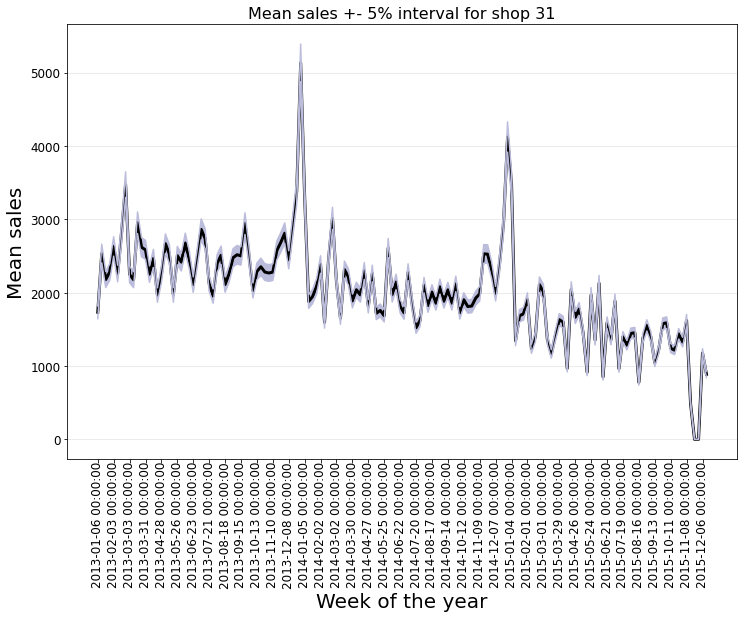

In [76]:
# Useful for:
# This is a regular timeseries plot, but we add some confidence level/bands to the main series
# We can add +- 5% values or we can compute the errors and add error bands
# This is a similar plot but for future sales competition dataset

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv"

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# a helper function that manipulates the df and returns weekly sales
# for shop 31
def create_df_future_sales(PATH):
    '''
    Creates the df from the future sales competition.
    Only for shop 31 and for educational purpose
    '''
    df = pd.read_csv(PATH)
    df = df[df["shop_id"] == 31][["item_cnt_day", "date"]]
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace = True)
    df = df.resample("W")["item_cnt_day"].sum().to_frame()
    
    return df

# get the needed df
df = create_df_future_sales(PATH)

# separete x and calculate the upper and lower bands
x = df["item_cnt_day"]
x_lower = x*0.95
x_upper = x*1.05

# ----------------------------------------------------------------------------------------------------
# instanciate the figure

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
ax.plot(x, color = "black", lw = 3)
ax.plot(x_lower, color = "#bcbddc")
ax.plot(x_upper, color = "#bcbddc")

# fill the area between the 3 lines
ax.fill_between(x.index, x, x_lower, where = x > x_lower, facecolor='#bcbddc', interpolate = True)
ax.fill_between(x.index, x, x_upper, where = x_upper > x, facecolor='#bcbddc', interpolate = True)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::4]
xtick_labels = df.index.tolist()[::4]

# set the xticks to be every 4'th entry
# every 4 week
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# change the size of the x and y ticks
ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.tick_params(axis = 'y', labelsize = 12)

# set the x and y label
ax.set_xlabel("Week of the year")
ax.set_ylabel("Mean sales")

# set the title and add a grid
ax.set_title("Mean sales +- 5% interval for shop 31", fontsize = 16)
ax.grid(axis = "y", alpha = .3)

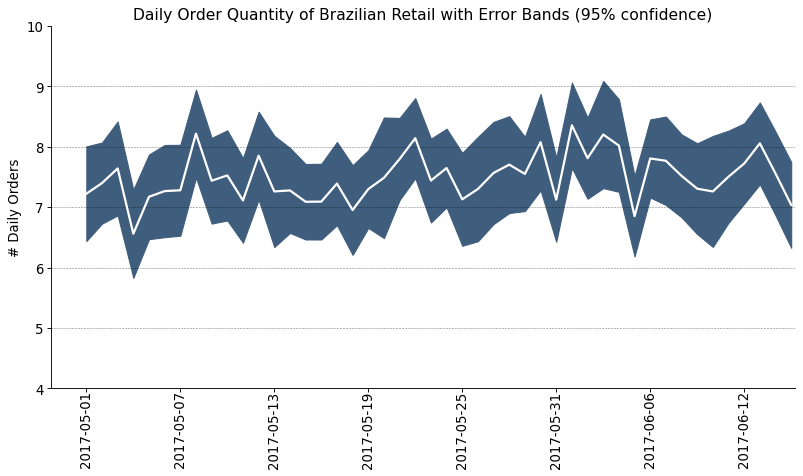

In [77]:
# Useful for:
# This is a regular timeseries plot, but we add some confidence level/bands to the main series
# We can add +- 5% values or we can compute the errors and add error bands
# In this plot we will calculate the error bands using stats module

# More info: 
# https://study.com/academy/lesson/time-series-plots-definition-features.html

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/orders_45d.csv"
df_raw = pd.read_csv(PATH, parse_dates = ['purchase_time', 'purchase_date'])

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# Prepare Data: Daily Mean and SE Bands
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# prepare the xticks in a specific format
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12,6), dpi = 80)
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.plot(x, df_mean, color = "white", lw = 2)
ax.fill_between(x, df_mean - df_se, df_mean + df_se, color = "#3F5D7D") 

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the spines to make it look cleaner
ax.spines["top"].set_alpha(0)
ax.spines["bottom"].set_alpha(1)
ax.spines["right"].set_alpha(0)
ax.spines["left"].set_alpha(1)

# get the xticks and the xticks labels
xtick_location = x[::6]
xtick_labels = [str(d) for d in x[::6]]

# set the xticks to be every 4'th entry
# every 4 week
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# add a title
ax.set_title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize = 14)

# change the x and y limit
s, e = ax.get_xlim()
ax.set_xlim(s, e-2)
ax.set_ylim(4, 10)

# set the y label for the plot
ax.set_ylabel("# Daily Orders", fontsize = 12) 

# change the size of the x and y ticks
ax.tick_params(axis = 'x', labelsize = 12, rotation = 90)
ax.tick_params(axis = 'y', labelsize = 12)

# add some horizontal lines to make the plot look nicer
for y in range(5, 10, 1):    
    ax.hlines(y, xmin = s, xmax = e, colors = 'black', alpha = 0.5, linestyles = "--", lw = 0.5)

<a id = "Plot43"></a>
# Plot 43: Stacked area chart
[Go back to the Table of Contents](#table_of_contents)

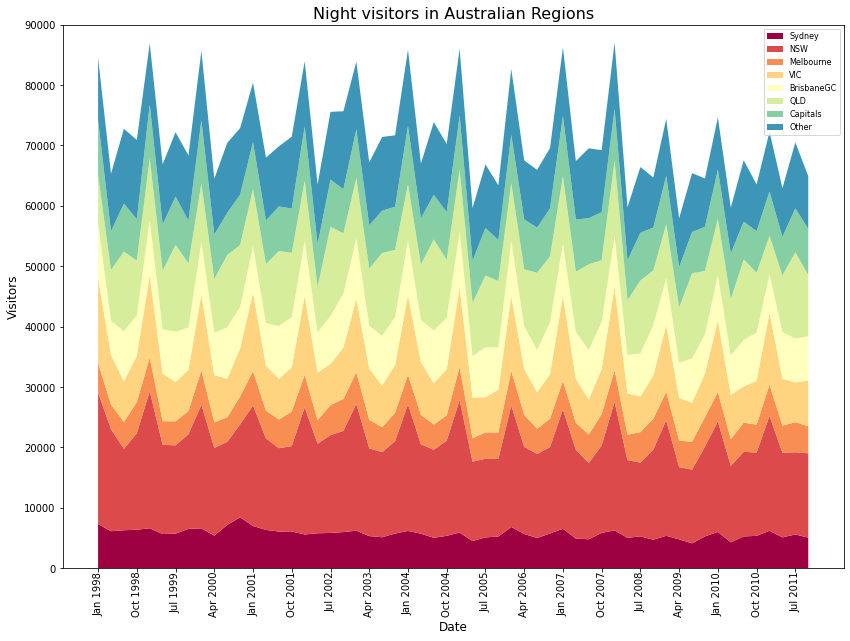

In [78]:
# Useful for:
# A stacked area chart is the extension of a basic area chart to display the evolution of the value of several groups on the same graphic. 
# The values of each group are displayed on top of each other. It allows to check on the same figure the evolution of both the total of a numeric variable, and the importance of each group. 
# If only the relative importance of each group interests you, you should probably draw a percent stacked area chart. 
# Note that this chart becomes hard to read if too many groups are displayed and if the patterns are really different between groups. In this case, think about using faceting instead.

# More info: 
# https://python-graph-gallery.com/stacked-area-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/nightvisitors.csv"
df = pd.read_csv(PATH)
# set the data as index of the df
df.set_index("yearmon", inplace = True)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# get the x and y 
x = df.index
y = [df[col].values for col in df.columns]

# get the name of each group for the labels
labels = df.columns

# prepare some colors for each group to be ploted
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (14, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.stackplot(x,y, labels = labels, colors = colors)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::3]
xtick_labels = df.index.tolist()[::3]

# set the xticks to be every 3'th entry
# every 3 entry
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, fontdict={'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# change the x and y ticks to smaller size
ax.tick_params(axis = 'x', labelsize = 10, rotation = 90)
ax.tick_params(axis = 'y', labelsize = 10)

# set the x and y label
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Visitors", fontsize = 12)

# change the ylim
ax.set_ylim(0, 90000)

# set a title and a legend
ax.set_title("Night visitors in Australian Regions", fontsize = 16)
ax.legend(fontsize = 8);

<a id = "Plot44"></a>
# Plot 44: Area chart Unstacked
[Go back to the Table of Contents](#table_of_contents)

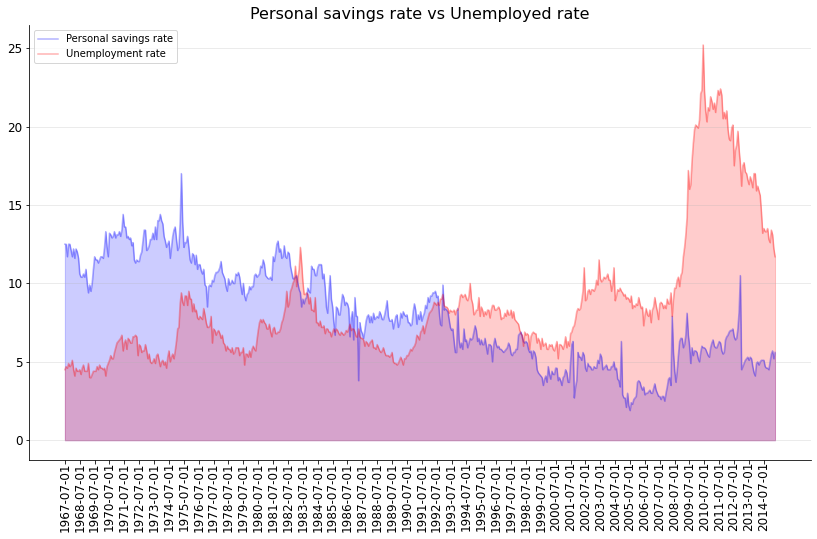

In [79]:
# Useful for:
# An area chart is really similar to a line chart, except that the area between the x axis and the line is filled in with color or shading.
# This draws the attention to the specific area.

# More info: 
# http://python-graph-gallery.com/area-plot/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/economics.csv"
df = pd.read_csv(PATH)

# set the date as the index of the df
df.set_index("date", inplace = True)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# get x and y
x = df["psavert"]
y = df["uempmed"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.plot(x, color = "blue", alpha = .3, label = "Personal savings rate")
ax.plot(y, color = "red", alpha = .3, label = "Unemployment rate")

# fill the areas between the plots and the x axis
# this can create overlapping areas between lines
ax.fill_between(x.index, 0, x, color = "blue", alpha = .2)
ax.fill_between(x.index, 0, y, color = "red", alpha = .2)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the title
ax.set_title("Personal savings rate vs Unemployed rate", fontsize = 16)

# get the xticks and the xticks labels
xtick_location = df.index.tolist()[::12]
xtick_labels = df.index.tolist()[::12]

# set the xticks to be every 3'th entry
# every 3 entry
ax.set_xticks(xtick_location)
ax.set_xticklabels(xtick_labels, rotation = 90, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# change the x and y ticks to smaller size
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# more the spines of the axes
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")

# set a legend and the y grid for the plot
ax.legend(fontsize = 10)
ax.grid(axis = "y", alpha = .3);

<a id = "Plot45"></a>
# Plot 45: Calendar heat map
[Go back to the Table of Contents](#table_of_contents)

/opt/conda/lib/python3.6/site-packages/calmap/__init__.py:221: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  for i in monthticks])


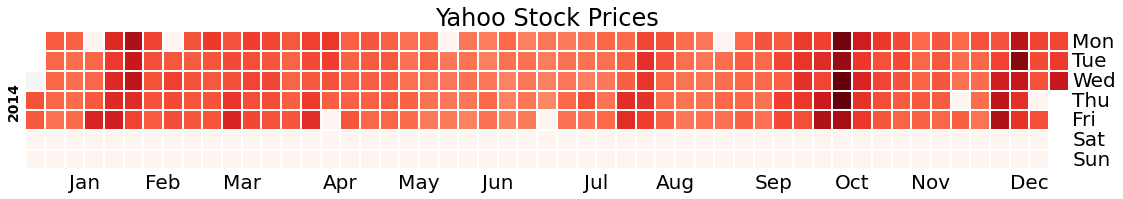

In [80]:
# Useful for:
# This is a very common plot you see everytime you connect to GitHub or Kaggle.
# Display the activity of a person for a certain period of time (usually a year)
# With a calendarmap

# More info: 
# https://pythonhosted.org/calmap/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/yahoo.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
df["date"] = pd.to_datetime(df["date"])
# the data must be a series with a datetime index
df.set_index("date", inplace = True)
x = df[df["year"] == 2014]["VIX.Close"]

# ----------------------------------------------------------------------------------------------------
# plot the data using calmap
calmap.calendarplot(x, fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'});

<a id = "Plot46"></a>
# Plot 46: Seasonal plot
[Go back to the Table of Contents](#table_of_contents)

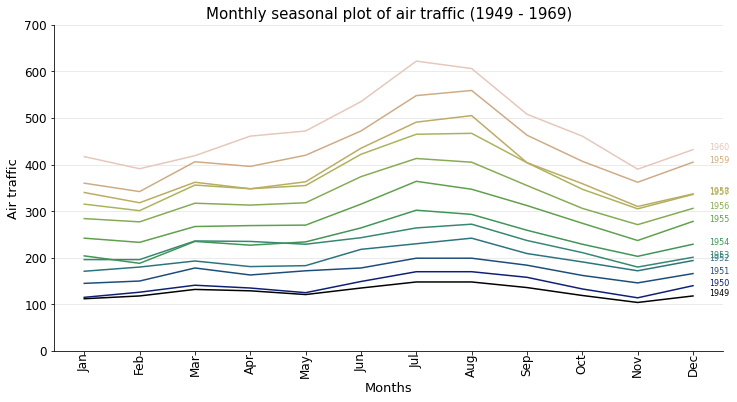

In [81]:
# Useful for:
# Seasonal plots are a regular lineplot but where we represent a lot of data/seasons.
# If the data is increasing year after year, we can see the evolution of the variable very nicely
# in a smaller plot

# More info: 
# https://python-graph-gallery.com/line-chart/

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/AirPassengers.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# first of all. 
# We have the following format of our df
#         date	value
# 0	1949-01-01	  112
# 1	1949-02-01	  118
# 2	1949-03-01	  132
# 3	1949-04-01	  129
# 4	1949-05-01	  121

# Basically a lot of rows with each year month data
# In order to plot the data into a seasonal chart, we need the data in this format
# where each column is the year
# index_ 1949	1950	1951	1952	1953	1954	1955	1956	1957	1958	1959	1960
# 1	      112	 115	 145	 171	 196	 204	 242	 284	 315	 340	 360	 417
# 2	      118	 126	 150	 180	 196	 188	 233	 277	 301	 318	 342	 391

# To do so, we must create a repeating index (12  months) for each year

# create a repeating index of [1, 2, 3, .. 12] months x 12 times (12 years)
index_ = [i for i in range(1, 13)]*12

# set the index into the dataframe
df["index_"] = index_

# create a dictionary with the months name (we will use this later to change the x axis)
months_ = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
d = {k:v for k,v in zip(index_[:12], months_)}

# convert to datetime the date column
df["date"] = pd.to_datetime(df["date"])

# extract the year using pandas datatime (dt)
df["year"] = df["date"].dt.year

# drop the date
df.drop("date", inplace = True, axis = 1)

# create a pivot table
# traspose the rows into columns, where the columns name are the year to plot
df = df.pivot(values = "value", columns = "year", index = "index_")

# create n colors for each season
colors = [plt.cm.gist_earth(i/float(len(df.columns))) for i in range(len(df.columns))]

# get the x to plot
# since we are extracting it from our new df
# it has 12 values, one for each month
x = df.index

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
# iterate over every column in the dataframe and plot the data
for col, color in zip(df.columns, colors):
    # get the y to plot
    y = df[col]
    
    # plot the data using seaborn
    ax.plot(x, y, label = col, c = color)
    
    # get the x and y to annotate
    x_annotate = x[-1]
    y_annotate = df.iloc[11][col]
    
    # annotate at the end of each line some values
    ax.text(x_annotate + 0.3, y_annotate, col, fontsize = 8, c = color)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set the x and y label
ax.set_xlabel("Months", fontsize = 13)
ax.set_ylabel("Air traffic", fontsize = 13)

# extract the x ticks location
xtick_location = df.index.tolist()

# using our dictionary, create a list of new xlabels
# basically instead of numbers, strings of months
months = [d[tick] for tick in xtick_location]

# change the x ticks with our new x ticks labels
ax.set_xticks(xtick_location)
ax.set_xticklabels(months, rotation = 90, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# change the y ticks font size
ax.tick_params(axis = 'y', labelsize = 12)

# change the y limit to make the plot a little bigger
ax.set_ylim(0, 700)

# get rid of spines from our plot
ax.spines["right"].set_color("None")
ax.spines["top"].set_color("None")

# add a grid to the plot
ax.grid(axis = "y", alpha = .3)

# set the title for the plot
ax.set_title("Monthly seasonal plot of air traffic (1949 - 1969)", fontsize = 15);

<a id = "Plot47"></a>
# Plot 47: Dendogram
[Go back to the Table of Contents](#table_of_contents)

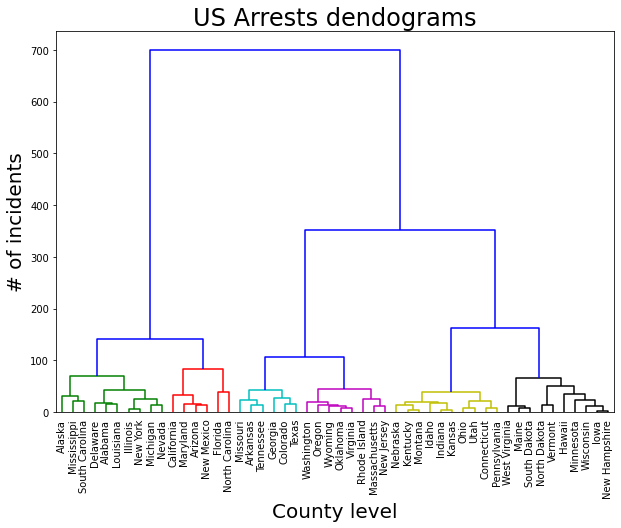

In [82]:
# Useful for:
# A dendrogram is a diagram representing a tree.
# It's very useful to represent hierarchy in a dataset

# More info: 
# https://en.wikipedia.org/wiki/Dendrogram

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/USArrests.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 7))

# ----------------------------------------------------------------------------------------------------
# plot the data using the scipy package
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method = 'ward'), 
                      labels = df["State"].values, 
                      color_threshold = 100)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# using plt.gca() we get the current figure
ax = plt.gca()

# set x and y label
ax.set_xlabel("County level")
ax.set_ylabel("# of incidents")

# change the x and y ticks size
ax.tick_params("x", labelsize = 10)
ax.tick_params("y", labelsize = 10)

# set a title
ax.set_title("US Arrests dendograms");

<a id = "Plot48"></a>
# Plot 48: Cluster plot
[Go back to the Table of Contents](#table_of_contents)

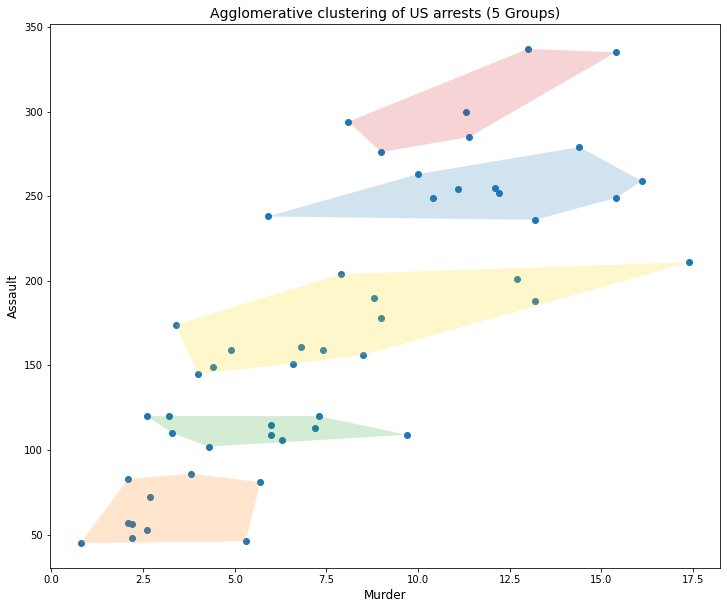

In [83]:
# Useful for:
# A cluster plots, help encircle data from a specific cluster, to help separte it more easily
# Before drawing the plot, you must first cluster the data into similar groups.

# More info: 
# https://en.wikipedia.org/wiki/Cluster_analysis

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/USArrests.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting

# get the x and y to plot
x = df["Murder"]
y = df["Assault"]

# first, create out cluster using the AgglomerativeClustering from sklearn
cluster = AgglomerativeClustering(n_clusters = 5, # notice that we specify the number of "optimal" clusters
                                  affinity = 'euclidean', # use the euclidean distance to compute similarity. The closer the better.
                                  linkage = 'ward'
                                 )  

# fit and predict the clusters based on this data
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  


# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.scatter(x, y)

# Encircle
def encircle(x,y, ax = None, **kw):
    '''
    Takes an axes and the x and y and draws a polygon on the axes.
    This code separates the differents clusters
    '''
    # get the axis if not passed
    if not ax: ax=plt.gca()
    
    # concatenate the x and y arrays
    p = np.c_[x,y]
    
    # to calculate the limits of the polygon
    hull = ConvexHull(p)
    
    # create a polygon from the hull vertices
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    
    # add the patch to the axes
    ax.add_patch(poly)

# use our cluster fitted before to draw the clusters borders like we did at the beginning of the kernel
# basically go over each cluster and add a patch to the axes
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec = "k", fc = "gold", alpha = 0.2, linewidth = 0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec = "k", fc = "tab:blue", alpha = 0.2, linewidth = 0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec = "k", fc = "tab:red", alpha = 0.2, linewidth = 0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec = "k", fc = "tab:green", alpha = 0.2, linewidth = 0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec = "k", fc = "tab:orange", alpha = 0.2, linewidth = 0)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the size of x and y ticks
ax.tick_params("x", labelsize = 10)
ax.tick_params("y", labelsize = 10)

# set an x and y label
ax.set_xlabel("Murder", fontsize = 12)
ax.set_ylabel("Assault", fontsize = 12)

# set a title for the plot
ax.set_title("Agglomerative clustering of US arrests (5 Groups)", fontsize = 14);

<a id = "Plot49"></a>
# Plot 49: Andrews curves
[Go back to the Table of Contents](#table_of_contents)

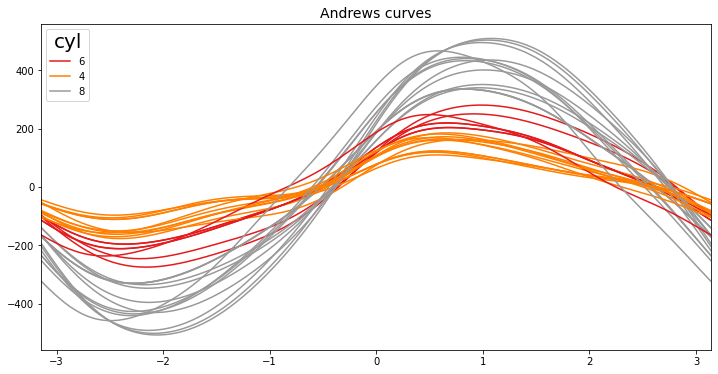

In [84]:
# Useful for:
# Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series.

# More info: 
# https://en.wikipedia.org/wiki/Andrews_plot

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/mtcars.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
# get the first 2 columns from our dataframe
X = df[list(df.columns)[:-2]]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure 
fig = plt.figure(figsize = (12, 6))

# ----------------------------------------------------------------------------------------------------
# plot the data using pandas capabilities
ax = andrews_curves(X, 'cyl', colormap = 'Set1')

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the x and y font size
ax.tick_params("x", labelsize = 10)
ax.tick_params("y", labelsize = 10)

# no gridlines
ax.grid(False)

# set legend and title to the plot
ax.legend(loc = "upper left", fontsize = 10,  title = "cyl")
ax.set_title("Andrews curves", fontsize = 14);

<a id = "Plot50"></a>
# Plot 50: Parallel Coordinates
[Go back to the Table of Contents](#table_of_contents)

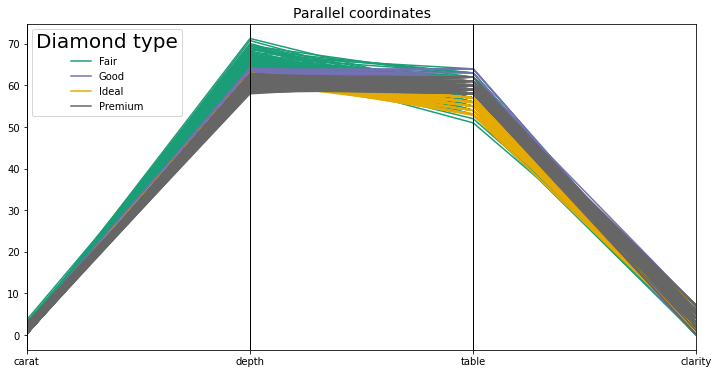

In [85]:
# Useful for:
# Parallel coordinates allows one to see clusters in data and to estimate other statistics visually. 
# Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. 
# One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

# More info: 
# https://en.wikipedia.org/wiki/Parallel_coordinates

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = "/kaggle/input/the-50-plot-challenge/diamonds_filter.csv"
df = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# get the data
fig = plt.figure(figsize = (12, 6))

# ----------------------------------------------------------------------------------------------------
# plot the data using pandas capabilities
ax = parallel_coordinates(df, 'cut', colormap = "Dark2")

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the x and y font size
ax.tick_params("x", labelsize = 10)
ax.tick_params("y", labelsize = 10)

# no gridlines
ax.grid(False)

# set legend and title to the plot
ax.legend(loc = "upper left", fontsize = 10,  title = "Diamond type")
ax.set_title("Parallel coordinates", fontsize = 14);

<a id = "Wrap_up"></a>
# Wrap up section
[Go back to the Table of Contents](#table_of_contents)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


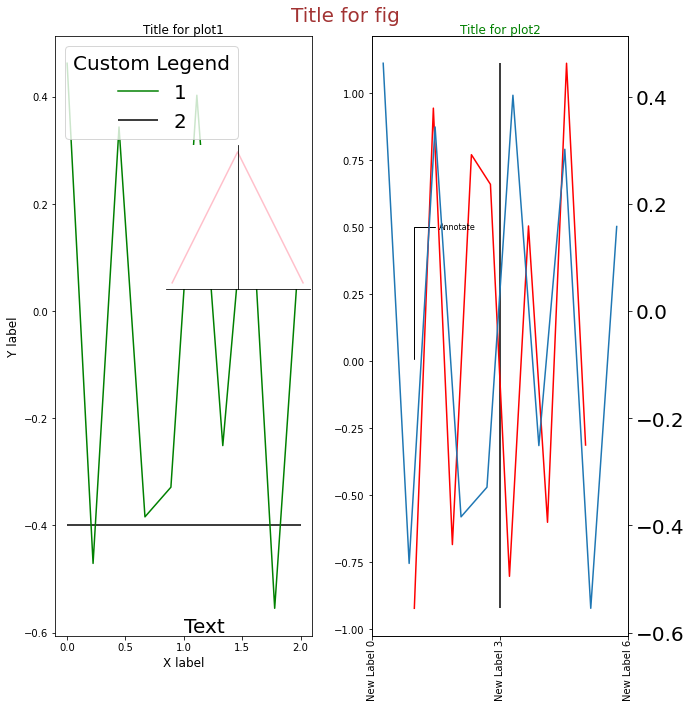

In [86]:
# If you have followed the kernel, you probably noticed that we pretty much have used the same tecniques.
# Let's wrap them all in this section

# HERE ARE THE MOST COMMON THINGS WE HAVE USED SO FAR

# ----------------------------------------------------------------------------------------------------
# instanciate the figure

# you create a basic figre like this
fig = plt.figure(figsize = (10, 10))
# ax = fig.add_subplot()

# if you need more plots you can use 
axes = fig.subplots(1,2)

# you can also use gridspec, which basically creates a matrix that you can index
# using familiar numpy slicing
# it more powerful but less common
# gs = fig.add_gridspec(5, 5)

# you need to add a new axes using add_subplot and specifiyng gridspec
# ax1 = fig.add_subplot(gs[:4, :-1])

# ----------------------------------------------------------------------------------------------------
# plot the data

# create some fake data
X = np.linspace(0,2,10)
Y = np.random.uniform(-.75,.5, 10)

# access the plots and draw some data
ax1 = axes[0]
ax1.plot(X, Y, color = "green")

# add a figre inside a figure
ax1_bis = fig.add_axes([0.25, 0.6, 0.2, 0.2])
ax1_bis.plot([1,2,1], color = "pink")

# get rid of x and y ticks
ax1_bis.set_xticks([])
ax1_bis.set_yticks([])

# get rid of spines
ax1_bis.spines["right"].set_color("None")
ax1_bis.spines["top"].set_color("None")

# change the spine position
ax1_bis.spines['left'].set_position(('data',1))

ax2 = axes[1]
ax2.plot(X, Y*-2, color = "red")

# create a secondary axis
ax2_bis = ax2.twinx()
ax2_bis.plot(X, Y)

# add a vertical line
ax2.vlines(1, min(Y*-2), max(Y*-2))

# add a horizontal line
ax1.hlines(-0.4, min(X), max(X))

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# change the ticks size
ax1.tick_params("x", labelsize = 10)
ax1.tick_params("y", labelsize = 10)

ax2.tick_params("x", labelsize = 10)
ax2.tick_params("y", labelsize = 10)

# get the xticks and the xticks labels
# you can use the X specified
# xtick_location = X[::3]

# or you can get the current x
xtick_location = ax2.get_xticks()[::3]

# using specified X
# xtick_labels = ["New Label {}".format(i) for i in range(len(X))][::3]

# using current x
xtick_labels = ["New Label {}".format(i) for i in range(len(ax2.get_xticks()))][::3]

# set the xticks to be every 3'th entry
# every 3 entry
ax2.set_xticks(xtick_location)
ax2.set_xticklabels(xtick_labels, rotation = 90, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline'})

# set x and y labels
ax1.set_xlabel("X label", fontsize = 12)
ax1.set_ylabel("Y label", fontsize = 12)

# set a title for plots
ax1.set_title("Title for plot1", fontsize = 12, color = 'black', ha = "center", va = "center")
ax2.set_title("Title for plot2", fontsize = 12, color = 'green', ha = "center", va = "center")

# annotate on plot
ax1.text(1, -0.6, "Text")

# annotate on plot
ax2.annotate('Annotate', 
             xy = (0, 0), 
             xytext = (0.5, 0.5), 
             xycoords = 'data', 
             fontsize = 8, 
             ha = 'center', 
             va = 'center',
             arrowprops = dict(arrowstyle = "-", connectionstyle = "angle,angleA=0,angleB=90,rad=0"), color = 'black'
            )

# add a custom legend
ax1.legend({class_:color for class_, color in zip([1, 2], ["black", "red"])}, loc = "upper left", title = "Custom Legend")

# set a title for figure and tight_layout()
fig.suptitle('Title for fig', fontsize = 20, color = 'darkred', alpha = .8, ha = "center", va = "center")
fig.tight_layout();

# Bonus section

<a id = "Bonus1"></a>
# Bonus1: how to make simple lines to connect points in matplotlib
[Go back to the Table of Contents](#table_of_contents)

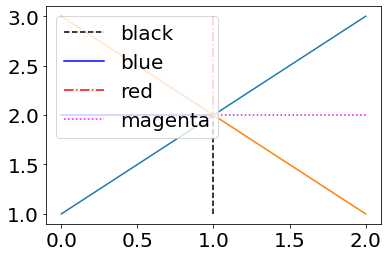

In [87]:
# this is a cheatsheet to plot lines in matplotlib
plt.plot([1, 1], [1, 2], linestyle="--", color = "black", label = "black")
plt.plot([0, 1], [2, 2], linestyle="-", color = "blue", label = "blue")
plt.plot([1, 1], [3, 2], linestyle="-.", color = "red", label = "red")
plt.plot([1, 2], [2, 2], linestyle=":", color = "magenta", label = "magenta")
plt.plot([1,2,3])
plt.plot([3, 2, 1])
plt.legend(loc = "upper left");

<a id = "Bonus2"></a>
# Bonus2: how to make create hyperlinks inside a document and change the color of a text
[Go back to the Table of Contents](#table_of_contents)

In [88]:
## this next line in markdown allows you to specify text in other colors
# ### <span style="color:green">* In matplotlib a basic plot starts with a figure and an axes.</span>

## this next lines allows you to put hyperlinks inside a notebook for fast reference.
## create a table of contents
# <a id = "table_of_contents"></a>
# Table of contents

# [Importing libraries and setting some helper functions](#Imports)

## code you have to put before a cell of code
# <a id = "Plot7"></a>
# # Plot 7: Marginal Boxplot
# [Go back to the Table of Contents](#table_of_contents)

<a id = "Bonus3"></a>
# Bonus3: Choropleth maps in Python
[Go back to the Table of Contents](#table_of_contents)

In [89]:
# Useful for:
# Choropleth are maps where data is plotten to facilitate the comparison between territories.

# More info: 
# https://en.wikipedia.org/wiki/Choropleth_map

##############################################################################
##############################################################################
# YOU CAN SKIP THIS CELL SINCE IT'S DEALING WITH THE SPECIFIC DATA I AM USING.
##############################################################################
##############################################################################

# paths for our data
PATH_DATA = '/kaggle/input/data-for-choropleth/serie_historica_acumulados.csv'
PATH_GEO_JSON = '/kaggle/input/spain-geojson/shapefiles_ccaa_espana.geojson'

# mapping dictionaries since our data comes from different sources and we need a unique key to join them
d_name = {
'AN':'Andalucía',
'AR':'Aragón',
'AS':'Asturias',
'IB':'Baleares',
'CN':'Canarias',
'CB':'Cantabria',
'CM':'Castilla La Mancha',
'CL':'Castilla y León',
'CT':'Cataluña',
'CE':'Ceuta',
'VC':'C. Valenciana',
'EX':'Extremadura',
'GA':'Galicia',
'MD':'Madrid',
'ML':'Melilla',
'MC':'Murcia',
'NC':'Navarra',
'PV':'País Vasco',
'RI':'La Rioja'
}

# mapping dictionaries since our data comes from different sources and we need a unique key to join them
d_ccaa = {
'Andalucía': 'Andalucía',
'Aragón': 'Aragón',
'Asturias': 'Principado de Asturias',
'Baleares': 'Islas Baleares',
'Canarias': 'Islas Canarias',
'Cantabria':'Cantabria',
'Castilla La Mancha': 'Castilla-La Mancha',
'Castilla y León': 'Castilla y León',
'Cataluña': 'Cataluña',
'Ceuta': 'Ceuta y Melilla',
'C. Valenciana': 'Comunidad Valenciana',
'Extremadura': 'Extremadura',
'Galicia': 'Galicia',
'Madrid': 'Comunidad de Madrid',
'Melilla': 'Ceuta y Melilla',
'Murcia': 'Región de Murcia',
'Navarra': 'Comunidad Foral de Navarra',
'País Vasco': 'País Vasco',
'La Rioja': 'La Rioja'
}

# mapping dictionaries since our data comes from different sources and we need a unique key to join them
d_ccaa_id = {
'Andalucía': "1",
'Aragón' : "2",
'Principado de Asturias': "3",
'Islas Baleares': "4",
'Islas Canarias': "5",
'Cantabria': "6",
'Castilla-La Mancha': "7",
'Castilla y León': "8",
'Cataluña': "9",
'Ceuta y Melilla': "10",
'Comunidad Valenciana': "11",
'Extremadura': "12",
'Galicia': "13",
'Comunidad de Madrid' : "14",
'Ceuta y Melilla': "15",
'Región de Murcia': "16",
'Comunidad Foral de Navarra': "17",
'País Vasco': "18",
'La Rioja': "19"
}

# helper function to clean date columns
# specific to the problem I have encountered while working with
# the data
def correct_date(date_str):
    '''
    Helper function to manipulate and correct the date data.
    Basically it checks the data format and concatenate a 0 before the day or month
    to make all the dates homogeneous.
    '''
    list_dates = date_str.split("/")
    day = list_dates[0]
    month = list_dates[1]
    year = list_dates[2]
    
    if len(day) == 1:
        day = "0" + day
    if len(month) == 1:
        month = "0" + month
        
    return "/".join([day, month, year])

In [90]:
# ----------------------------------------------------------------------------------------------------
# get the data and
# prepare the data for plotting
# read the data. I am using latin - 1 encoding since it's dealing with spanish regions and otherwise it crashes
df = pd.read_csv(PATH_DATA, encoding = 'latin-1')

# manipulate and clean the data
df.fillna(0, inplace = True)

# map all the regions to a common id
df["CCAA"] = df["CCAA"].map(d_name)
df["CCAA_for_Folium"] = df["CCAA"].map(d_ccaa)
df["id"] = df["CCAA_for_Folium"].map(d_ccaa_id)

# rename the columns for english readers
df.rename(columns = {"FECHA":"DATE",
                    "CASOS":"TOTAL_INFECTED",
                    "Hospitalizados":"REQUIERED_HOSPITALIZATION",
                    "UCI":"REQUIERED_ADVANCED_CARE",
                    "Fallecidos":"TOTAL_DEATHS",
                    "Recuperados":"CURED"}, inplace = True)

# dropping text at the bottom of the csv file with explanations
df.dropna(inplace = True, axis = "rows") 


df["NEW_DATE"] = df["DATE"].apply(correct_date)
df["DATE"] = pd.to_datetime(df["NEW_DATE"], format='%d/%m/%Y')

# this line converts this type of dates 2020-02-20
# to this 1582156800
# I will be using this column in the next TimeSliderChoropleth map
# It's the format that Folium understands
df["DATE_for_Folium"] = (df["DATE"].astype(int)// 10**9).astype('U10')

# select the needed columns
df = df[["id", "CCAA", "CCAA_for_Folium", "DATE", "DATE_for_Folium", "TOTAL_INFECTED", "REQUIERED_HOSPITALIZATION", "REQUIERED_ADVANCED_CARE", "TOTAL_DEATHS", "CURED"]]

df.head()

FileNotFoundError: [Errno 2] File b'/kaggle/input/data-for-choropleth/serie_historica_acumulados.csv' does not exist: b'/kaggle/input/data-for-choropleth/serie_historica_acumulados.csv'

In [91]:
# ----------------------------------------------------------------------------------------------------
# get the data and
# prepare the data for plotting
# here I am reading a geojson file that contains the shape of the regions to be plotted.
# I am using the geopandas since it's really easy to manipulate the data with it

# read the file
gdf = geopandas.read_file(PATH_GEO_JSON)

# create a numerical id for each ccaa
gdf["id"] = gdf["name_1"].map(d_ccaa_id) 

# extract the id and the geometry (coordinates of each ccaa)
gdf = gdf[["id", "shape_leng","shape_area","geometry"]] 

# I simplify the geometry. You lose a little bit the original shape of the regios
# But the plots renders a lot faster
gdf["geometry"] = gdf["geometry"].simplify(0.1, preserve_topology = False)

gdf.head()

id  shape_leng  shape_area  \
0  1   26.409069    8.916415   
1  2   15.095307    5.150835   
2  6    9.085137    0.588004   
3  8   28.330904   10.200456   
4  7   23.325765    8.330905   

                                            geometry  
0  POLYGON ((-6.97403 37.29625, -6.94847 37.16375...  
1  POLYGON ((-0.74582 42.92190, -0.01455 42.68477...  
2  POLYGON ((-3.58542 43.51486, -3.15148 43.30683...  
3  POLYGON ((-4.84928 43.17701, -3.97881 42.75806...  
4  POLYGON ((-2.90659 41.32764, -2.41884 41.05772...

In [92]:
##############################################################################
##############################################################################
# Okay. So basically the previous 3 cells where cleaning and preparing the
# data to be plotted. This might not be your case, and maybe you already
# have all your data nice and clean. That's why I said you can skip the 
# previous cells.

# So far we have 2 dataframes:
# df: with the data we are interested to be plotted (for example: TOTAL_INFECTED)
# gdf: that contains the shape of the regions we want to plot (geometry)

# EXTREMELY IMPORTANT:
# If you data is separated in 2 df like in this case.
# We are going the connect the data to the shape by the id column.

# PLEASE MAKE SURE: that it's a numeric string column ('1' instead of 1), with the columm 'id' and that
# the regions maps correctly between the dataframes.
# I have had some issues when it's numeric.
# You can technically pass a string but it should not contain any spaces.
# Comunidad de Madrid should be Comunidad_de_Madrid
# But I really suggest to use numbers formatted as strings as id.
##############################################################################
##############################################################################

In [93]:
# ----------------------------------------------------------------------------------------------------
# instanciate the figure
m = folium.Map(location = (40, 0), zoom_start = 5.5)

# ----------------------------------------------------------------------------------------------------
# plot the data

folium.Choropleth(
    geo_data = gdf, # you pass the geopandas
    name = 'choropleth',# type of plot
    data = df[df["DATE"] == max(df["DATE"])], # data to be plotted. In this case, the last available data
    columns = ['id', 'TOTAL_INFECTED'], # you pass the id column from the df and the data Folium should use to plot
    key_on = 'feature.properties.id', # this line means, that folium will connect the data from gdf to df by the column id.
    fill_color = 'RdPu',# colors
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Total infected cases in Spain by region' # legend
).add_to(m)

# renders the map
m

KeyError: 'DATE'

<a id = "Bonus4"></a>
# Bonus4: TimeSliderChoropleth maps in Python
[Go back to the Table of Contents](#table_of_contents)

In [94]:
##############################################################################
##############################################################################
# I have not found a way to render directly data into the TimeSliderChoropleth
# I know you can do it directly in Plotly.
# But if you use Folium, you must pass colors that represents the actual data
# at a given time.
##############################################################################
##############################################################################

# this function creates the colors based on the values.
# It basically maps the bin the value is in to a color
# The darker the bigger the value is.

def get_hex_colors_2(value, cats):
    '''
    Color paletter used from this website:
    
    https://colorbrewer2.org/#type=sequential&scheme=Reds&n=9
    
    The color selection will be based on the percentile each value is in.
    '''
    if value == 0:
        return "#FFFFFF"
    elif value in cats[0]:
        return "#fff5f0"
    elif value in cats[1]:
        return "#fee0d2"
    elif value in cats[2]:
        return "#fcbba1"
    elif value in cats[3]:
        return "#fc9272"
    elif value in cats[4]:
        return "#fb6a4a"
    elif value in cats[5]:
        return "#ef3b2c"
    elif value in cats[6]:
        return "#cb181d"
    elif value in cats[7]:
        return "#a50f15"
    elif value in cats[8]:
        return "#67000d"
    else:
        return "#000000"


# ----------------------------------------------------------------------------------------------------
# select the column to be plotted
data_to_color = "TOTAL_INFECTED"

# using pandas qcut, split the data into 10 bins
cats, bins =  pd.qcut(df[data_to_color].unique()[np.argsort(df[data_to_color].unique())], q = 9, retbins = True)

# get unique categories
cats = cats.unique()

# ----------------------------------------------------------------------------------------------------
# value we will iterate in order to create the styledict
ccaas = list(df["id"].unique())
dates = list(df["DATE_for_Folium"].unique())

# create the color dict and color column
# we create a colum in the df so that we can iterate and create the styledict
df["COLORS"] = df[data_to_color].apply(get_hex_colors_2, 
                                       args = [cats] # this way we can pass aditional argument when using apply
                                      ) 

# creates the styledict for the map
styledict = {}

##############################################################################
##############################################################################
# TimeSliderChoropleth expects  as an argument a styledict like this
# Where 1: is the id of the region to be plotted
# 1582156800: Is a timestamp that Folium understands
# and for each timestamp we have the color to be rendered
##############################################################################
##############################################################################
'''
{'1': {'1582156800': {'color': '#FFFFFF', 'opacity': 0.6},
  '1582243200': {'color': '#FFFFFF', 'opacity': 0.6},
  '1582329600': {'color': '#FFFFFF', 'opacity': 0.6},
'''

# iterate the populate the styledict
# for each region
for ccaa in ccaas:
    # create a string id
    # and for each available data, get the corresponding color
    styledict[str(ccaa)] = {date: {'color': df[(df["id"] == ccaa) & (df["DATE_for_Folium"] == date)]["COLORS"].values[0],
                                   'opacity': 0.6} for date in dates}

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
m = folium.Map(location=(40, 0), tiles='OpenStreetMap', zoom_start=5.5)

# ----------------------------------------------------------------------------------------------------
# plot the data
g = TimeSliderChoropleth(
    gdf.set_index("id").to_json(), # get's the coordinates for each id. Notice that we directly pass the gdf, but before that we set_index to be the id
    styledict = styledict # styledict contains for each id the timestamp and the color to plot.
)

# renders the map
m.add_child(g)

# ----------------------------------------------------------------------------------------------------
# Let's create a legend for folium
# https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#FFFFFF;opacity:0.6;'></span>No cases</li>
    <li><span style='background:#fff5f0;opacity:0.6;'></span>1 Quantile</li>
    <li><span style='background:#fee0d2;opacity:0.6;'></span>2 Quantile</li>
    <li><span style='background:#fcbba1;opacity:0.6;'></span>3 Quantile</li>
    <li><span style='background:#fc9272;opacity:0.6;'></span>4 Quantile</li>
    <li><span style='background:#fb6a4a;opacity:0.6;'></span>5 Quantile</li>
    <li><span style='background:#ef3b2c;opacity:0.6;'></span>6 Quantile</li>
    <li><span style='background:#cb181d;opacity:0.6;'></span>7 Quantile</li>
    <li><span style='background:#a50f15;opacity:0.6;'></span>8 Quantile</li>
    <li><span style='background:#67000d;opacity:0.6;'></span>9 Quantile</li>
    <li><span style='background:#000000;opacity:0.6;'></span>Other</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

# create a new MacroElement
macro = MacroElement()

# add the template to the macro
macro._template = Template(template)

# Ad the macro element to the map
m.get_root().add_child(macro)

KeyError: 'TOTAL_INFECTED'

<a id = "Bonus5"></a>
# Bonus5: 10 simple rules for better plotting
[Go back to the Table of Contents](#table_of_contents)

This is based on the article I found by these authors: Nicolas P. Rougier, Michael Droettboom, Philip E. Bourne

https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833

I thought it would be cool the share what professional thing about good plotting and how to improve it.

* Rule 1: Know Your Audience.
> You plot has to be designed with your audience in mind. It's not the same to communicate with professional scientist, upper managment or with general public.
> Remmember that when you are thinking about the plot.
* Rule 2: Identify Your Message
> Your figure must containg a message in order to be succeful. Take your time to think about the message you want to send, and once it's clear for you
> starts developing the figure.
* Rule 3: Adapt the Figure to the Support Medium
> This is a more practical rule. Know where your figures will be presented and adapt the figure accordingly.
> It's not the same if the figure will be in a powerpoing, journal or an email.
> If it's part of a bigger presentatio, make the lines bolder, the plot simpler so that the viewer can instantly
> understand it.
* Rule 4: Captions Are Not Optional
> Provide additional information or data for facilitate the comprehension of the plot.
> In a bar chart, if it's relevant, add the numbers to facilitate the comparison.
> If needed, add an example about how to read the plot.
* Rule 5: Do Not Trust the Defaults
> The defaults of any plotting library are good enough for any plot but they are best for none.
> Adjust the color palletes, the fontsize, title, spines, axies and so on for the figure.
> To make it more readable and more nicer to look at.
* Rule 6: Use Color Effectively
> We have associated feelings with specific colors so use them accordingly. There are 3 colorsmaps, use the most relevant for your data:
> 1. Sequential: one variation of a unique color, used for quantitative data varying from low to high.
> 2. Diverging: variation from one color to another, used to highlight deviation from a median value.
> 2. Qualitative: rapid variation of colors, used mainly for discrete or categorical data.
* Rule 7: Do Not Mislead the Reader
> Try to show the data as objectively as possible. Some tools are very bad by nature: like pie charts or 3D charts when comparing quantities.
> As a rule of thumb, make sure to always use the simplest type of plots that can convey your message and make sure to use labels, ticks, title, and the full range of values when relevant.
* Rule 8: Avoid “Chartjunk”
> Chartjunk refers to all the unnecessary or confusing visual elements found in a figure that do not improve the message (in the best case) or add confusion (in the worst case). 
> For example, chartjunk may include the use of too many colors, too many labels, gratuitously colored backgrounds, useless grid lines, etc.
* Rule 9: Message Trumps Beauty
> In science, message and readability of the figure is the most important aspect while beauty is only an option.
* Rule 10: Get the Right Tool
> There are a lot of libraries that you can use to make plots and figures. You have plenty of libraries in Python, R, Javascript, Matlab, Excel, Tableau and others.
> Use the right tool for each plot.
> For example: in our Choropleth map, we could have used the Matplotlib version, however using Folium is a better choice because it makes it more easy.

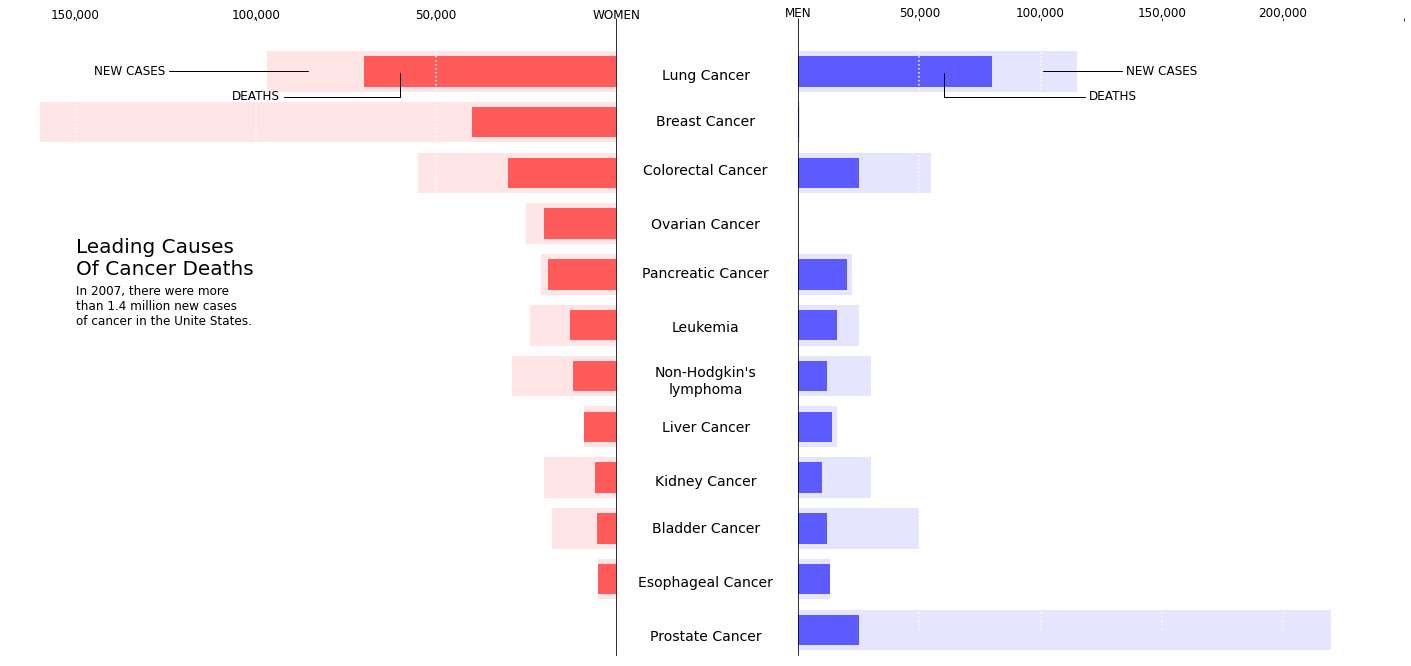

In [95]:
# In this code we will reproduce using our knowledge the following figure from N. Rougier GitHub.
# It has to deal with the rule number 1, know you audience
# https://github.com/rougier/ten-rules/blob/master/figure-1.py

# ----------------------------------------------------------------------------------------------------
# get the data
diseases   = ["Kidney Cancer", "Bladder Cancer", "Esophageal Cancer", "Ovarian Cancer", "Liver Cancer", "Non-Hodgkin's\nlymphoma",
              "Leukemia", "Prostate Cancer", "Pancreatic Cancer", "Breast Cancer", "Colorectal Cancer", "Lung Cancer"]

men_deaths = [10000, 12000, 13000, 0, 14000, 12000, 16000, 25000, 20000, 500, 25000, 80000]

men_cases = [30000, 50000, 13000, 0, 16000, 30000, 25000, 220000, 22000, 600, 55000, 115000]

women_deaths = [6000, 5500, 5000, 20000, 9000, 12000, 13000, 0, 19000, 40000, 30000, 70000]

women_cases = [20000, 18000, 5000, 25000, 9000, 29000, 24000, 0, 21000, 160000, 55000, 97000]

# generate a df from the data
df = pd.DataFrame([diseases, men_deaths, men_cases, women_deaths, women_cases], ["diseases", "men_deaths", "men_cases", "women_deaths", "women_cases"]).T
df.sort_values("women_deaths", ascending = True, inplace = True)

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (20, 10))
axes = fig.subplots(1, 2)

# ----------------------------------------------------------------------------------------------------
# plot the data

# for women cases, left plot
# access the plot
ax1 = axes[0]

# change the x and y limit
ax1.set_ylim(-.5, len(diseases))

# create a secondary axis
ax1_bis = ax1.twiny()
ax1_bis.invert_xaxis()  # labels read top-to-bottom

# plot a bar chart with the greater values
ax1_bis.barh(y = df["diseases"], 
         width = df["women_cases"],
         color = "red", 
         alpha = .1)

# plot a bar chart with the smaller values
# make the height a little smaller to fit inside the bigger one
ax1_bis.barh(y = df["diseases"], 
         width = df["women_deaths"],
         height = 0.6,
         color = "red", 
         alpha = 0.6)

# manipulate the spines of the plot to make it a little nicer
ax1.spines["top"].set_color("None")
ax1.spines["bottom"].set_color("None")
ax1.spines["left"].set_color("None")
ax1.spines["right"].set_color("None")

# manipulate the spines of the plot to make it a little nicer
ax1_bis.spines["top"].set_color("None")
ax1_bis.spines["bottom"].set_color("None")
ax1_bis.spines["left"].set_color("None")
ax1_bis.spines["right"].set_color("black")

# add vertical lines
ax1_bis.vlines(50_000, 0, len(diseases), color = "white", linestyle = "dotted")
ax1_bis.vlines(100_000, 0, len(diseases), color = "white", linestyle = "dotted")
ax1_bis.vlines(150_000, 0, len(diseases), color = "white", linestyle = "dotted")

# set for the main plot the x and y labels to none
ax1.set_yticks([])
ax1.set_xticks([])

# change the x ticks labels for the twinx acess
x_ticks = ax1_bis.get_xticks()
x_ticks[::2]
x_ticks_labels = ["WOMEN", "50,000", "100,000", "150,000"]

# change the x ticks with our new x ticks labels
ax1_bis.set_xticks(x_ticks[::2])
ax1_bis.set_xticklabels(x_ticks_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center_baseline', "fontsize":"12"})

# add text to the left plot
ax1_bis.text(150_000, 7, "Leading Causes\nOf Cancer Deaths", horizontalalignment = 'left', verticalalignment = 'baseline', fontdict = {'size':20})
ax1_bis.text(150_000, 6, "In 2007, there were more\nthan 1.4 million new cases\nof cancer in the Unite States.", horizontalalignment = 'left', verticalalignment = 'baseline', fontdict = {'size':12})

# annotate text
ax1_bis.annotate('NEW CASES', 
                 xy = (85000, 11), 
                 xytext = (135000, 11),
                 xycoords = 'data', 
                 fontsize = 12, 
                 ha = 'center', 
                 va = 'center',
                 arrowprops = dict(arrowstyle = "-", connectionstyle = "angle,angleA=0,angleB=90,rad=0"), color = 'black')

# annotate text
ax1_bis.annotate('DEATHS', 
                 xy = (60000, 11), 
                 xytext = (100000, 10.5), 
                 xycoords = 'data', 
                 fontsize = 12, 
                 ha = 'center', 
                 va = 'center',
                 arrowprops = dict(arrowstyle = "-", connectionstyle = "angle,angleA=0,angleB=90,rad=0"), color = 'black')

# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------
# ----------------------------------------------------------------------------------------------------

# for man cases, right plot
# access the plot
ax2 = axes[1]

# change the x and y limit
ax2.set_ylim(-.5, len(diseases))

# create a secondary axis
ax2_bis = ax2.twiny()

# plot a bar chart with the greater values
ax2_bis.barh(y = df["diseases"], 
         width = df["men_cases"],
         color = "blue", 
         alpha = .1)

# plot a bar chart with the smaller values
# make the height a little smaller to fit inside the bigger one
ax2_bis.barh(y = df["diseases"], 
         width = df["men_deaths"],
         height = 0.6,
         color = "blue", 
         alpha = 0.6)

# manipulate the spines of the plot to make it a little nicer
ax2.spines["top"].set_color("None")
ax2.spines["bottom"].set_color("None")
ax2.spines["left"].set_color("None")
ax2.spines["right"].set_color("None")

# manipulate the spines of the plot to make it a little nicer
ax2_bis.spines["top"].set_color("None")
ax2_bis.spines["bottom"].set_color("None")
ax2_bis.spines["left"].set_color("black")
ax2_bis.spines["right"].set_color("None")

# add vertical lines
ax2_bis.vlines(50_000, 0, len(diseases), color = "white", linestyle = "dotted")
ax2_bis.vlines(100_000, 0, len(diseases), color = "white", linestyle = "dotted")
ax2_bis.vlines(150_000, 0, len(diseases), color = "white", linestyle = "dotted")
ax2_bis.vlines(200_000, 0, len(diseases), color = "white", linestyle = "dotted")

# annotate text
ax2_bis.annotate('NEW CASES', 
                 xy = (100000, 11), 
                 xytext = (150000, 11),
                 xycoords = 'data', 
                 fontsize = 12, 
                 ha = 'center', 
                 va = 'center',
                 arrowprops = dict(arrowstyle = "-", connectionstyle = "angle,angleA=0,angleB=90,rad=0"), color = 'black')

# annotate text
ax2_bis.annotate('DEATHS', 
                 xy = (60000, 11), 
                 xytext = (130000, 10.5), 
                 xycoords = 'data', 
                 fontsize = 12, 
                 ha = 'center', 
                 va = 'center',
                 arrowprops = dict(arrowstyle = "-", connectionstyle = "angle,angleA=0,angleB=90,rad=0"), color = 'black')

# change the x ticks labels for the twinx acess
x_ticks = ax2_bis.get_xticks()
x_ticks_labels = ["MEN", "50,000", "100,000", "150,000", "200,000"]

# change the x ticks with our new x ticks labels
ax2_bis.set_xticks(x_ticks)
ax2_bis.set_xticklabels(x_ticks_labels, fontdict = {'horizontalalignment': 'center', 'verticalalignment': 'center', "fontsize":"12"})

# put the disease in the middle of the 2 y axis.
# on the github you have another solution
# I had to make this workaround since, my approach was a little different
for y_, disease in zip([0.095, 0.17, 0.245, 0.31, 0.385, 0.45, 0.525, 0.6, 0.667, 0.742, 0.81, 0.875], df["diseases"].values):
    plt.text(0.5, y_, disease, transform=fig.transFigure, fontsize=14,horizontalalignment='center', verticalalignment='center')

# change the x and y lables
ax2.set_xticks([])
ax2.set_yticks([])
plt.tight_layout();

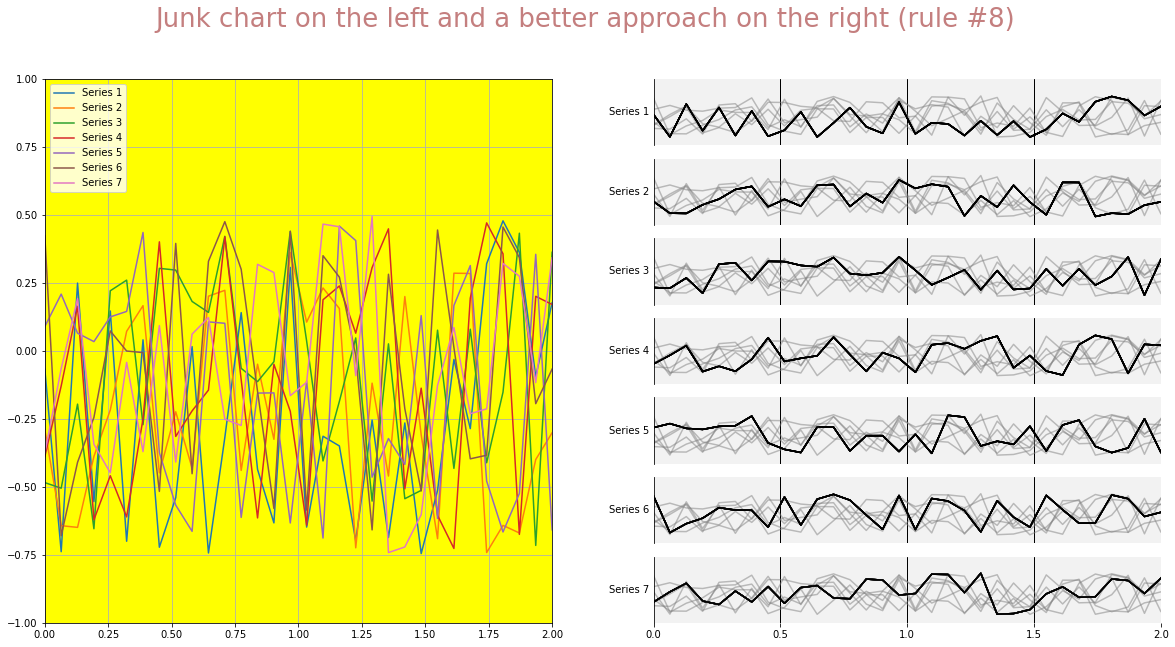

In [96]:
# In this code we will reproduce using our knowledge the following figure from N. Rougier GitHub.
# It has to deal with the rule number 8, about chart junks.
# https://github.com/rougier/ten-rules/blob/master/figure-7.py
    
# ----------------------------------------------------------------------------------------------------
# get the data
p, n = 7, 32
X = np.linspace(0,2,n)
Y = np.random.uniform(-.75,.5,(p,n))

# ----------------------------------------------------------------------------------------------------
# instanciate the figure

# plot the chart junk
fig = plt.figure(figsize = (20, 10))
gs = fig.add_gridspec(p, 2)
ax_main = fig.add_subplot(gs[:, :1])

# plot everything into the same plot
for i, y in enumerate(Y):
    ax_main.plot(X, y, label = "Series {}".format(i + 1))
    
# ----------------------------------------------------------------------------------------------------
# plot a better solution for this chart
# for every row we created in gridspec
for i in range(p):
    # add a new figure
    ax_ = fig.add_subplot(gs[i, 1])
    for y in Y:
        # plot all the series but with a grey color and a medium alpha
        # this way the bars are like in the background
        ax_.plot(X, y, color = "grey", alpha = .5)
        # plot a new line, of the current line with a back color to stand out
        ax_.plot(X, Y[i], color = "black")

        # eliminate all the y ticks
        ax_.set_yticks([])        
        
        # for all the plots except the last one, eliminame the xticks
        if i < 6:
            ax_.set_xticks([])
        
        # manipulate the spines to make the plots look nicer
        ax_.spines["top"].set_color("None")
        ax_.spines["bottom"].set_color("None")
        ax_.spines["right"].set_color("None")
        ax_.spines["left"].set_color("Black")
        
        # set a specific y label, with the series name
        ax_.set_ylabel("Series {}".format(i + 1), horizontalalignment = "right", verticalalignment = "center", fontsize = 10, rotation = "horizontal")
                
        # for every plot, add a grey background
        ax_.patch.set_facecolor('grey')
        ax_.patch.set_alpha(0.1)
        
        # change the x and y limits
        ax_.set_xlim(0, 2)
        ax_.set_ylim(-1, 1)
        
        # add 3 vertical lines to separate better the plot
        ax_.vlines(0.5, -1, 1, lw = 1, alpha = .5)
        ax_.vlines(1, -1, 1, lw = 1, alpha = .5)
        ax_.vlines(1.5, -1, 1, lw = 1, alpha = .5)
        
# get the xticks of the last axes
x_ticks = ax_.get_xticks()

# change them to plot every 2 entrance
ax_.set_xticks(x_ticks[::2])
ax_.set_xticklabels(x_ticks[::2])

# change the x tick font size
ax_.tick_params("x", labelsize = 10)
        
# manipulate the main axes (left plot)
# change the x and y tick font size
ax_main.tick_params("x", labelsize = 10)
ax_main.tick_params("y", labelsize = 10)

# change the x and y limits
ax_main.set_xlim(0, 2)
ax_main.set_ylim(-1, 1)

# add a grid and a yellow facecolor
ax_main.grid("--")
ax_main.set_facecolor("yellow")

# add a legend for the main axes
ax_main.legend(loc = "upper left", fontsize = 10)

# add a title for the all figure
fig.suptitle('Junk chart on the left and a better approach on the right (rule #8)', fontsize = 26, color = 'darkred', alpha = .5);

<a id = "Bonus6"></a>
# Bonus6: Chord diagram in Python
[Go back to the Table of Contents](#table_of_contents)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
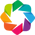

In [97]:
# The official documentation is very poor, so it's difficult to use Bokeh.
# However, you could achieve this plot following this documentation
# https://holoviews.org/reference/elements/bokeh/Chord.html

# Useful for:
# A chord diagram represents flows or connections between several entities. It's really useful when you want to see all possible interaction
# between independent entities (however, inner flows also can be displayed)

# More info: 
# https://www.data-to-viz.com/graph/chord.html

# imports
import holoviews as hv
from holoviews import opts, dim

hv.extension('bokeh')
hv.output(size = 100)

In [98]:
# let's create some fake data
# basically let's assume that A, B, C, D, E, F, G, H are some kind of entities: cities, economic sectores, countries, deparments whatever.
# As you can see, we have a source and a target, meaning start and end
source_list = [np.random.choice(["A", "B", "C", "D", "E", "F", "G", "H"]) for i in range(5000)]
target_list = [np.random.choice(["A", "B", "C", "D", "E", "X", "Y", "Z"]) for i in range(5000)]

# create a df from the data
df_links = pd.DataFrame([source_list, target_list], ["source", "target"]).T

# calculate the number of interactions between entities using pandas groupby
# for now let's assume 1 - 1 flows
df_links = df_links.groupby(["source", "target"]).apply(len)

# convert the groupby into a dataframe
df_links = df_links.to_frame().reset_index()

# rename the 0 column with value
df_links.rename(columns = {0:"value"}, inplace = True)

# this is our data
df_links.head()

source target  value
0      A      A     72
1      A      B     71
2      A      C     86
3      A      D     82
4      A      E     81

In [99]:
# # with this simple line you can already render a Chord diagram in Python
# hv.Chord(df_links)

In [100]:
# The previous diagram (commented) renders, but it would be very nice to add some color
# and maybe a name for each node
# the following lines will help you with that
# in ourde to do so, we must create an additional df, with the needed data

# create a list with all posible UNIQUE entities
df_nodes_ = pd.DataFrame([pd.unique(df_links[["source", "target"]].values.ravel())], ["source"]).T

# create a new name/label to display on each edge
df_nodes_["name"] = df_nodes_["source"].apply(lambda x: "Origin {}".format(x))

# set our unique entities as index of the dataframe
df_nodes_.set_index(df_nodes_["source"].values, inplace = True)

# drop unused columns
df_nodes_.drop("source", axis = 1, inplace = True)

# create a special dataset from Holoviews
df_nodes = hv.Dataset(pd.DataFrame(df_nodes_['name']), 'index')

In [101]:
##############################################################################
##############################################################################
# Take a look at our data. This shold be the form Holoviews expects us to pass.
# a first dataframe with source - target - value --> df_links
# we have created it at the beggining from scratch using 2 lists

# and a second dataframe with the label to plot on the Chord diagram
# it should have the unique entities as index --> df_nodes_
# DON'T FORGET TO PASS IT INTO df_nodes = hv.Dataset(pd.DataFrame(df_nodes_['name']), 'index')
##############################################################################
##############################################################################

In [102]:
df_links.head()

source target  value
0      A      A     72
1      A      B     71
2      A      C     86
3      A      D     82
4      A      E     81

In [103]:
df_nodes_.head()

name
A  Origin A
B  Origin B
C  Origin C
D  Origin D
E  Origin E

In [104]:
# this line
# df_nodes = hv.Dataset(pd.DataFrame(df_nodes_['name']), 'index')
# produces this dataset
df_nodes.data.head()

index      name
0     A  Origin A
1     B  Origin B
2     C  Origin C
3     D  Origin D
4     E  Origin E

In [105]:
# instanciate the plot
chord = hv.Chord((df_links, df_nodes)).select(value = (1, None))

# specify additional options for our chord diagram
chord.opts(
    opts.Chord(
            cmap = 'Category20',  # select color map
            edge_cmap = 'Category20', # select color map
            edge_color = dim('source').str(), # generate unique colors for edges
            labels = 'name', # use this column from the df_nodes df as the edge name
            node_color = dim('index').str() # generate unique colors for edges
    )
)

:Chord   [source,target]   (value)

<a id = "Bonus7"></a>
# Bonus7: Sankey plot in Python
[Go back to the Table of Contents](#table_of_contents)

In [106]:
# # Run this code to get a Sankey plot on your local machine
# # install the widget
# !pip install ipysankeywidget

# !jupyter nbextension enable --py --sys-prefix ipysankeywidget

# # imports
# from ipysankeywidget import SankeyWidget

# # in order to make a Sankey plot, we should pass a similar dataframe as in Chord Diagram
# # but first let's create the correspondig color

# # get the unique values
# unique_values = df_nodes_.index

# # create as many colors as unique values
# # +1 to avoid white color
# colors = [matplotlib.colors.rgb2hex(plt.cm.gist_earth(i/float(len(unique_values) + 1))) for i in range(len(unique_values) + 1)]

# # create a dict with values and color
# color_dict = {k:v for k,v in zip(unique_values, colors[1::])}
# color_dict

# # map the colors to the values
# df_links["color"] = df_links["source"].map(color_dict)

# # conver the df into a list of dictionaries row wise oriented
# links = df_links.to_dict(orient = "records")
# links[:10]

# # run this in your local machine and it will render the sankey plot
# s = SankeyWidget(value = {'links': links},
#              width = 800, 
#              height = 800,
#              margins = dict(top = 0, bottom = 0, left = 150, right = 120)
#             )

In [107]:
# Bokeh only supports acyclic Sankey plots
# This means that source and target columns must be different

# let's create some fake data
# basically let's assume that A, B, C, D, E, F, G, H are some kind of entities: cities, economic sectores, countries, deparments whatever.
# As you can see, we have a source and a target, meaning start and end
source_list = [np.random.choice(["A", "B", "C", "D"]) for i in range(5000)]
target_list = [np.random.choice(["E", "F", "G", "H"]) for i in range(5000)]

# create a df from the data
df_links = pd.DataFrame([source_list, target_list], ["source", "target"]).T

# calculate the number of interactions between entities using pandas groupby
# for now let's assume 1 - 1 flows
df_links = df_links.groupby(["source", "target"]).apply(len)

# convert the groupby into a dataframe
df_links = df_links.to_frame().reset_index()

# rename the 0 column with value
df_links.rename(columns = {0:"value"}, inplace = True)

# this is our data
df_links.head()

sankey = hv.Sankey(df_links.values.tolist())
sankey.opts(width = 600, height = 400)

:Sankey   [start,end]   (Value)

<a id = "Reference_link"></a>
# Reference
[Go back to the Table of Contents](#table_of_contents)


## This kernel would have been imposible to make without this amazing tutorials:

Most basic matplotlib: https://towardsdatascience.com/plt-xxx-or-ax-xxx-that-is-the-question-in-matplotlib-8580acf42f44

Understand the difference between all the methods (add_subplot, add_subplots, add_axes ...): https://towardsdatascience.com/the-many-ways-to-call-axes-in-matplotlib-2667a7b06e06

Matplotlib grid documentation: https://matplotlib.org/tutorials/intermediate/gridspec.html

Great tutorial fore beginners: https://github.com/rougier/matplotlib-tutorial

10 simple rules for better plots: https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833#pcbi.1003833-Fung1

Code for 10 simple rules for better plots: https://github.com/rougier/ten-rules

50 beautiful plots using matplotlib: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Pandas plotting capabilities: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

More in details choropleths: https://www.kaggle.com/python10pm/covid-19-in-spain-by-regions-daily-update#-Please-Upvote-if-you-liked-it.

More examples using Folium: https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

Sankey with Python: https://psychemedia.github.io/parlihacks/MigrantFlow.html

Sankey with Bokeh: https://holoviews.org/reference/elements/bokeh/Sankey.html

Chord Diagrams with Python: https://holoviews.org/reference/elements/bokeh/Chord.html


# That's all, thank you very much!
# I hope you learned a lot of matplotlib and plotting.